# Machine Learning Project: Assessment 2

Student ID: 201910227

## 1.1 Aims and Objectives

The aim of the case study is to develop and evaluate two machine learning models that can classify affective states : baseline, stress, and amusement using multimodal physiological data from wearable sensors taken from the publicly available WESAD dataset. The case study will focus on using both Support Vector Machine (SVM) and a Neural Network (FNN) and comparing their predictive performance on features extracted from a pre-processed dataset.

This will be achieved by completing the following objectives:

1) Pre-process the sensor datasets including noise reduction, filtering, resampling, and synchronisation across sensors before combining features for model development.

2) Perform windows segmentation and feature extractions in both the time and frequency domains to capture key physiological changes associated with emotional states.

3) Evaluate the merged dataset, including standardisation, class imbalance approaches such as SMOTE, class weighting.

4) Create a pipeline for training, testing and evaluate machine learning models

5) Train and evaluate two classification models using a Leave-One-Subject-Out (LOSO) cross-validation

6) Hyperparameter tuning of both SVM and FNN classifiers

7) Compare model performance using metrics such as accuracy, F1-score,macro-averaged ROC–AUC and Precision-Recall curves, and analyse the impact of feature fusion and preprocessing on classification outcomes.

## 1.2 Project Plan

The project will progress in structured stages, starting with subject-wise pre-processing, synchronisation, and segmentation of  WESAD physiological data, followed by feature extraction and dataset merging whilst addressing for class imbalance. Seperately, machine learning pipelines for SVM and FNN models will be developed using LOSO cross-validation. Following initial model development and selection, hyperparameter tuning will be performed to finalise the best perfomring model. The final models will evaluated using accuracy, F1-score, ROC–AUC and Precision-Recall Curves.

Key risks during the development of the models relate to the quality of the data, in particular sensor noise, misalignment, and class imbalance. This will be mitigated through filtering of the raw sensor data, feature fusio and extraction, and balancing strategies including SMOTE and class weighting.

The final stage focuses on model comparison, analysis, and recommendations.

The overall strategy taken is outlined and shown in the diagram below:

![alt text](ml2.drawio.png "Diagram of Strategy")


## 2.  Case study analysis

For the particular task of classifying the emotional state of person, there will be many challenges to overcome, given the *WESAD* dataset used for this case study. The data were collected using different sensors, including ECG, EDA, EMG, TEMP, ACC, RESP, each of which produces signals with varying levels of noise and sampling frequencies These are outlined below:

### 2.1 Limited Dataset Participant Numbers and Class Imabalance

The WESAD dataset is a publicly available collection of raw physiological time series data obtained from a small number of participants across a diverse range of sensor information obtained from chest and wrist sensors. However, due to the size and design of the study, the dataset is limited and imbalanced, with fewer samples for some emotional states such as amusement compared to baseline or stress. The use of class-weighting methods and SMOTE technique will be considered to overcome the class imbalance.

Since the number of participants is limited and physiological responses vary between individuals, the Leave-One-Subject-Out cross-validation method will be used instead of K-Fold validation. This approach helps to prevent data leakage and gives a fairer assessment of how well the models generalise to new subjects not seen by the models.

### 2.2  Different Sensors Performance (Resolution and Noise)

For the preparation of the data for analysis, several preprocessing and feature engineering steps will need to be considered. Noise filtering techniques will need to be applied clean the raw signals. The signals require resampling so that all sensors operated at a consistent sampling rate at a suitable resolution to not lose features within the data. Overall, this approach ensured that the raw signals were cleaned, standardised and converted into meaningful features suitable for machine learning.

### 2.3 Time-series data and Different Sampling Rates and Overall Size of the Dataset

Handling raw time-series data cannot be directly used by most ML techniques. The data will be segmented into overlapping windows, each labelled according to the corresponding emotional state will require careful selection and synchronisation to ensure consistency between sensors. Due to the size of the processed dataset, the selection of machine learning techniques was restricted to models that perform well with higher dimensional data. Support Vector Machines and Feedforward Neural Networks were chosen because they are capable of learning complex relationships between features. Other methods, such as Gaussian Mixture Models or Gaussian Processes, are not considered suitable because they work better with smaller datasets containing fewer features.

### 2.4 Feature extraction between Sensors

The raw data itself provides limited information that can be learnt directly from ML models. Feature extraction methods, is necessary to be used across all the sensor data. These are unique and require individual feature extraction approaches suitable to the sensor type to derive important physiological indicators. For example identifying the  heart rate from the ECG data, which can be performed in the frequency domain to obtain statistical and spectral features. These features help the models to capture complex, non-linear patterns in the physiological responses. Literature will be reviewed to find how the raw data can extra meaningful features, such as peak detection, cross-overs detection, periodicity and transformation into the frequency domain.

## 3. Dataset Description and Preprocessing

### 3.1 Summary of Dataset

The *WESAD* (Wearable Stress and Affect Detection) is a publicly available multi-modal dataset prepared by Schmidt et al. for determining the emotional state of participants using wearable sensors [1]. Their dataset focuses on recording four emotional states : neutral (baseline), stress,  amusement and 'meditation' in healthy adult participants. Data were collected from 15 subjects wearing a RespiBAN chest sensor and an Empatica E4 wrist device. The sensors captured multimodal physiological signals including ECG, EDA, EMG, respiration, temperature, and acceleration obtained from accelorometers, were sampled at 64–700 Hz depending on the sensor type.

The experimental protocol consisted of a 20-minute baseline (neutral reading task), a stress condition using the Trier Social Stress Test (public speaking and mental arithmetic), and an amusement condition involving eleven short 'funny' video clips. A guided breathing meditation followed the stress and amusement tasks to restore a calm state. In addition to physiological recordings, participants completed self-assessment questionnaires such as the Positive and Negative Affect Schedule (PANAS) after each condition.

The following data signals were recorded and provided for this publicly avaialble dataset [1]. Depending on each participant, the raw unfiltered signal obtained for each sensor is approximately 4 million data points alone.

In this project data for each subject was captured from both chest and wrist sensors, with the following labels and description

- **ACC**: Accelerometer , it measures movement and orientation.
- **ECG**: Electrocardiogram, it measures the electrical activity of the heart.
- **EMG**: Electromyogram, it measures muscle activity.
- **EDA**: Electrodermal Activity, it measures skin conductance related to sweat gland activity.
- **Resp**: Respiration, it measures breathing patterns.
- **Temp**: Temperature, it measures skin temperature.
- **BVP**: Blood Volume Pulse, it measures blood flow and heart rate. (excluded as this was a wrist sensor)

The dataset from the wrist sensors was excluded to reduce the size of the dataset, by selecting the appropriate key. All the chest data signals are signals sampled at 700 Hz. Aswell as the signal data, the corresponding label for the emotional stage is provided:

- **0** = not defined / transient,
- **1** = baseline,
- **2** = stress,
- **3** = amusement,
- **4** = meditation (later excluded from the case-study analysis),
- **5/6/7** = should be ignored dataset

For this project, a multi-class classification of the emotional categories of baseline (1), stress (2), and amusement (3) was done. Other labelled data was discarded from the analysis.

Due the complexity of the overall pre-propcessing stages outlined, these dataset was manually pre-processed per subject and stored as seperate *.csv* files and combined for analysis using the two ML models.

Having filtered the signals, and re-sampled, these were transformed into synchronised overalaping windows to deal with the time-series data. Over 120k windows were created across all the combined subjects. Feature extraction was performed on these windows, to obtain useful statistical information. By performing various transformations (e.g. transoforming to the frequency domain) and applying statistics, 192 features were extracted for use within the ML model.

### 3.2 Analysis of Dataset
The dataset was loaded and some checks are performed on the raw data.

In [ ]:
import pickle
import numpy as np
import pandas as pd

import scipy
import scipy.signal
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

subject_name = 'S2'

with open(f"data/WESAD/{subject_name}/{subject_name}.pkl", "rb") as f:
    data = pickle.load(f, encoding="latin1")

# Print the structure of the dataset
print(data.keys())
print(data['signal'].keys())
print(data['signal']['chest'].keys())
print(data['signal']['wrist'].keys())


For subject 2, the following distribution of class labels are shown

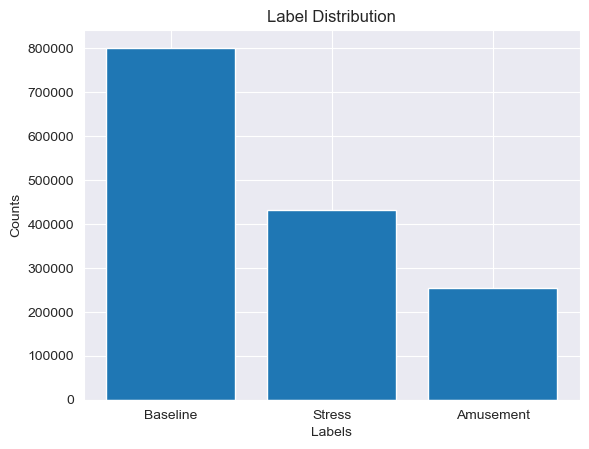

In [9]:
labels = data['label']

#print unique labels and their counts
unique, counts = np.unique(labels, return_counts=True)
label_counts = dict(zip(unique, counts))

label_names = {1: 'Baseline', 2: 'Stress', 3: 'Amusement'}
selected_labels = [1, 2, 3]

#Plot the label distribution
selected_label_counts = {k: v for k, v in label_counts.items() if k in selected_labels}
plt.bar(selected_label_counts.keys(), selected_label_counts.values())
plt.xticks(list(selected_label_counts.keys()), [label_names[k] for k in selected_label_counts.keys()])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Distribution')
plt.show()

In [10]:
chest_signals = ['ACC', 'ECG', 'EMG', 'EDA', 'Resp', 'Temp']
missing_report = {}
for signal in chest_signals:
    arr = data['signal']['chest'][signal]
    if isinstance(arr, np.ndarray):
        missing_count = np.isnan(arr).sum()
        missing_report[signal] = missing_count
    else:
        missing_report[signal] = 'Not an ndarray'
print('Missing values in chest signals:')
for k, v in missing_report.items():
    print(f'{k}: {v}')

Missing values in chest signals:
ACC: 0
ECG: 0
EMG: 0
EDA: 0
Resp: 0
Temp: 0


In [11]:
#checking corrupted values in chest signals
corrupted_report = {}
for signal in chest_signals:
    arr = data['signal']['chest'][signal]
    corrupted_count = np.isinf(arr).sum() + np.isnan(arr).sum()
    corrupted_report[signal] = corrupted_count

print('Corrupted values in chest signals:')
for k, v in corrupted_report.items():
    print(f'{k}: {v}')

Corrupted values in chest signals:
ACC: 0
ECG: 0
EMG: 0
EDA: 0
Resp: 0
Temp: 0


The length of signals and their synchronisation with the dataset labels was checked

In [12]:
for sensor in data['signal']['chest']:
    print(sensor, len(data['signal']['chest'][sensor]))

print("Labels:", len(data['label']))

ACC 4255300
ECG 4255300
EMG 4255300
EDA 4255300
Temp 4255300
Resp 4255300
Labels: 4255300


The label length with sensor data length is updated to be consistent

In [13]:
min_length = min(len(data['label']), min(len(data['signal']['chest'][sensor]) for sensor in chest_signals))
labels = data['label'][:min_length]
for sensor in chest_signals:
    data['signal']['chest'][sensor] = data['signal']['chest'][sensor][:min_length]

print("Aligned lengths:", len(labels), {sensor: len(data['signal']['chest'][
sensor]) for sensor in chest_signals})

Aligned lengths: 4255300 {'ACC': 4255300, 'ECG': 4255300, 'EMG': 4255300, 'EDA': 4255300, 'Resp': 4255300, 'Temp': 4255300}


**Detect noise or broken sensors:**

A simple thresholding method to detect noise or broken sensors. For example, if the standard deviation of a signal is very low, it may indicate a broken sensor.

In [15]:
print('Standard deviation of chest signals:')
noise_report = {}
for signal in chest_signals:
    arr = data['signal']['chest'][signal]
    std_dev = np.std(arr)
    noise_report[signal] = std_dev
    print(f'{signal} : {std_dev:.4f}')


Standard deviation of chest signals:
ACC : 0.5405
ECG : 0.1541
EMG : 0.0117
EDA : 1.2384
Resp : 2.9177
Temp : 1.2811


### 3.3 Filtering and Visualisation of Processed Signals

Filtering was needed to remove noise and artifacts from physiological signals, enhancing the signal quality for accurate feature extraction and analysis. Based on guidance in literature, different signals require specific filtering techniques based on their frequency characteristics and the types of noise present due to each sensor limitation [2].

For example plotting the EMG signal, it shows the presence of low level background noise. Clearly, there is no visible strong rhythmic activity or bursts that would typically appear when a muscle contract, resembling that of EMG activity. In the literature, it is recommend to use signal processing to improve the quality of the dataset for analysis [2].

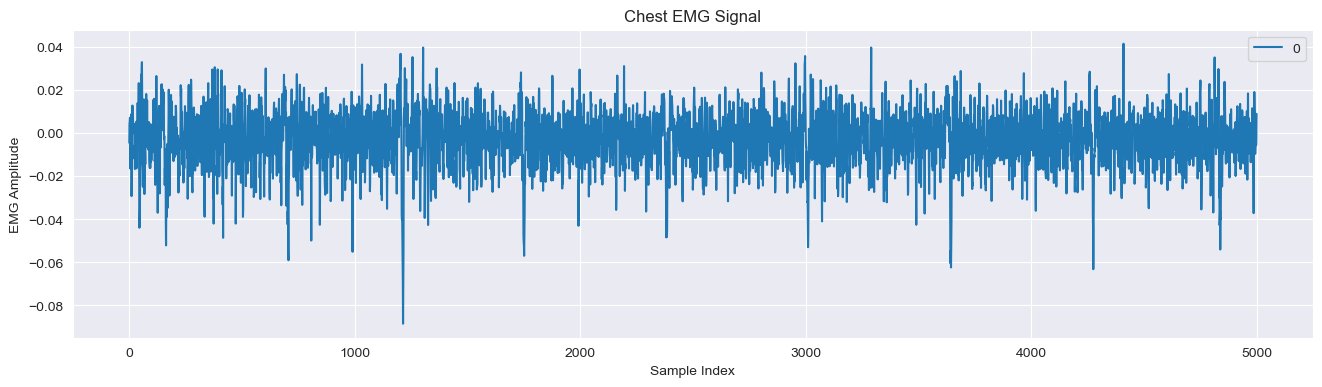

In [18]:
emg_signal = data['signal']['chest']['EMG']
plt.figure(figsize=(16, 4))
ax = sns.lineplot(emg_signal[:5000])
ax.set(xlabel='Sample Index', ylabel='EMG Amplitude', title='Chest EMG Signal')
plt.show()

On the dataset, I applied the following filtering methods:

1. **Lowpass filter** (cutoff = 10 Hz) for chest accelerometer (**ACC**) to remove high frequency noise while preserving physiological movement.
2. **Bandpass filter** applied to ECG (0.5–40 Hz) to remove baseline wander and high frequency noise. These are common ECG preprocessing approach in biomedical signal processing [2]
3. **Bandpass filte** (20–250 Hz) for chest electromyogram (**EMG**) to isolate muscle activity and eliminate motion artifacts and sensor noise.
4. **Lowpass filter** (cutoff = 5 Hz) for chest electrodermal activity (**EDA**) to remove high frequency noise while preserving skin conductance responses.
5. **Bandpass filter**(0.1–0.35 Hz) for chest respiration (**RESP**) to capture breathing patterns while removing high frequency noise and low frequency drift.
6. **Lowpass filter** (cutoff = 0.1 Hz) for chest temperature (**TEMP**) to smooth out rapid fluctuations and capture slow changes in skin temperature.


**Signal Filtering of ACC Signal**

The accelerometer signal was filtered using a lowpass filter:

In [19]:
acc = data['signal']['chest']['ACC']
fs = 700  # Sampling frequency (Hz)
cutoff = 10  # Cutoff frequency (Hz)

def lowpass_filter(signal, fs, cutoff):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = scipy.signal.butter(2, normal_cutoff, btype='low')
    return scipy.signal.filtfilt(b, a, signal)

# Apply low-pass filter to each accellerometer axis (x, y, z)
acc_filtered = np.zeros_like(acc)
for i in range(acc.shape[1]):
    acc_filtered[:, i] = lowpass_filter(acc[:, i], fs, cutoff)

print('ACC filtered shape:', acc_filtered.shape)

ACC filtered shape: (4255300, 3)


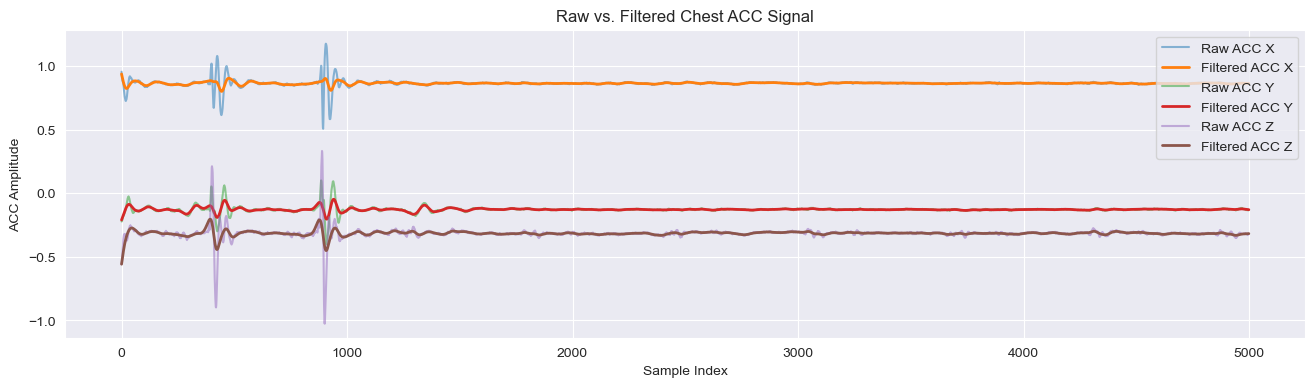

In [20]:
# Visualise raw vs. filtered ACC signal (first 5000 samples)
plt.figure(figsize=(16, 4))
plt.plot(acc[:5000, 0], label='Raw ACC X', alpha=0.5)
plt.plot(acc_filtered[:5000, 0], label='Filtered ACC X', linewidth=2)
plt.plot(acc[:5000, 1], label='Raw ACC Y', alpha=0.5)
plt.plot(acc_filtered[:5000, 1], label='Filtered ACC Y', linewidth=2)
plt.plot(acc[:5000, 2], label='Raw ACC Z', alpha=0.5)
plt.plot(acc_filtered[:5000, 2], label='Filtered ACC Z', linewidth=2)
plt.gca().set(xlabel='Sample Index', ylabel='ACC Amplitude', title='Raw vs. Filtered Chest ACC Signal')
plt.legend()
plt.show()

Above we can see that the filtered ACC signal is much smoother than the raw signal. The lowpass filter effectively removed high frequency noise while preserving the overall movement patterns. This makes the filtered ACC signal more suitable for feature extraction.

**Apply Bandpass filter to ECG signal**

Common ECG preprocessing approach in biomedical signal processing is to use a bandpass filter applied to ECG (0.5–40 Hz) to remove baseline wander and high-frequency noise [2]. The nyquist frequency represents the minimum frequency that can be resolved based on the sampling frequency.


In [21]:
def bandpass_filter_ecg(signal, lowcut=0.5, highcut=40, fs=700, order=2):
    """ ECG bandpass filter  """

    signal = np.asarray(signal).flatten().astype(float)
    if np.isnan(signal).any() or np.isinf(signal).any():
        print("Warning: ECG signal contains NaNs or infs. Converted to zeros")
        signal = np.nan_to_num(signal)

    nyquist = 0.5 * fs
    low = max(lowcut / nyquist, 0.001)
    high = min(highcut / nyquist, 0.99)
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    padlen = 3 * max(len(a), len(b))
    if len(signal) <= padlen:
        print(f"ECG signal too short for filtering (length={len(signal)}, padlen={padlen}). Returning NaNs.")
        return np.full_like(signal, np.nan)
    filtered = scipy.signal.filtfilt(b, a, signal)

    # Clip extreme values
    filtered = np.clip(filtered, -5, 5)
    return filtered

# ECG signal from chest
ecg = data['signal']['chest']['ECG']
ecg_filtered = bandpass_filter_ecg(ecg, 0.5, 40, 700)

# Print amplitude ranges for comparison
print('Raw ECG amplitude range:', np.min(ecg), 'to', np.max(ecg))
print('Filtered ECG amplitude range:', np.min(ecg_filtered), 'to', np.max(ecg_filtered))

Raw ECG amplitude range: -1.499542236328125 to 1.4993133544921875
Filtered ECG amplitude range: -1.590014840139592 to 1.721900283752242


After filtering, the main heart beats (QRS peaks) became clearer, and the overall signal looked smoother. The filtered signal kept the important heart activity information, while removing slow fluctuations and sensor noise. The amplitude slightly changed from –1.50 to 1.50 mV (raw) to –1.59 to 1.72 mV (filtered), showing that filtering improved signal quality without losing useful data.

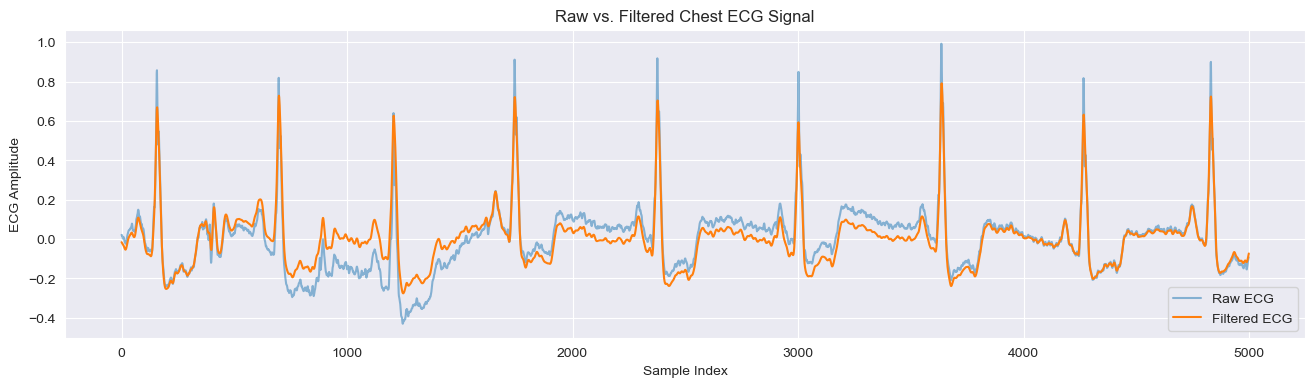

In [22]:
plt.figure(figsize=(16, 4))
plt.plot(ecg[:5000], label='Raw ECG', alpha=0.5)
plt.plot(ecg_filtered[:5000], label='Filtered ECG', linewidth=1.5)
plt.gca().set(xlabel='Sample Index', ylabel='ECG Amplitude', title='Raw vs. Filtered Chest ECG Signal')
plt.legend()
plt.show()


**Apply bandpass filter to EMG signal**

Removes low frequency motion artifacts and high frequency sensor noise (20–250 Hz). This ensures cutoff frequencies are valid for the given sampling rate.

In [23]:
def bandpass_filter_emg(signal, lowcut=20, highcut=250, fs=700, order=4):
    """Bandpass filter for surface EMG"""

    nyq = 0.5 * fs
    if not (0 < lowcut < highcut < nyq):
        print(f"Invalid cutoff frequencies: lowcut={lowcut}, highcut={highcut}, Nyquist={nyq}")
        return np.full_like(signal, np.nan)
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    padlen = 3 * max(len(a), len(b))
    if len(signal) <= padlen:
        return np.full_like(signal, np.nan)
    return scipy.signal.filtfilt(b, a, signal)

emg_signal = data['signal']['chest']['EMG']

emg_signal = np.asarray(emg_signal).flatten().astype(float)
if np.isnan(emg_signal).any():
    print("Warning: EMG signal contains NaNs. These will be filtered as zeros.")
    emg_signal = np.nan_to_num(emg_signal)

emg_filtered = bandpass_filter_emg(emg_signal, 20, 250, 700)

# Print amplitude ranges for comparison
print('Raw EMG amplitude range:', np.min(emg_signal), 'to', np.max(emg_signal))
print('Filtered EMG amplitude range:', np.min(emg_filtered), 'to', np.max(emg_filtered))

Raw EMG amplitude range: -0.4149627685546875 to 0.3009796142578125
Filtered EMG amplitude range: -0.3429930282313185 to 0.2507582481453996


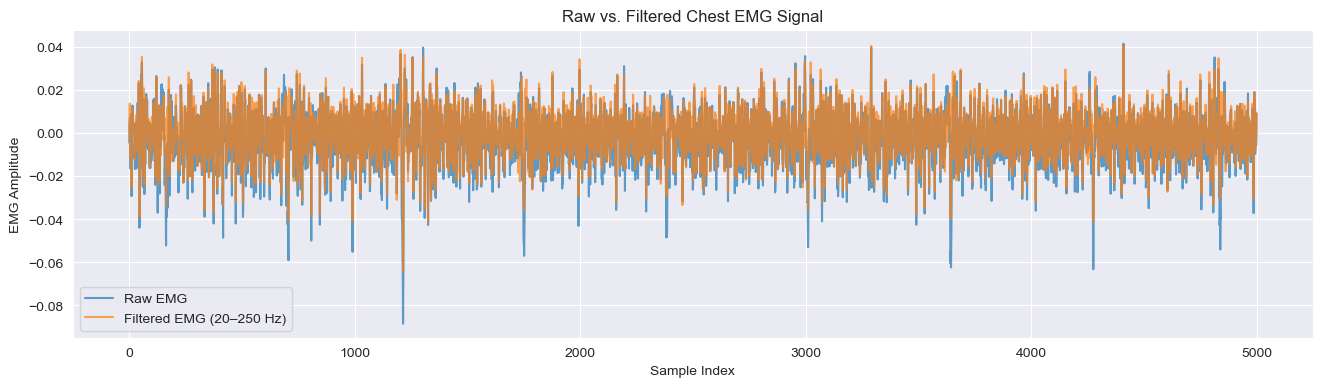

In [24]:
plt.figure(figsize=(16, 4))
plt.plot(emg_signal[:5000], label='Raw EMG', alpha=0.7)
plt.plot(emg_filtered[:5000], label='Filtered EMG (20–250 Hz)', alpha=0.7)
plt.gca().set(xlabel='Sample Index', ylabel='EMG Amplitude', title='Raw vs. Filtered Chest EMG Signal')
plt.legend()
plt.show()

The filtered EMG amplitude range is slightly narrower than the raw EMG range. This means the bandpass filter removed some noise and extreme values, but the overall signal amplitude did not change drastically. The physiological EMG activity is is cleaner for feature extraction. This is expected and indicates successful noise reduction without losing meaningful muscle activity [3].

**EDA Filtering**

 A low pass filter (5 Hz) was used to remove high frequency noise as reported by Schmidt et al. [1].

In [25]:
eda = data['signal']['chest']['EDA']
fs_eda = 700  # EDA sampling rate (Hz)
cutoff_eda = 5  # Lowpass cutoff frequency (Hz)

b, a = scipy.signal.butter(2, cutoff_eda / (fs_eda / 2), btype='low')
eda_filtered = scipy.signal.filtfilt(b, a, eda.ravel())

print('Raw EDA amplitude range:', np.min(eda), 'to', np.max(eda))
print('Filtered EDA amplitude range:', np.min(eda_filtered), 'to', np.max(eda_filtered))

Raw EDA amplitude range: 0.263214111328125 to 7.576751708984375
Filtered EDA amplitude range: 0.3649433791539122 to 7.484119989527539


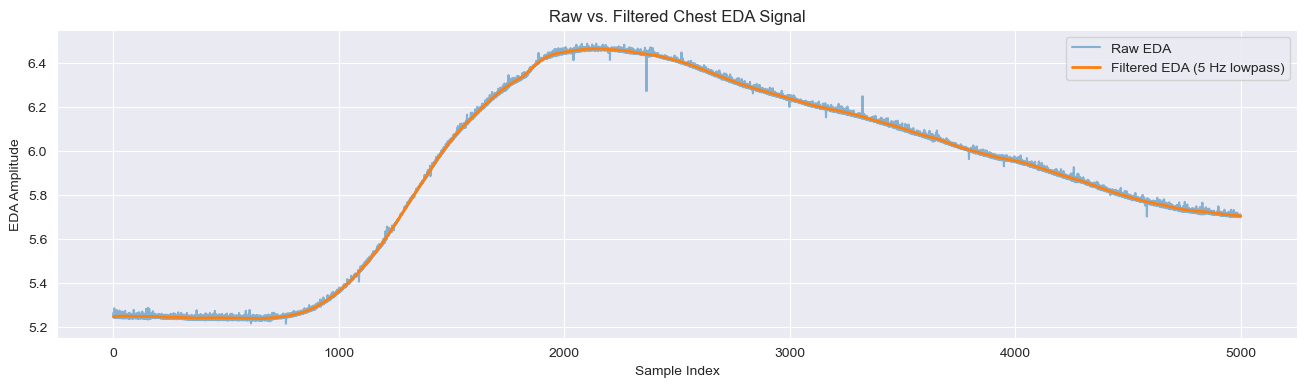

In [26]:
plt.figure(figsize=(16, 4))
plt.plot(eda[:5000], label='Raw EDA', alpha=0.5)
plt.plot(eda_filtered[:5000], label='Filtered EDA (5 Hz lowpass)', linewidth=2)
plt.gca().set(xlabel='Sample Index', ylabel='EDA Amplitude', title='Raw vs. Filtered Chest EDA Signal')
plt.legend()
plt.show()

On the above plot the filtered EDA signal is much smoother than the raw signal. The low pass filter effectively removed high frequency noise while preserving the overall EDA patterns more suitable for feature extraction later.

**RESP Signal Filtering**

A bandpass filter was applied (0.1-0.35) to RESP data to reflect the typical low frequency breathing rate (0.1-1.0 Hz) of average individuals, typical of (6-60 breaths per minute) under various situations [4].


In [27]:
from scipy.signal import butter, lfilter

def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

def bandpass_filter_resp(signal, lowcut=0.1, highcut=0.35, fs=700, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    # Normalise signal
    mean = np.mean(signal)
    std = np.std(signal)

    if std == 0 or np.isnan(std):
        print("RESP signal std is zero or NaN.")
        return np.full_like(signal, np.nan)
    signal_norm = (signal - mean) / std

    b, a = scipy.signal.butter(order, [low, high],btype='band')
    padlen = 3 * max(len(a), len(b))
    if len(signal_norm) <= padlen:
        print("Signal too short for filtering.")
        return np.full_like(signal, np.nan)

    filtered_norm = scipy.signal.filtfilt(b, a, signal_norm)
    filtered = filtered_norm * std + mean

    return filtered

fs_resp = 700
resp_signal = np.asarray(data['signal']['chest']['Resp']).flatten().astype(float)
if np.isnan(resp_signal).any():
    resp_signal = np.nan_to_num(resp_signal)

resp_filtered = bandpass_filter_resp(resp_signal, 0.1, 1.0, fs_resp)

print("Filtered RESP stats:")
print(f" min={np.nanmin(resp_filtered):.3f}, max={np.nanmax(resp_filtered):.2f}, NaN count={np.isnan(resp_filtered).sum():d}")

Filtered RESP stats:
 min=-22.762, max=24.95, NaN count=0


The raw and filtered RESP signal is shown below:

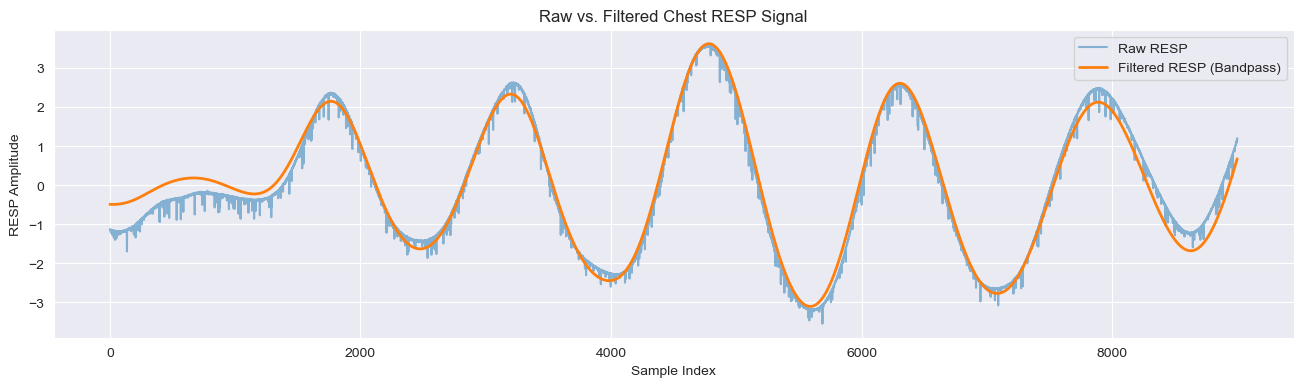

In [28]:
plt.figure(figsize=(16, 4))
plt.plot(resp_signal[:9000], label='Raw RESP', alpha=0.5)
plt.plot(resp_filtered[:9000], label='Filtered RESP (Bandpass)', linewidth=2)
plt.gca().set(xlabel='Sample Index', ylabel='RESP Amplitude', title='Raw vs. Filtered Chest RESP Signal')
plt.legend()
plt.show()

The filtered RESP signal has a much clearer breathing pattern compared to the raw signal. This makes the filtered RESP signal more suitable for later feature extraction.

**Temperature Filtering**

Filtering is performed based on the suggestion in Poh et al. [5]. The authors describe using 0.5 Hz low-pass filtering for slow-changing physiological signals for monitoring body temperature.

In [29]:
def filter_temp_signal(signal, fs=700, cutoff=0.5):
    """ Applies a low-pass filter to the temperature signal."""

    # Normalise the cutoff frequency
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist

    # Create a low-pass  filter
    b, a = scipy.signal.butter(2, normal_cutoff, btype='low')
    temp_filtered = scipy.signal.filtfilt(b, a, signal)

    return temp_filtered

# Get temperature signal
temp_signal = data['signal']['chest']['Temp'].flatten()

# Apply the filter for the temperature signal
temp_filtered = filter_temp_signal(temp_signal)

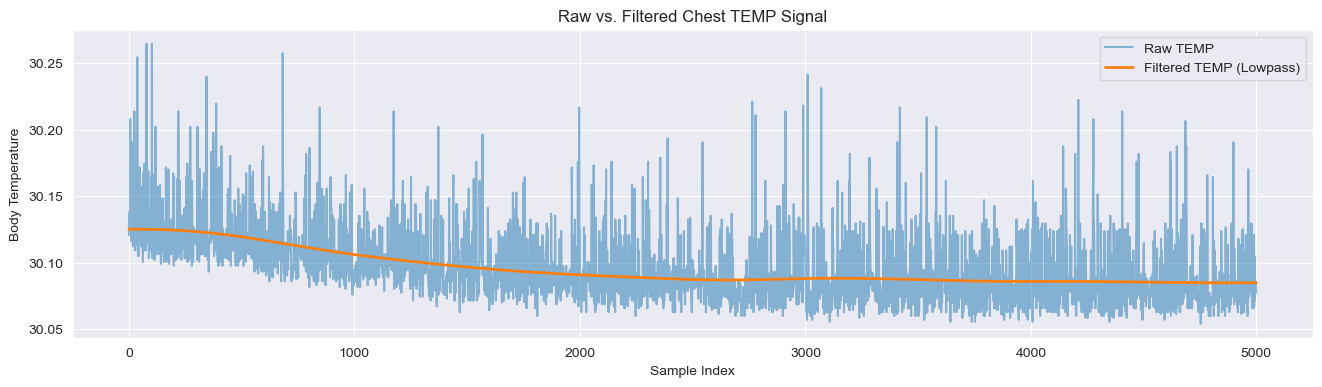

In [30]:
plt.figure(figsize=(16, 4))
plt.plot(temp_signal[:5000], label='Raw TEMP', alpha=0.5)
plt.plot(temp_filtered[:5000], label='Filtered TEMP (Lowpass)', linewidth=2)
plt.gca().set(xlabel='Sample Index', ylabel='Body Temperature', title='Raw vs. Filtered Chest TEMP Signal')
plt.legend()
plt.show()

This lowpass filter with a cutoff of 0.5 Hz is appropriate for temperature data because body temperature changes very slowly, with durations ranging to minutes to hours. The raw TEMP signal has high frequency noise, while the filtered temperature signal is smooth and captures the slow variations in body temperature improving feature extraction.

### 3.3 Resampling to a Consistent Sampling Rate

The datasets from each sensor was resampled so that the sampling rate was consistent. Initially this was attempted to reduce the sampling rate to 64 Hz, however, it was shown the accuracy of the resampling was poor for the ECG data. Instead, a resampling frequency of 256 Hz was used to capture the higher frequency signal data. These were then recombined in the following section using window to capture features with respect to time.

In [31]:
import scipy.signal as signal
# Target sampling rate
target_fs = 64  # Hz

# Original sampling rate
original_fs = 700  # Hz

# Calculate the resampling factor
resampling_factor = target_fs / original_fs

# Resample filtered signals to 64 Hz

# Resample ACC (all 3 axes)
acc_resampled = np.zeros((int(len(acc_filtered) * resampling_factor), 3))
for i in range(3):
    acc_resampled[:, i] = signal.resample(acc_filtered[:, i], int(len(acc_filtered[:, i]) * resampling_factor))
print(f"ACC: Original shape {acc_filtered.shape} → Resampled shape {acc_resampled.shape}")

ecg_resampled = signal.resample(ecg_filtered, int(len(ecg_filtered) * resampling_factor))
emg_resampled = signal.resample(emg_filtered, int(len(emg_filtered) * resampling_factor))
eda_resampled = signal.resample(eda_filtered, int(len(eda_filtered) * resampling_factor))
resp_resampled = signal.resample(resp_filtered, int(len(resp_filtered) * resampling_factor))
temp_resampled = signal.resample(temp_filtered, int(len(temp_filtered) * resampling_factor))

# Resample labels (using nearest neighbor interpolation to maintain integer values)
from scipy.interpolate import interp1d
original_indices = np.arange(len(labels))
new_indices = np.linspace(0, len(labels)-1, int(len(labels) * resampling_factor))
label_interpolator = interp1d(original_indices, labels, kind='nearest')
labels_resampled = label_interpolator(new_indices).astype(int)
print(f"Labels: Original length {len(labels)} → Resampled length {len(labels_resampled)}")


ACC: Original shape (4255300, 3) → Resampled shape (389056, 3)
Labels: Original length 4255300 → Resampled length 389056


Since the RespiBAN chest sensors record at 700 Hz, signals were downsampled to 64 Hz to reduce computational cost and match the wrist sensor sampling rates (4 to 64 HZ). Previous studies by Schmidt et al., and Gjoreski et al., have shown that such resampling preserves relevant physiological information when used for stress detection [1, 6].


In [32]:
def plot_resampling_comparison(signal_dict, original_fs, target_fs,
                             time_duration=None, samples_original=None,
                             figsize=(16, 20), suptitle='Original vs Resampled Signals'):

    n_signals = len(signal_dict)
    fig, axes = plt.subplots(n_signals, 2, figsize=figsize)

    # Handle single signal case
    if n_signals == 1:
        axes = axes.reshape(1, -1)

    for i, (signal_name, (original_signal, resampled_signal)) in enumerate(signal_dict.items()):

        # Determine time duration and corresponding samples
        if time_duration is not None:
            # Use specified time duration
            n_orig = int(time_duration * original_fs)
            n_resamp = int(time_duration * target_fs)
        elif samples_original is not None:
            # Calculate time duration from original samples
            n_orig = min(samples_original, len(original_signal))
            time_duration_calc = n_orig / original_fs
            n_resamp = int(time_duration_calc * target_fs)
        else:
            # Use all available samples, match time duration to shorter signal
            max_time_orig = len(original_signal) / original_fs
            max_time_resamp = len(resampled_signal) / target_fs
            time_duration_calc = min(max_time_orig, max_time_resamp)
            n_orig = int(time_duration_calc * original_fs)
            n_resamp = int(time_duration_calc * target_fs)

        # Ensure we don't exceed available samples
        n_orig = min(n_orig, len(original_signal))
        n_resamp = min(n_resamp, len(resampled_signal))

        # Create time vectors with same duration
        time_orig = np.arange(n_orig) / original_fs
        time_resamp = np.arange(n_resamp) / target_fs

        # Plot original signal
        axes[i, 0].plot(time_orig, original_signal[:n_orig])
        axes[i, 0].set_title(f'{signal_name} Original ({original_fs} Hz)')
        axes[i, 0].set_xlabel('Time (s)')
        axes[i, 0].set_ylabel('Amplitude')
        axes[i, 0].grid(True, alpha=0.3)

        # Plot resampled signal with same time duration
        axes[i, 1].plot(time_resamp, resampled_signal[:n_resamp])
        axes[i, 1].set_title(f'{signal_name} Resampled ({target_fs} Hz)')
        axes[i, 1].set_xlabel('Time (s)')
        axes[i, 1].set_ylabel('Amplitude')
        axes[i, 1].grid(True, alpha=0.3)

        # Ensure both subplots have the same time axis limits
        max_time = max(time_orig[-1], time_resamp[-1]) if len(time_orig) > 0 and len(time_resamp) > 0 else 1
        axes[i, 0].set_xlim(0, max_time)
        axes[i, 1].set_xlim(0, max_time)

    plt.suptitle(suptitle, fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

The plots the original raw and resampled signals from the sensor are compared below:

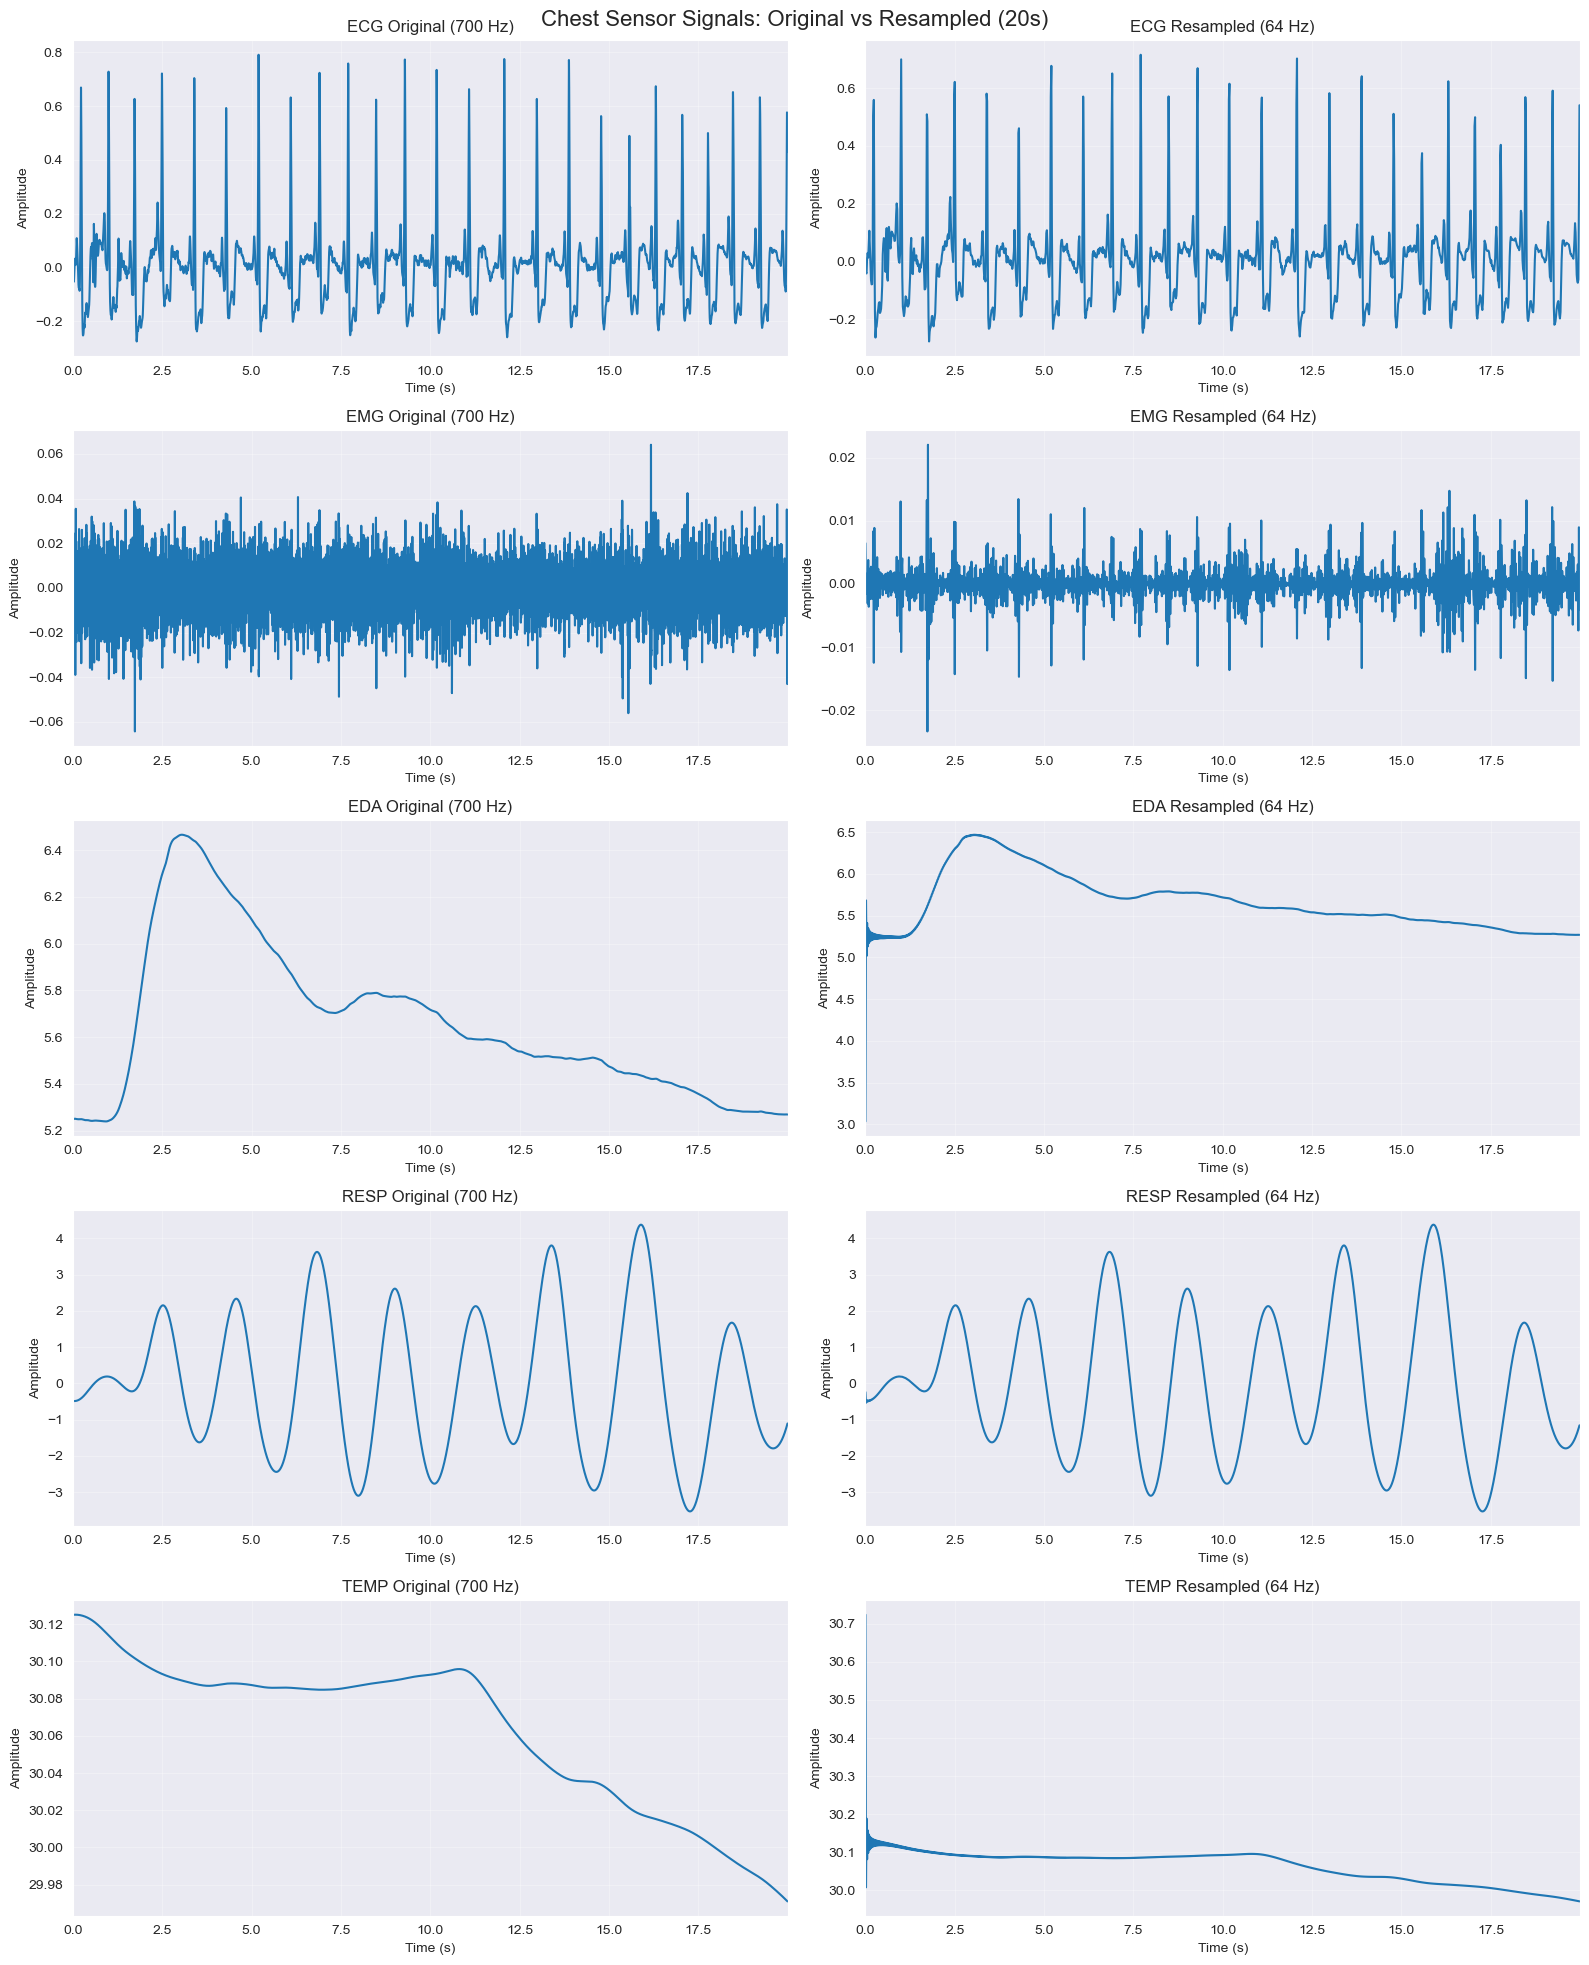

In [33]:
signals_to_compare = {
    'ECG': (ecg_filtered, ecg_resampled),
    'EMG': (emg_filtered, emg_resampled),
    'EDA': (eda_filtered, eda_resampled),
    'RESP': (resp_filtered, resp_resampled),
    'TEMP': (temp_filtered, temp_resampled)
}
plot_resampling_comparison(signal_dict=signals_to_compare,
                           original_fs=original_fs,target_fs=target_fs,
                           time_duration=20.0,
                           suptitle='Chest Sensor Signals: Original vs Resampled (20s)'
)

The chest sensor signals were successfully resampled from 700 Hz to 64 Hz. As shown above the resampled signals preserve the overall waveform shape and amplitude of the original signals, indicating that key temporal patterns (e.g., ECG peaks, accelerometer movements) were retained while noise was reduced.

This resampling rate is consistent with previous studies that used 32–64 Hz for multimodal physiological data analysis [1,6].

To reduce computational complexity and standardise the data, all chest sensor signals were resampled from 700 Hz to 64 Hz, followed by visual inspection to evaluate information preservation. For EDA, RESP, TEMP, and ACC signals, the resampled waveforms closely matched the originals, with key physiological patterns (e.g.,  EDA changes, respiratory cycles, slow temperature drift, and movement spikes) and arewell preserved. High frequency noise was reduced without loss of relevant information, confirming that 64 Hz is sufficient for these low frequency sensor signals.

For ECG, the resampled signal retained QRS peaks and rhythm but showed some loss of sharpness in peak morphology, indicating that 64 Hz is acceptable for heart rate and HRV based features but suboptimal for detailed ECG waveform analysis.

Based on this analysis, EDA, RESP, TEMP, and ACC were resampled to 64 Hz, while ECG may be processed at 64 Hz for HRV features or kept at a higher rate if other features are required.


**Resampling the EMG Signal**

In contrast, EMG signals showed substantial loss of fine structure after downsampling at 64 Hz and cannot accurately capture muscle activity patterns. The EMG signal was instead downsampled at a higher sampling rate (256 Hz) so that it can preserve physiological signal for stress detection.


EMG: Original length 4255300 → Resampled length 1556224 at 256 Hz
EMG Labels: Original length 4255300 → Resampled length 1556224 at 256 Hz


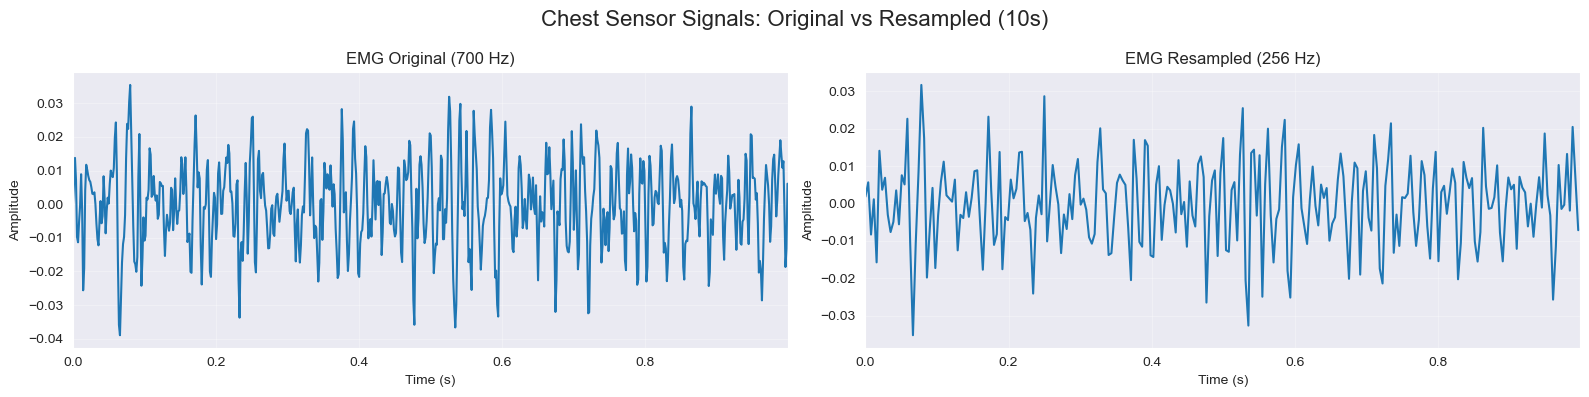

In [34]:
target_fs_emg = 256  # Hz
resampling_factor_emg = target_fs_emg / original_fs # Note Original FS = 700 Hz
emg_resampled_256 = signal.resample(emg_filtered, int(len(emg_filtered) * resampling_factor_emg))

print(f"EMG: Original length {len(emg_filtered)} → Resampled length {len(emg_resampled_256)} at {target_fs_emg} Hz")

#Resample EMG label (using nearest-neighbor interpolation to maintain integer values)
new_indices_emg = np.linspace(0, len(labels)-1, int(len(labels) * resampling_factor_emg))
label_interpolator_emg = interp1d(original_indices, labels, kind='nearest')
labels_resampled_emg = label_interpolator_emg(new_indices_emg).astype(int)
print(f"EMG Labels: Original length {len(labels)} → Resampled length {len(labels_resampled_emg)} at {target_fs_emg} Hz")

#Specify time duration directly
plot_resampling_comparison(signal_dict= { 'EMG': (emg_filtered, emg_resampled_256)},
                           original_fs=original_fs,target_fs=target_fs_emg,
                           time_duration=1.0, figsize=(16,4),
                           suptitle='Chest Sensor Signals: Original vs Resampled (10s)'
)

### 3.4 Window and Segmentation

For time-series data, it is necessary to segment the physiological data for feature extraction. Different window lengths were applied based on the characteristics of each signal modality [1, 7, 8]. For slow physiological signals such as electrodermal activity (EDA), respiration (RESP), skin temperature (TEMP), and electrocardiogram (ECG), a  sliding window with 60-second window length using window overlap of 0.25 seconds was used, similar to Darwish et al. [9]. This duration allows the extraction of stable physiological patterns, as these signals typically change more slowly over time.

In contrast, accelerometer (ACC) and electromyography (EMG) signals exhibit faster variations. Therefore, a 5 second window length with a window overlaps of 0.25 seconds was selected to capture short term activity more effectively [10].

In [35]:
def sliding_window(data, window_size, step_size):
    """Segment data using a sliding window."""
    windows = []
    for start in range(0, len(data) - window_size + 1, step_size):
        windows.append(data[start:start + window_size])
    return np.array(windows)

fast_window_sec = 5
slow_window_sec = 60
fast_fs = 256  # EMG
acc_fs = 64    # ACC
slow_fs = 64   # EDA, RESP, TEMP, ECG

# Using a sliding window, with a window offset of 0.25 seconds.
window_shift_sec = 0.25

# Fast signals: EMG, ACC
window_size_emg = int(fast_window_sec * fast_fs)
window_size_acc = int(fast_window_sec * acc_fs)
#Slow signals: ECG,EDA,RESP,Temp
window_size_slow = int(slow_window_sec * slow_fs)

step_size_emg = int(window_shift_sec * fast_fs)
step_size_acc = int(window_shift_sec * acc_fs)
step_size_slow = int(window_shift_sec * slow_fs)

# Segment all resampled signals
emg_windows = sliding_window(emg_resampled_256, window_size_emg, step_size_emg)

acc_windows = []
for i in range(acc_resampled.shape[1]):
    acc_window = sliding_window(acc_resampled[:,i], window_size_acc, step_size_acc)
    acc_windows.append(acc_window)

ecq_windows = sliding_window(ecg_resampled, window_size_slow, step_size_slow)
eda_windows = sliding_window(eda_resampled, window_size_slow, step_size_slow)
resp_windows = sliding_window(resp_resampled, window_size_slow, step_size_slow)
temp_windows = sliding_window(temp_resampled, window_size_slow, step_size_slow)

### 3.4.1 Assign labels to windows

To assign labels to each segmented window, the predominant label (mode) within that time segment was used. This approach ensures that the label reflects the dominant affected state represented by the majority of samples in the window. Similar approaches have been applied in prior studies on affective computing and physiological signal processing [10].

In [36]:
len(labels_resampled)

389056

In [38]:
# Assign mode label to each window for all modalities, only keeping windows with valid labels (1,2,3)
from scipy.stats import mode
selected_labels = np.array([1, 2, 3])

def get_window_mode_label(window_indices, label_array):
    """Get the mode of valid labels in a window, return None if no valid labels"""
    window_labels = label_array[window_indices]
    filtered = window_labels[np.isin(window_labels, selected_labels)]
    if filtered.size > 0:
        return mode(filtered, keepdims=True)[0][0]
    return None

def create_windowed_signal(signal, labels, window_size, step_size):
    windowed_signal = []
    windowed_labels = []

    for i in range(0, len(signal) - window_size + 1, step_size):
        if i + window_size <= len(labels):
            window_label = get_window_mode_label(range(i, i + window_size), labels)
            if window_label is not None:  # Only keep windows with valid labels
                windowed_signal.append(signal[i:i + window_size])
                windowed_labels.append(window_label)

    return np.array(windowed_signal), np.array(windowed_labels)

# Create the window labels for  RESP signal
resp_windows, resp_window_labels = create_windowed_signal(resp_resampled, labels_resampled,
                                                          window_size_slow, step_size_slow)

eda_windows, eda_window_labels = create_windowed_signal(eda_resampled, labels_resampled,
                                                        window_size_slow, step_size_slow)

ecg_windows, ecg_window_labels = create_windowed_signal(ecg_resampled, labels_resampled,
                                                        window_size_slow, step_size_slow)

temp_windows, temp_window_labels = create_windowed_signal(temp_resampled, labels_resampled,
                                                          window_size_slow, step_size_slow)

acc_windows, acc_window_labels = create_windowed_signal(acc_resampled, labels_resampled,
                                                        window_size_acc, step_size_acc)

emg_windows, emg_window_labels = create_windowed_signal(emg_resampled_256, labels_resampled_emg,
                                                        window_size_emg, step_size_emg)

acc_windows, acc_window_labels = create_windowed_signal(acc_resampled, labels_resampled,
                                                        window_size_acc, step_size_acc)

With the creation of the windows across each sensor modality, the labels must be consistently assigned to the windows based on the window size and overlap. It is possible that with the overlaps, some windows have more than one label.  Therefore, when each window has been merged into a pandas dataframe, if the labels for each window are not consistent, these rows are removed.

In [39]:
windowed_labels_dict = { 'emg': emg_window_labels,
                         'acc': acc_window_labels,
                         'ecg': ecg_window_labels,
                         'eda': eda_window_labels,
                         'temp': temp_window_labels,
                         'resp': resp_window_labels}

# Just merge into DataFrame (handles uneven lengths automatically)
labels_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in windowed_labels_dict.items()]))

# Quick check for inconsistencies
inconsistent_rows = labels_df.apply(lambda row: len(set(row.dropna())) > 1, axis=1)
print(f"Inconsistent windows: {inconsistent_rows.sum()}/{len(labels_df)}")

# Get consensus (mode of each row)
consensus = labels_df.mode(axis=1)[0].values

Inconsistent windows: 660/9204


In [40]:
labels_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in windowed_labels_dict.items()]))
labels_df.fillna(999, inplace=True)
# Create mask for consistent rows (only one unique non-null value per row)
consistent_mask = labels_df.apply(lambda row: len(set(row.dropna())) <= 1, axis=1)

# Keep only consistent rows
consistent_indices = consistent_mask[consistent_mask].index.tolist()

# using the ids of the incosinstent window to remove these corresponding indexes from each window and label
emg_window_labels2 = [emg_window_labels[idx] for idx in consistent_indices if idx < len(emg_window_labels)]
emg_windows2 = [emg_windows[idx] for idx in consistent_indices if idx < len(emg_windows)]

eda_window_labels2 = [eda_window_labels[idx] for idx in consistent_indices if idx < len(eda_window_labels)]
eda_windows2 = [eda_windows[idx] for idx in consistent_indices if idx < len(eda_windows)]

ecg_window_labels2 = [ecg_window_labels[idx] for idx in consistent_indices if idx < len(ecg_window_labels)]
ecg_windows2 = [ecg_windows[idx] for idx in consistent_indices if idx < len(ecg_windows)]

resp_window_labels2 = [resp_window_labels[idx] for idx in consistent_indices if idx < len(resp_window_labels)]
resp_windows2 = [resp_windows[idx] for idx in consistent_indices if idx < len(resp_windows)]

temp_window_labels2 = [temp_window_labels[idx] for idx in consistent_indices if idx < len(temp_window_labels)]
temp_windows2 = [temp_windows[idx] for idx in consistent_indices if idx < len(temp_windows)]

acc_window_labels2 = [acc_window_labels[idx] for idx in consistent_indices if idx < len(acc_window_labels)]
acc_windows2 = [acc_windows[idx] for idx in consistent_indices if idx < len(acc_windows)]


In [43]:
# Print number of windows and label distribution for each modality
from collections import Counter

print("Window label distribution (only labels 1, 2, 3):")
for name, labels in [("EMG", emg_window_labels2), ("ACC", acc_window_labels2),
                     ("ECG", ecg_window_labels2), ("EDA", eda_window_labels2),
                     ("RESP", resp_window_labels2), ("TEMP", temp_window_labels2)]:
    counts = Counter(labels)
    print(f"\n{name}: {len(labels)} windows")
    for label in sorted(counts.keys()):
        print(f"  Label {int(label)} ({label_names[int(label)]}): {counts[label]} windows ({counts[label]/len(labels)*100:.1f}%)")

Window label distribution (only labels 1, 2, 3):

EMG: 7884 windows
  Label 1 (Baseline): 4596 windows (58.3%)
  Label 2 (Stress): 2260 windows (28.7%)
  Label 3 (Amusement): 1028 windows (13.0%)

ACC: 7884 windows
  Label 1 (Baseline): 4596 windows (58.3%)
  Label 2 (Stress): 2260 windows (28.7%)
  Label 3 (Amusement): 1028 windows (13.0%)

ECG: 7884 windows
  Label 1 (Baseline): 4596 windows (58.3%)
  Label 2 (Stress): 2260 windows (28.7%)
  Label 3 (Amusement): 1028 windows (13.0%)

EDA: 7884 windows
  Label 1 (Baseline): 4596 windows (58.3%)
  Label 2 (Stress): 2260 windows (28.7%)
  Label 3 (Amusement): 1028 windows (13.0%)

RESP: 7884 windows
  Label 1 (Baseline): 4596 windows (58.3%)
  Label 2 (Stress): 2260 windows (28.7%)
  Label 3 (Amusement): 1028 windows (13.0%)

TEMP: 7884 windows
  Label 1 (Baseline): 4596 windows (58.3%)
  Label 2 (Stress): 2260 windows (28.7%)
  Label 3 (Amusement): 1028 windows (13.0%)



As seen above, the number of windows and label distributions for each chest sensor modality are displayed. Only windows with valid labels (1, 2, 3) were kept, ensuring that the segmented data accurately reflects the predominant emotional states during those time periods.


### 3.5 Window Feature Extraction

The next stage of preprocessing is feature extraction cross each sensor window. Generally across all the sensor signal windows, statical metrics are calculated including the following, which describe the intensity and variabilty of the signal across the time series.

- mean and median
- standard deviation,
- min and max,
- range,
- lower quartile (Q1) and upper quartile (Q3),
- RMS,
- Skewness,
- Kurtosis
- Signal Magnitude Area (SMA)

Other measures include using metrics obtains from the frequency domain, such as Power Spectral Density (PSD) and characteristic frequencies.

**ACC (Accelerometer) Feature Extraction**

Accelerometer signals capture movement intensity and direction along three axes ($x$, $y$, $z$), which can change with different emotional states. For example, stress is often associated with increased fidgeting or restlessness, while neutral or amused states may involve more stable body positions [1]. Other signals that were calculated include features extracted from the frequency-domain .

Based on feature extraction techniques suggested in literature [1, 7, 11],  Fast Fourier Transform and PSD extraction were applied to each axis and the magnitude signal to extract dominant frequency, mean frequency, peak frequency, spectral entropy, and total power. These features capture rhythmic or repetitive movements that may be associated with affective or behaviours linked to stress.

In [44]:
    # Import various features for signal processing and statistics functions for feature extraction
    from scipy.signal import find_peaks, welch, detrend

In [58]:
def extract_acc_features(acc_window, fs=64):
    """ Extract features from accelerometer windows for stress detection  """
    features = {}

    # Calculate vector magnitude of acceleration
    vector_magnitude = np.sqrt(np.sum(acc_window**2, axis=1))

    # Time-domain features for each axis and magnitude
    axes = ['x', 'y', 'z', 'mag']
    signals = [acc_window[:, 0], acc_window[:, 1], acc_window[:, 2], vector_magnitude]

    for i, (axis, signal) in enumerate(zip(axes, signals)):
        # Basic statistical features
        features[f'acc_{axis}_mean'] = np.mean(signal)
        features[f'acc_{axis}_std'] = np.std(signal)
        features[f'acc_{axis}_min'] = np.min(signal)
        features[f'acc_{axis}_max'] = np.max(signal)
        features[f'acc_{axis}_range'] = np.max(signal) - np.min(signal)
        features[f'acc_{axis}_median'] = np.median(signal)
        features[f'acc_{axis}_q1'] = np.percentile(signal, 25)
        features[f'acc_{axis}_q3'] = np.percentile(signal, 75)
        features[f'acc_{axis}_iqr'] = features[f'acc_{axis}_q3'] - features[f'acc_{axis}_q1']
        features[f'acc_{axis}_rms'] = np.sqrt(np.mean(signal**2))
        features[f'acc_{axis}_skewness'] = stats.skew(signal)
        features[f'acc_{axis}_kurtosis'] = stats.kurtosis(signal)

        # Signal Magnitude Area (SMA) - for individual axes it's just the sum of absolutes
        features[f'acc_{axis}_sma'] = np.sum(np.abs(signal)) / len(signal)

        # First-order differences (rate of change)
        diff = np.diff(signal)
        features[f'acc_{axis}_diff_mean'] = np.mean(np.abs(diff))
        features[f'acc_{axis}_diff_std'] = np.std(diff)

        frequencies, psd = welch(signal, fs=fs, nperseg=min(256, len(signal)))

        # Skip DC component (0 Hz)
        if len(frequencies) > 1:
            frequencies = frequencies[1:]
            psd = psd[1:]

        # Total power
        features[f'acc_{axis}_total_power'] = np.sum(psd)

        if len(psd) > 0 and np.sum(psd) > 0:
            # Mean frequency
            features[f'acc_{axis}_mean_freq'] = np.sum(frequencies * psd) / np.sum(psd)

            # Median frequency (frequency at which 50% of power is below/above)
            cumsum_psd = np.cumsum(psd)
            median_idx = np.argmax(cumsum_psd >= 0.5 * cumsum_psd[-1])
            features[f'acc_{axis}_median_freq'] = frequencies[median_idx]

            # Peak frequency (frequency with maximum power)
            peak_idx = np.argmax(psd)
            features[f'acc_{axis}_peak_freq'] = frequencies[peak_idx]

            # Spectral entropy (normalised)
            psd_norm = psd / np.sum(psd)
            psd_norm = psd_norm[psd_norm > 0]  # Remove zeros
            features[f'acc_{axis}_spectral_entropy'] = -np.sum(psd_norm * np.log2(psd_norm)) / np.log2(len(psd_norm)) if len(psd_norm) > 0 else 0

            # Power in specific frequency bands
            low_band = (0.5, 3)  # Low band (0.5-3 Hz): slow movements
            low_indices = np.where((frequencies >= low_band[0]) & (frequencies <= low_band[1]))[0]
            features[f'acc_{axis}_low_band_power'] = np.sum(psd[low_indices]) if len(low_indices) > 0 else 0

            mid_band = (3, 10) # Mid band (3-10 Hz): moderate movements
            mid_indices = np.where((frequencies >= mid_band[0]) & (frequencies <= mid_band[1]))[0]
            features[f'acc_{axis}_mid_band_power'] = np.sum(psd[mid_indices]) if len(mid_indices) > 0 else 0

            high_band = (10, 20) # High band (10-20 Hz): fast movements
            high_indices = np.where((frequencies >= high_band[0]) & (frequencies <= high_band[1]))[0]
            features[f'acc_{axis}_high_band_power'] = np.sum(psd[high_indices]) if len(high_indices) > 0 else 0

    # Correlation between axes
    features['acc_corr_xy'] = np.corrcoef(acc_window[:, 0], acc_window[:, 1])[0, 1] if len(acc_window) > 1 else 0
    features['acc_corr_xz'] = np.corrcoef(acc_window[:, 0], acc_window[:, 2])[0, 1] if len(acc_window) > 1 else 0
    features['acc_corr_yz'] = np.corrcoef(acc_window[:, 1], acc_window[:, 2])[0, 1] if len(acc_window) > 1 else 0

    return features

This is applied on the filtered ACC signal windows:

In [59]:
acc_features_list = []
acc_feature_names = []
first_window = True

# Process each ACC window
for i in range(len(acc_windows2)):
    # Extract features from the current window
    features = extract_acc_features(acc_windows2[i])

    # For the first window, record feature names
    if first_window:
        acc_feature_names = list(features.keys())
        first_window = False

    # Convert dictionary to array in consistent order
    feature_values = [features[name] for name in acc_feature_names]
    acc_features_list.append(feature_values)


# Convert to numpy array
acc_features = np.array(acc_features_list)

# Handle windows with NaN values
if np.isnan(acc_features).any():
    print(f"Warning: {np.isnan(acc_features).sum()} NaN values found in ACC features")

    # Replace NaNs with mean of that feature
    for col in range(acc_features.shape[1]):
        col_data = acc_features[:, col]
        if np.isnan(col_data).any():
            col_mean = np.nanmean(col_data)
            acc_features[:, col] = np.where(np.isnan(col_data), col_mean, col_data)

# Print results
print(f"ACC Features shape: {acc_features.shape}")
print(f"Number of features per window: {acc_features.shape[1]}")

ACC Features shape: (7884, 95)
Number of features per window: 95


**ECG Feature Extraction**

For ECG signals, both statistical and physiological features were extracted. Specifically the R-peaks were detected from the filtered ECG signal to compute heart rate (HR) and the heart rate variability (HRV) metrics. Specifically, the following features were extracted:

- Mean HR, min HR, max HR
- Mean RR interval (average time between two heartbeats (R-peaks))
- SDNN (standard deviation of RR intervals)
- RMSSD (root mean square of successive RR differences)
- pNN50 (percentage of RR intervals differing by > 50 ms)

These features reflect cardiac dynamics and autonomous activity, which typically change with stress. From the RR interval series, within the frequency domain, the PSD was extracted to  obtain:

- Low Frequency (LF) power (0.04–0.15 Hz)
- High Frequency (HF) power (0.15–0.4 Hz)
- LF/HF ratio

As reported in the literature, these features are strongly influenced by stress [1, 11, 12].


In [60]:
def extract_ecg_features(ecg_window, fs=64):
    """ Extract time-domain and frequency-domain features from ECG window for stress detection. """

    features = {}
    features['ecg_mean'] = np.mean(ecg_window)
    features['ecg_std'] = np.std(ecg_window)
    features['ecg_min'] = np.min(ecg_window)
    features['ecg_max'] = np.max(ecg_window)
    features['ecg_range'] = np.max(ecg_window) - np.min(ecg_window)
    features['ecg_median'] = np.median(ecg_window)
    features['ecg_rms'] = np.sqrt(np.mean(ecg_window**2))
    features['ecg_skewness'] = stats.skew(ecg_window)
    features['ecg_kurtosis'] = stats.kurtosis(ecg_window)

    # Find R-peaks using a simple thresholding method
    threshold = np.mean(ecg_window) + 0.5 * np.std(ecg_window)
    peaks, _ = find_peaks(ecg_window, height=threshold, distance=int(0.6*fs))
    rr_intervals = np.diff(peaks) / fs

    if len(rr_intervals) > 1:
        hr = 60 / rr_intervals
        features['ecg_hr_mean'] = np.mean(hr)
        features['ecg_hr_min'] = np.min(hr)
        features['ecg_hr_max'] = np.max(hr)
        features['ecg_rr_mean'] = np.mean(rr_intervals)
        features['ecg_sdnn'] = np.std(rr_intervals)
        features['ecg_rmssd'] = np.sqrt(np.mean(np.diff(rr_intervals)**2))
        features['ecg_pnn50'] = np.sum(np.abs(np.diff(rr_intervals)) > 0.05) / len(rr_intervals) * 100

        # HRV frequency domain features using Welch's method
        fxx, pxx = welch(rr_intervals, fs=1, nperseg=min(256, len(rr_intervals)))
        lf_band = (fxx >= 0.04) & (fxx < 0.15)
        hf_band = (fxx >= 0.15) & (fxx < 0.4)
        lf_power = np.sum(pxx[lf_band])
        hf_power = np.sum(pxx[hf_band])
        features['ecg_lf_power'] = lf_power
        features['ecg_hf_power'] = hf_power
        features['ecg_lf_hf_ratio'] = lf_power / hf_power if hf_power > 0 else np.nan
    else:
        for key in ['ecg_hr_mean','ecg_hr_min','ecg_hr_max','ecg_rr_mean','ecg_sdnn','ecg_rmssd','ecg_pnn50','ecg_lf_power','ecg_hf_power','ecg_lf_hf_ratio']:
            features[key] = np.nan
    return features


The feature extraction is applied to the filtered ECG signal windows.

ECG Features shape: (7884, 19)
Number of features per window: 19


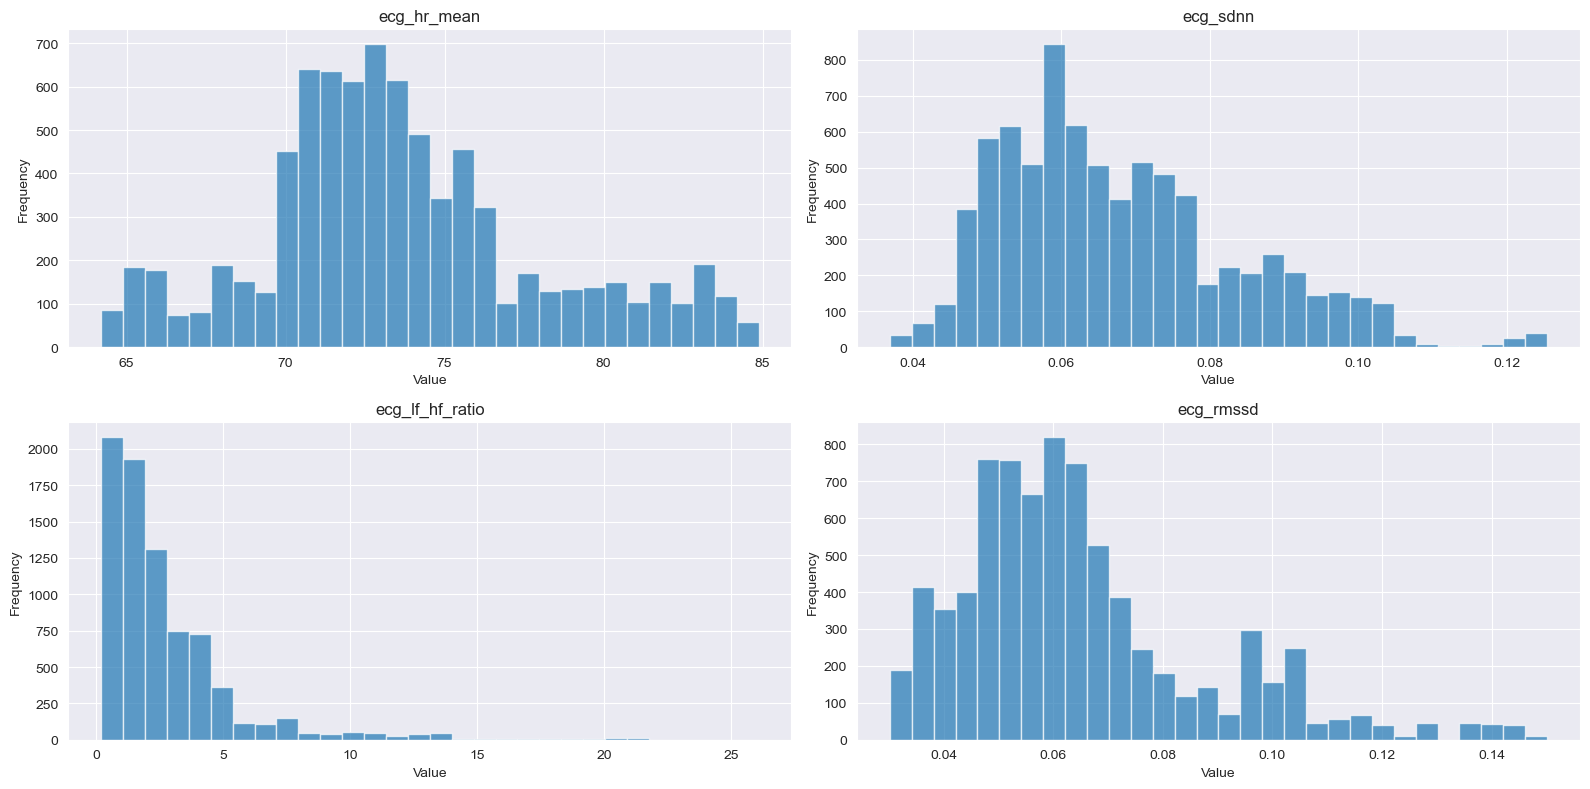

In [61]:
# Apply ECG feature extraction to all windows
ecg_features_list = []
ecg_feature_names = []
first_window = True

# Process each ECG window
for i in range(len(ecg_windows2)):
    # Extract features from current window
    features_dict = extract_ecg_features(ecg_windows2[i])

    if first_window:
        # Store feature names from first successful window
        ecg_feature_names = list(features_dict.keys())
        first_window = False

    # Convert dictionary to array in consistent order
    features_array = [features_dict[name] for name in ecg_feature_names]
    ecg_features_list.append(features_array)


# Convert to numpy array
ecg_features = np.array(ecg_features_list)

# Handle windows with NaN values
if np.isnan(ecg_features).any():
    print(f"Warning: {np.isnan(ecg_features).sum()} NaN values found in ECG features")
    for col in range(ecg_features.shape[1]):
        mask = np.isnan(ecg_features[:, col])
        if mask.any():
            col_mean = np.nanmean(ecg_features[:, col])
            ecg_features[mask, col] = col_mean

# Print results
print(f"ECG Features shape: {ecg_features.shape}")
print(f"Number of features per window: {ecg_features.shape[1]}")

# Visualise distribution of key ECG features
plt.figure(figsize=(16, 8))
key_features = ['ecg_hr_mean', 'ecg_sdnn', 'ecg_lf_hf_ratio', 'ecg_rmssd']
key_indices = [ecg_feature_names.index(name) if name in ecg_feature_names else -1 for name in key_features]

for i, (name, idx) in enumerate(zip(key_features, key_indices)):
    if idx >= 0:
        plt.subplot(2, 2, i+1)
        plt.hist(ecg_features[:, idx], bins=30, alpha=0.7)
        plt.title(name)
        plt.xlabel('Value')
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**RESP (Respiration) Feature Extraction**

For respiration signals, both statistical and frequency related features were calculated to capture breathing pattern including the breathing rate (breaths per minute), peak to peak interval variability were used to obtain the respiratory rhythm. Other information extracted includes the PSD of the signal.

In [62]:
def extract_resp_features(resp_window, fs=64):
    """  Extract time domain, respiratory dynamics, and frequency domain features from respiration windows. """

    features = {}

    # Time-domain statistical features
    features['resp_mean'] = np.mean(resp_window)
    features['resp_std'] = np.std(resp_window)
    features['resp_min'] = np.min(resp_window)
    features['resp_max'] = np.max(resp_window)
    features['resp_range'] = np.max(resp_window) - np.min(resp_window)
    features['resp_median'] = np.median(resp_window)
    features['resp_rms'] = np.sqrt(np.mean(resp_window**2))
    features['resp_skewness'] = stats.skew(resp_window)
    features['resp_kurtosis'] = stats.kurtosis(resp_window)

    # Detrend signal for better peak detection
    detrended_resp = detrend(resp_window)

    # Respiratory dynamics - find peaks for breathing rate calculation
    # Using both positive and negative peaks to capture full breathing cycles
    pos_peaks, _ = find_peaks(detrended_resp, height=0.1*np.std(detrended_resp),
                              distance=int(0.5*fs))  # Min distance between peaks ~0.5s
    neg_peaks, _ = find_peaks(-detrended_resp, height=0.1*np.std(detrended_resp),
                              distance=int(0.5*fs))

    # Use the more reliable set of peaks (whichever has more consistent intervals)
    if len(pos_peaks) > 2:
        peaks = pos_peaks
    elif len(neg_peaks) > 2:
        peaks = neg_peaks
    else:
        # If peak detection fails, use frequency analysis as fallback
        peaks = []

    # Calculate breathing features from peaks
    if len(peaks) > 2:
        # Intervals between breaths in seconds
        breath_intervals = np.diff(peaks) / fs

        # Breathing rate in breaths per minute
        breathing_rates = 60 / breath_intervals
        features['resp_breathing_rate_mean'] = np.mean(breathing_rates)
        features['resp_breathing_rate_std'] = np.std(breathing_rates)

        # Variability in breathing intervals
        features['resp_interval_std'] = np.std(breath_intervals)
        features['resp_interval_cv'] = np.std(breath_intervals) / np.mean(breath_intervals) if np.mean(breath_intervals) > 0 else 0
    else:
        features['resp_breathing_rate_mean'] = np.nan
        features['resp_breathing_rate_std'] = np.nan
        features['resp_interval_std'] = np.nan
        features['resp_interval_cv'] = np.nan

    # Energy of the signal
    features['resp_energy'] = np.sum(resp_window**2) / len(resp_window)

    nperseg = min(256, len(resp_window))
    freq, psd = welch(resp_window, fs=fs, nperseg=nperseg)

    # Breathing frequency typically between 0.05-0.7 Hz (3-42 breaths/min)
    resp_band = (freq >= 0.05) & (freq <= 0.7)
    resp_freq = freq[resp_band]
    resp_psd = psd[resp_band]

    if len(resp_psd) > 0:
        # Dominant frequency (frequency with highest power)
        peak_idx = np.argmax(resp_psd)
        features['resp_peak_freq'] = resp_freq[peak_idx] if peak_idx < len(resp_freq) else np.nan

        # Convert dominant frequency to breaths per minute
        features['resp_freq_breathing_rate'] = features['resp_peak_freq'] * 60 if not np.isnan(features['resp_peak_freq']) else np.nan

        # Total power in respiration band
        features['resp_total_power'] = np.sum(resp_psd)

        # Spectral entropy (complexity of frequency distribution)
        normalized_psd = resp_psd / np.sum(resp_psd)
        entropy = -np.sum(normalized_psd * np.log2(normalized_psd + 1e-10))
        features['resp_spectral_entropy'] = entropy

    return features

The feature extraction was then applied to the filtered RESP signal windows:

Respiration Features shape: (7884, 18)
Number of features per window: 18


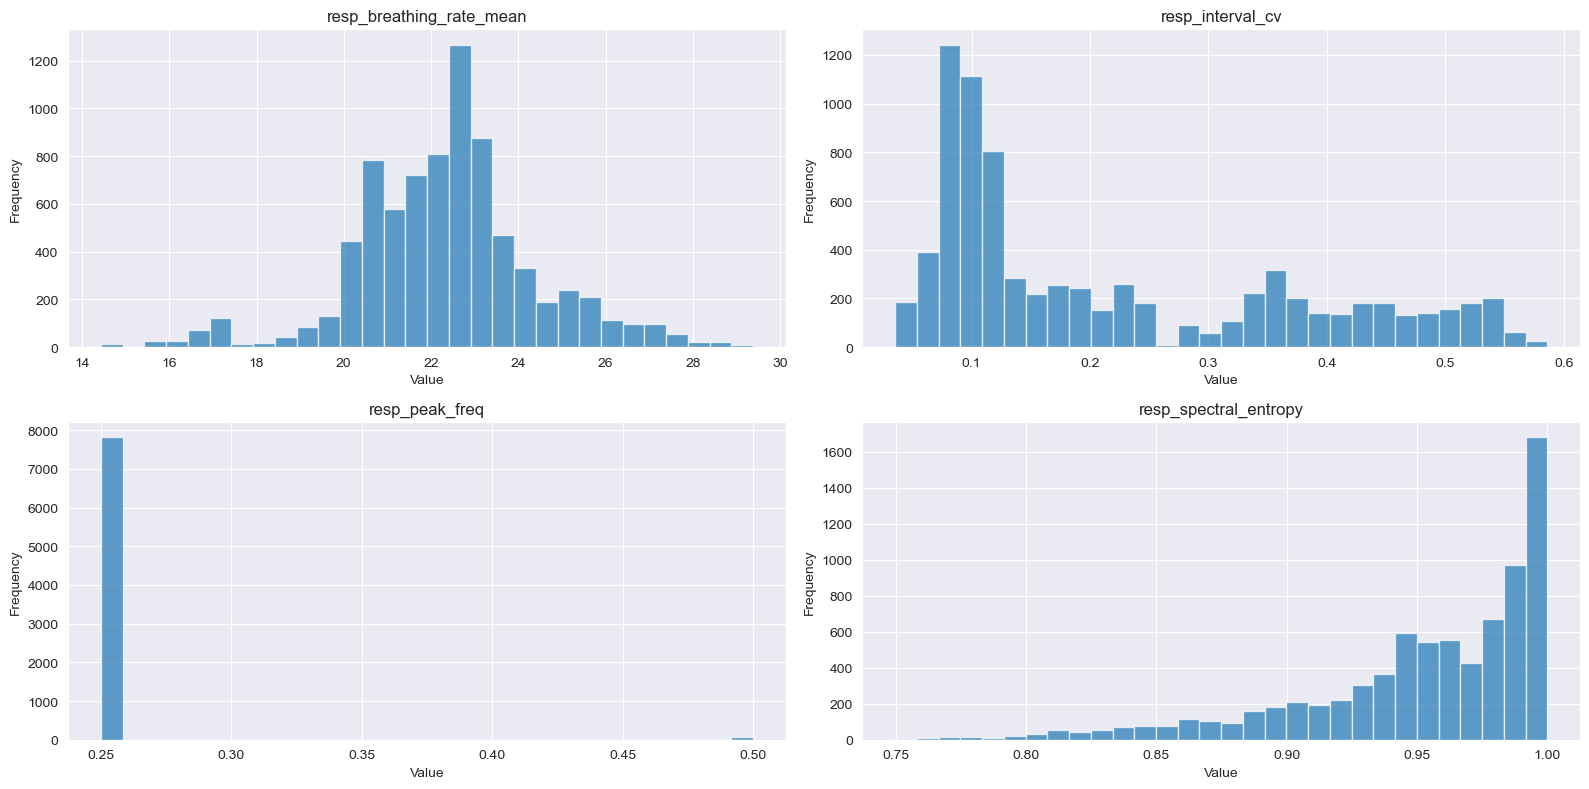

In [63]:
# Apply respiration feature extraction to all windows
resp_features_list = []
resp_feature_names = []
first_window = True

# Process each respiration window
for i in range(len(resp_windows2)):
    # Extract features from current window
    features_dict = extract_resp_features(resp_windows2[i])

    if first_window:
        # Store feature names from first successful window
        resp_feature_names = list(features_dict.keys())
        first_window = False

    # Convert dictionary to array in consistent order
    features_array = [features_dict[name] for name in resp_feature_names]
    resp_features_list.append(features_array)

# Convert to numpy array
resp_features = np.array(resp_features_list)

# Handle windows with NaN values
if np.isnan(resp_features).any():
    print(f"Warning: {np.isnan(resp_features).sum()} NaN values found in respiration features")

    # Replace NaNs with mean of that feature
    for col in range(resp_features.shape[1]):
        mask = np.isnan(resp_features[:, col])
        if mask.any():
            col_mean = np.nanmean(resp_features[:, col])
            resp_features[mask, col] = col_mean

# Print results
print(f"Respiration Features shape: {resp_features.shape}")
print(f"Number of features per window: {resp_features.shape[1]}")

# Visualise distribution of key respiration features
plt.figure(figsize=(16, 8))
key_features = ['resp_breathing_rate_mean', 'resp_interval_cv',
                'resp_peak_freq', 'resp_spectral_entropy']
key_indices = [resp_feature_names.index(name) if name in resp_feature_names else -1
               for name in key_features]

for i, (name, idx) in enumerate(zip(key_features, key_indices)):
    if idx >= 0:
        plt.subplot(2, 2, i+1)
        plt.hist(resp_features[:, idx], bins=30, alpha=0.7)
        plt.title(name)
        plt.xlabel('Value')
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**EDA (Electrodermal Activity) Feature Extraction**

Electrodermal activity reflects changes in skin conductance, which are directly linked to sympathetic nervous system activity and stress. The number of skin conductance responses (SCRs), SCR amplitude, and rise time were extracted. Also the PSD of the signal was used to estimate energy in relevant frequency bands (e.g. 0.045–0.25 Hz), to capture changes in skin conductance.

In [64]:
def extract_eda_features(eda_window, fs=64):
    """ Extract timedomain and frequency domain features from EDA windows. """
    features = {}

    # Time-domain statistical features for  skin conductance level
    features['eda_mean'] = np.mean(eda_window)
    features['eda_std'] = np.std(eda_window)
    features['eda_min'] = np.min(eda_window)
    features['eda_max'] = np.max(eda_window)
    features['eda_range'] = np.max(eda_window) - np.min(eda_window)
    features['eda_median'] = np.median(eda_window)
    features['eda_skewness'] = stats.skew(eda_window)
    features['eda_kurtosis'] = stats.kurtosis(eda_window)

    #  Obtain the Skin Conductance Responses (SCRs)
    # First, apply smoothing
    from scipy.ndimage import gaussian_filter1d
    eda_smooth = gaussian_filter1d(eda_window, sigma=1)

    # Compute first derivative (rate of change)
    eda_diff = np.diff(eda_smooth)
    eda_diff = np.append(eda_diff, 0)  # Append 0 to maintain array length

    # Find the  SCR peaks
    # Convert seconds to samples
    min_rise_time_samples = int(1 * fs)  # 1 second minimum rise time
    max_rise_time_samples = int(5 * fs)  # 5 seconds maximum rise time

    # Find peaks in the first derivative that exceed threshold (SCR onsets)
    # These are points where EDA starts rising quickly
    onset_threshold = 0.01 * features['eda_range']
    scr_onsets, _ = find_peaks(eda_diff, height=onset_threshold, distance=min_rise_time_samples)

    # Find peaks in the smoothed signal after onset
    scr_peaks = []
    scr_amplitudes = []
    scr_rise_times = []

    for onset in scr_onsets:
        # Look for peak within reasonable rise time window
        end_idx = min(len(eda_smooth), onset + max_rise_time_samples)
        if end_idx > onset + 1:  # Ensure we have a valid window
            peak_idx = onset + np.argmax(eda_smooth[onset:end_idx])
            if peak_idx > onset:  # Valid peak found
                scr_peaks.append(peak_idx)
                amp = eda_smooth[peak_idx] - eda_smooth[onset]
                if amp > 0.01:  # Minimum amplitude threshold
                    scr_amplitudes.append(amp)
                    scr_rise_times.append((peak_idx - onset) / fs)  # Convert to seconds

    # Store  features
    features['eda_scr_count'] = len(scr_amplitudes)
    features['eda_scr_rate'] = len(scr_amplitudes) / (len(eda_window) / fs)  # SCRs per second
    features['eda_scr_mean_amplitude'] = np.mean(scr_amplitudes) if scr_amplitudes else 0
    features['eda_scr_std_amplitude'] = np.std(scr_amplitudes) if len(scr_amplitudes) > 1 else 0
    features['eda_scr_mean_rise_time'] = np.mean(scr_rise_times) if scr_rise_times else 0

    # Frequency domain features using Welch's method
    nperseg = min(256, len(eda_window))
    freq, psd = welch(eda_window, fs=fs, nperseg=nperseg)

    # EDA frequency bands of interest
    vlf_mask = (freq >= 0) & (freq < 0.045)    # VLF: 0 - 0.045 Hz (very low frequency)
    lf_mask = (freq >= 0.045) & (freq < 0.15)  # LF: 0.045 - 0.15 Hz (low frequency)
    hf_mask = (freq >= 0.15) & (freq < 0.25)   # HF: 0.15 - 0.25 Hz (high frequency)

    features['eda_vlf_power'] = np.sum(psd[vlf_mask]) if np.any(vlf_mask) else 0
    features['eda_lf_power'] = np.sum(psd[lf_mask]) if np.any(lf_mask) else 0
    features['eda_hf_power'] = np.sum(psd[hf_mask]) if np.any(hf_mask) else 0

    # Total power in 0-0.25 Hz band
    total_power = features['eda_vlf_power'] + features['eda_lf_power'] + features['eda_hf_power']

    # Normalised powers (relative power in each band)
    features['eda_vlf_power_norm'] = features['eda_vlf_power'] / total_power if total_power > 0 else 0
    features['eda_lf_power_norm'] = features['eda_lf_power'] / total_power if total_power > 0 else 0
    features['eda_hf_power_norm'] = features['eda_hf_power'] / total_power if total_power > 0 else 0

    # Peak frequency (frequency with maximum power)
    if len(psd) > 0:
        features['eda_peak_freq'] = freq[np.argmax(psd)]
    else:
        features['eda_peak_freq'] = 0

    return features

Feature extraction was applied to all the filtered EDA signal windows

EDA Features shape: (7884, 20)
Number of features per window: 20
EDA feature names: ['eda_mean', 'eda_std', 'eda_min', 'eda_max', 'eda_range', 'eda_median', 'eda_skewness', 'eda_kurtosis', 'eda_scr_count', 'eda_scr_rate', 'eda_scr_mean_amplitude', 'eda_scr_std_amplitude', 'eda_scr_mean_rise_time', 'eda_vlf_power', 'eda_lf_power', 'eda_hf_power', 'eda_vlf_power_norm', 'eda_lf_power_norm', 'eda_hf_power_norm', 'eda_peak_freq']


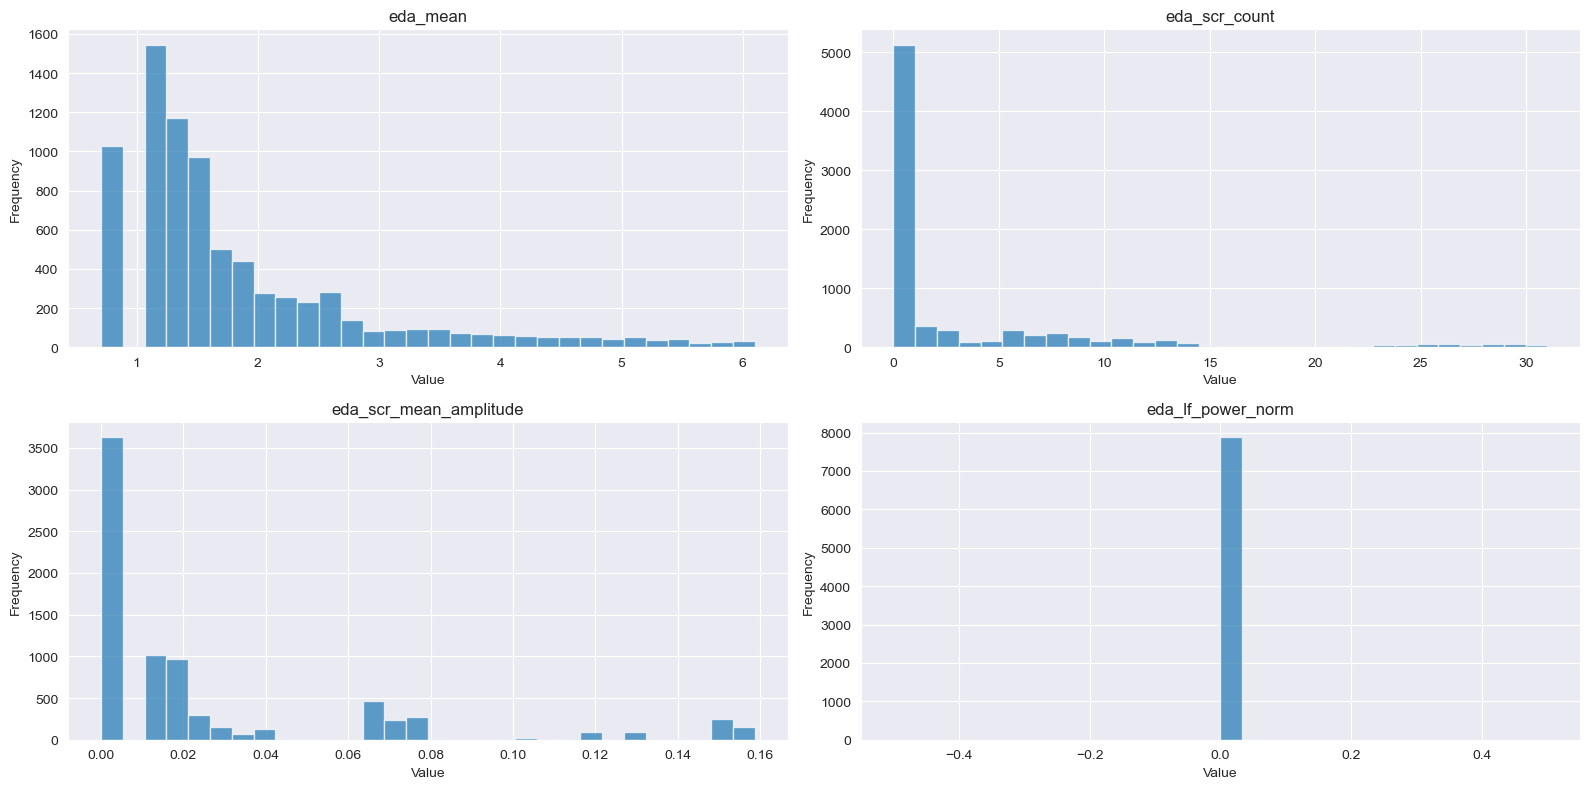

In [65]:
# Apply EDA feature extraction to all windows
eda_features_list = []
eda_feature_names = []
first_window = True

# Process each EDA window
for i in range(len(eda_windows2)):

    # Extract features from current window
    features_dict = extract_eda_features(eda_windows2[i])

    if first_window:
        # Store feature names from first successful window
        eda_feature_names = list(features_dict.keys())
        first_window = False

    # Convert dictionary to array in consistent order
    features_array = [features_dict[name] for name in eda_feature_names]
    eda_features_list.append(features_array)


# Convert to numpy array
eda_features = np.array(eda_features_list)

# Handle windows with NaN values
if np.isnan(eda_features).any():
    print(f"Warning: {np.isnan(eda_features).sum()} NaN values found in EDA features")

    # Replace NaNs with mean of that feature
    for col in range(eda_features.shape[1]):
        mask = np.isnan(eda_features[:, col])
        if mask.any():
            col_mean = np.nanmean(eda_features[:, col])
            eda_features[mask, col] = col_mean

# Print results
print(f"EDA Features shape: {eda_features.shape}")
print(f"Number of features per window: {eda_features.shape[1]}")
print(f"EDA feature names: {eda_feature_names}")

# Visualise distribution of key EDA features
plt.figure(figsize=(16, 8))
key_features = ['eda_mean', 'eda_scr_count', 'eda_scr_mean_amplitude', 'eda_lf_power_norm']
key_indices = [eda_feature_names.index(name) if name in eda_feature_names else -1
               for name in key_features]

for i, (name, idx) in enumerate(zip(key_features, key_indices)):
    if idx >= 0:
        plt.subplot(2, 2, i+1)
        plt.hist(eda_features[:, idx], bins=30, alpha=0.7)
        plt.title(name)
        plt.xlabel('Value')
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**EMG (Electromyography) Feature Extraction**

EMG signals reflect electrical activity produced by  muscles and are closely linked to physical tension and stress responses. EMG signals are high frequency, therefore a shorter window (5s) was used. Various statistical measures were used to extract features from the signal.

In [66]:
def extract_emg_features(emg_window, fs=256):
    """
    Extract features from EMG windows for stress detection.
    """
    features = {}

    # Time-domain statistical features
    features['emg_mean'] = np.mean(emg_window)
    features['emg_std'] = np.std(emg_window)
    features['emg_min'] = np.min(emg_window)
    features['emg_max'] = np.max(emg_window)
    features['emg_range'] = np.max(emg_window) - np.min(emg_window)
    features['emg_median'] = np.median(emg_window)
    features['emg_rms'] = np.sqrt(np.mean(emg_window**2))
    features['emg_skewness'] = stats.skew(emg_window)
    features['emg_kurtosis'] = stats.kurtosis(emg_window)

    # EMG-specific time domain features:

    # Mean Absolute Value (MAV)
    features['emg_mav'] = np.mean(np.abs(emg_window))

    # Waveform Length (WL) - cumulative length of the waveform
    features['emg_wl'] = np.sum(np.abs(np.diff(emg_window)))

    # Zero Crossing Rate (ZCR): count sign changes
    threshold = 0.01 * features['emg_range']
    zero_crossings = np.where(np.diff(np.signbit(emg_window)))[0]

    # Only count crossings if the amplitude change exceeds threshold
    valid_crossings = [i for i in zero_crossings if abs(emg_window[i+1] - emg_window[i]) > threshold]
    features['emg_zcr'] = len(valid_crossings) / len(emg_window)

    # Slope Sign Changes (SSC): count changes in slope sign
    diff_emg = np.diff(emg_window)
    slope_changes = np.where(np.diff(np.signbit(diff_emg)))[0]

    # Only count changes if they exceed threshold
    valid_slope_changes = [i for i in slope_changes if abs(diff_emg[i+1] - diff_emg[i]) > threshold]
    features['emg_ssc'] = len(valid_slope_changes) / len(emg_window)

    # Frequency-domain features using Welch's method

    # Calculate power spectral density
    frequencies, psd = welch(emg_window, fs=fs, nperseg=min(256, len(emg_window)))

    # Total power
    features['emg_total_power'] = np.sum(psd)

    # Mean frequency
    features['emg_mean_freq'] = np.sum(frequencies * psd) / np.sum(psd) if np.sum(psd) > 0 else 0

    # Median frequency (frequency below which 50% of power resides)
    cum_psd = np.cumsum(psd)
    median_power = cum_psd[-1] / 2
    median_freq_idx = np.where(cum_psd >= median_power)[0][0]
    features['emg_median_freq'] = frequencies[median_freq_idx]

    # Spectral entropy (normalised)
    psd_norm = psd / np.sum(psd)
    psd_norm = psd_norm[psd_norm > 0]  # Remove zeros to avoid log(0)
    features['emg_spectral_entropy'] = -np.sum(psd_norm * np.log2(psd_norm)) / np.log2(len(psd_norm)) if len(psd_norm) > 0 else 0

    # Power in specific frequency bands
    # EMG activity is typically in 20-250 Hz range

    low_band = (20, 50)     # Lower band (20-50 Hz)
    low_indices = np.where((frequencies >= low_band[0]) & (frequencies <= low_band[1]))[0]
    features['emg_low_band_power'] = np.sum(psd[low_indices]) if len(low_indices) > 0 else 0

    mid_band = (50, 100)    # Middle band (50-100 Hz)
    mid_indices = np.where((frequencies >= mid_band[0]) & (frequencies <= mid_band[1]))[0]
    features['emg_mid_band_power'] = np.sum(psd[mid_indices]) if len(mid_indices) > 0 else 0

    high_band = (100, 200)   # High band (100-200 Hz)
    high_indices = np.where((frequencies >= high_band[0]) & (frequencies <= high_band[1]))[0]
    features['emg_high_band_power'] = np.sum(psd[high_indices]) if len(high_indices) > 0 else 0

    return features

Feature extraction was applied to the EMG signal window:

EMG Features shape: (7884, 20)
Number of features per window: 20


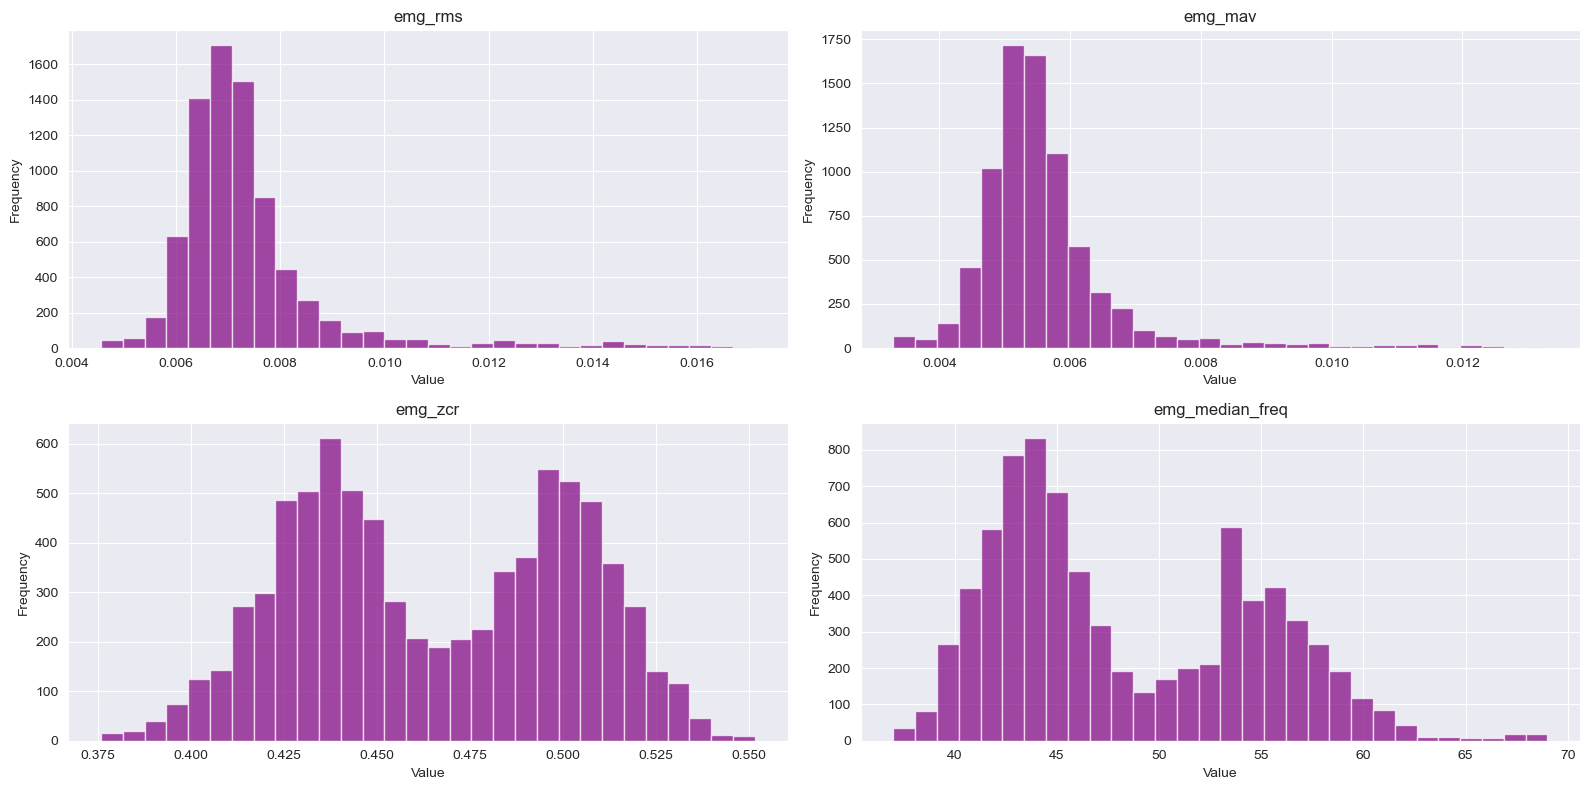

In [67]:
# Apply EMG feature extraction to all windows
emg_features_list = []
emg_feature_names = []
first_window = True

# Process each EMG window
for i in range(len(emg_windows2)):
    # Extract features from current window
    features = extract_emg_features(emg_windows2[i], fs=256)

    # Save feature names from the first successful window
    if first_window:
        emg_feature_names = list(features.keys())
        first_window = False

    # Add features to list in the same order
    emg_features_list.append([features[name] for name in emg_feature_names])

# Convert to numpy array
emg_features = np.array(emg_features_list)

# Handle windows with NaN values
if np.isnan(emg_features).any():
    print(f"Warning: {np.isnan(emg_features).sum()} NaN values found in EMG features")

    # Replace NaNs with mean of that feature
    for col in range(emg_features.shape[1]):
        col_data = emg_features[:, col]
        # Check if there are valid values in this column
        if not np.isnan(col_data).all():
            # Replace NaNs with mean of valid values
            col_mean = np.nanmean(col_data)
            emg_features[np.isnan(col_data), col] = col_mean

# Print results
print(f"EMG Features shape: {emg_features.shape}")
print(f"Number of features per window: {emg_features.shape[1]}")

# Visualise the distribution of EMG features
plt.figure(figsize=(16, 8))
key_features = ['emg_rms', 'emg_mav', 'emg_zcr', 'emg_median_freq']
key_indices = [emg_feature_names.index(name) if name in emg_feature_names else -1 for name in key_features]

for i, (name, idx) in enumerate(zip(key_features, key_indices)):
    if idx >= 0:
        plt.subplot(2, 2, i+1)
        plt.hist(emg_features[:, idx], bins=30, color='purple', alpha=0.7)
        plt.title(name)
        plt.xlabel('Value')
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**TEMP (Skin Temperature) Feature Extraction**

Skin temperature is a slower  physiological signal that can reflect nervous system responses due to stress. Although its changes are more smaller it can provide complementary information on stress and states.

In [68]:
def extract_temp_features(temp_window, fs=64):
    """ Extract features from temperature windows for stress detection. """
    features = {}

    # Time domain statistical features
    features['temp_mean'] = np.mean(temp_window)
    features['temp_std'] = np.std(temp_window)
    features['temp_min'] = np.min(temp_window)
    features['temp_max'] = np.max(temp_window)
    features['temp_range'] = np.max(temp_window) - np.min(temp_window)
    features['temp_median'] = np.median(temp_window)
    features['temp_q1'] = np.percentile(temp_window, 25)  # Lower quartile
    features['temp_q3'] = np.percentile(temp_window, 75)  # Upper quartile
    features['temp_iqr'] = features['temp_q3'] - features['temp_q1']  # Interquartile range
    features['temp_skewness'] = stats.skew(temp_window)
    features['temp_kurtosis'] = stats.kurtosis(temp_window)

    # Trend-based features
    # First-order differences (rate of change)
    diff_temp = np.diff(temp_window)
    features['temp_diff_mean'] = np.mean(diff_temp)
    features['temp_diff_std'] = np.std(diff_temp)
    features['temp_diff_max'] = np.max(diff_temp)
    features['temp_diff_min'] = np.min(diff_temp)

    # Linear slope (using linear regression)
    x = np.arange(len(temp_window))
    A = np.vstack([x, np.ones(len(x))]).T
    try:
        slope, intercept = np.linalg.lstsq(A, temp_window, rcond=None)[0]
        features['temp_slope'] = slope
    except:
        features['temp_slope'] = 0

    # Frequency domain features

    # Calculate PSD
    frequencies, psd = welch(temp_window, fs=fs, nperseg=min(256, len(temp_window)))

    # Total power
    features['temp_total_power'] = np.sum(psd)

    # Very low frequency power (temperature usually changes very slowly)
    vlf_indices = np.where(frequencies < 0.04)[0]
    features['temp_vlf_power'] = np.sum(psd[vlf_indices]) if len(vlf_indices) > 0 else 0

    # Normalised VLF power
    features['temp_vlf_power_norm'] = features['temp_vlf_power'] / features['temp_total_power'] if features['temp_total_power'] > 0 else 0

    # Spectral entropy (normalised)
    psd_norm = psd / np.sum(psd)
    psd_norm = psd_norm[psd_norm > 0] # Remove zeros to avoid log(0)
    features['temp_spectral_entropy'] = -np.sum(psd_norm * np.log2(psd_norm)) / np.log2(len(psd_norm)) if len(psd_norm) > 0 else 0

    return features

Feature extraction was applied to the filtered temperature signal windows:

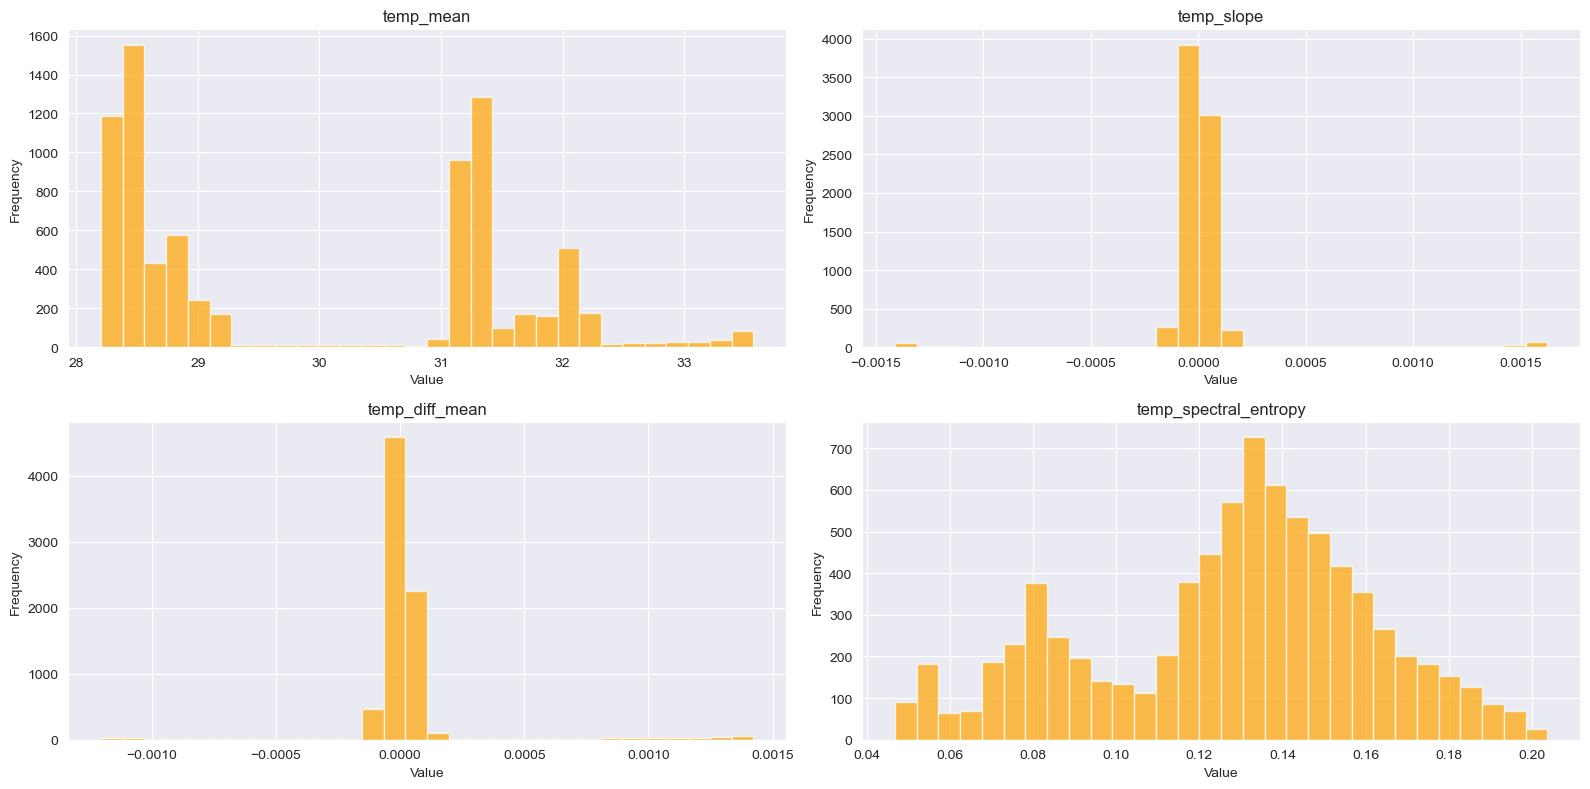

In [69]:
# Apply temperature feature extraction to all windows
temp_features_list = []
temp_feature_names = []
first_window = True

# Process each temperature window
for i in range(len(temp_windows2)):
    # Extract features from current window
    features = extract_temp_features(temp_windows2[i], fs=64)

    # Save feature names from the first successful window
    if first_window:
        temp_feature_names = list(features.keys())
        first_window = False

    # Add features to list in the same order
    temp_features_list.append([features[name] for name in temp_feature_names])

# Convert to numpy array
temp_features = np.array(temp_features_list)

# Visualise distribution of key temperature features
plt.figure(figsize=(16, 8))
key_features = ['temp_mean', 'temp_slope', 'temp_diff_mean', 'temp_spectral_entropy']
key_indices = [temp_feature_names.index(name) if name in temp_feature_names else -1 for name in key_features]

for i, (name, idx) in enumerate(zip(key_features, key_indices)):
    if idx >= 0:
        plt.subplot(2, 2, i+1)
        plt.hist(temp_features[:, idx], bins=30, color='orange', alpha=0.7)
        plt.title(name)
        plt.xlabel('Value')
        plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### 3.6 Combine the Feature Windows Together

All the extracted feature windows are the merged together to form a dataset for training the classifier models.

In [70]:
# All labels are same for each sensors, so use any of them.
feat_dict = np.hstack([
             np.vstack(ecg_window_labels2),
             temp_features,
             resp_features,
             ecg_features,
             eda_features,
             emg_features,
             acc_features
             ])

feat_keys = ['label'] + temp_feature_names +  resp_feature_names +  ecg_feature_names + eda_feature_names +  emg_feature_names + acc_feature_names

df2_feat = pd.DataFrame(feat_dict, columns=feat_keys)

In [71]:
df2_feat

,label,temp_mean,temp_std,temp_min,temp_max,temp_range,temp_median,temp_q1,temp_q3,temp_iqr,...,acc_mag_mean_freq,acc_mag_median_freq,acc_mag_peak_freq,acc_mag_spectral_entropy,acc_mag_low_band_power,acc_mag_mid_band_power,acc_mag_high_band_power,acc_corr_xy,acc_corr_xz,acc_corr_yz
0,1.0,28.896625,0.131390,28.734848,29.131303,0.396455,28.854145,28.779216,29.021237,0.242021,...,5.410389,6.00,6.25,0.663110,0.000056,0.000215,3.528159e-06,0.459158,0.487948,0.400349
1,1.0,28.897030,0.131950,28.734848,29.131303,0.396455,28.854145,28.779216,29.021237,0.242021,...,5.152909,5.50,6.25,0.666455,0.000049,0.000174,3.187223e-06,0.441166,0.521711,0.460455
2,1.0,28.897451,0.132529,28.734848,29.131303,0.396455,28.854145,28.779216,29.021237,0.242021,...,4.806350,4.50,6.25,0.673586,0.000044,0.000140,2.834381e-06,0.458852,0.486873,0.483175
3,1.0,28.897888,0.133127,28.734848,29.132694,0.397846,28.854145,28.779216,29.021237,0.242021,...,4.492832,4.00,4.00,0.666711,0.000040,0.000116,2.484546e-06,0.480631,0.490073,0.504364
4,1.0,28.898341,0.133742,28.734848,29.134333,0.399485,28.854145,28.779216,29.021237,0.242021,...,4.251544,4.00,4.00,0.649727,0.000038,0.000103,2.141161e-06,0.443135,0.537910,0.490159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7879,3.0,32.215838,0.085371,32.118822,32.342097,0.223275,32.170855,32.130821,32.317018,0.186196,...,3.551141,3.25,3.50,0.548307,0.000121,0.000219,1.530458e-06,-0.323220,-0.011427,0.004497
7880,3.0,32.216517,0.085553,32.118822,32.342097,0.223275,32.170964,32.130821,32.317665,0.186844,...,3.544883,3.25,3.50,0.533577,0.000130,0.000251,1.558594e-06,-0.309272,-0.213404,0.040447
7881,3.0,32.217178,0.085739,32.118822,32.342097,0.223275,32.171072,32.130821,32.318379,0.187558,...,3.530927,3.25,3.50,0.518742,0.000126,0.000256,1.408710e-06,-0.243758,-0.313622,0.070358
7882,3.0,32.217824,0.085930,32.118822,32.342097,0.223275,32.171459,32.130821,32.319110,0.188289,...,3.515389,3.25,3.50,0.506342,0.000106,0.000230,1.124020e-06,-0.256764,-0.311938,0.049749


Finally for each subject the data is exported to a *.csv* file that is used for merging together into the training dataset used for the ML models.

In [72]:
#export df_feat to CSV file
df2_feat.to_csv('df2_feat_{:s}.csv'.format(subject_name), index=False)

### 3.7 Combining Feature Windows

The previously generated feature windows for each subject was then combined. Once combined, the entire dataset was split into the training and test data used for evaluating the perfomance of the ML classifier models developed in this case study.


In [86]:
import glob
import os
import time
from collections import Counter

import pandas as pd
import numpy as np

# Visualisation imports
import seaborn as sns
import matplotlib.pyplot as plt

# Genneral Scikit-Learn imports
from sklearn.model_selection import LeaveOneGroupOut, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score,
                             confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score)

The previously pre-processed dataset for each subject was stored seperately in *.csv* files and the seperately loaded and combined into a single panda dataframe for further analysis and model building.

In [87]:
# Find all the generated .csv files for each subject
csv_files = glob.glob('df2_feat_S*.csv')

# List to store individual dataframes
df_list = []

# Load each file and add the participant column
for file_path in sorted(csv_files):
    filename = os.path.basename(file_path)
    subject_id = filename.replace('df2_feat_S', '').replace('.csv', '')

    # Load the CSV file
    df_temp = pd.read_csv(file_path)

    # Add participant subject ID column
    df_temp['subject'] = int(subject_id)

    # Add to list
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

Show the structure of the dataframe

In [88]:
df.head()

,label,temp_mean,temp_std,temp_min,temp_max,temp_range,temp_median,temp_q1,temp_q3,temp_iqr,...,acc_mag_median_freq,acc_mag_peak_freq,acc_mag_spectral_entropy,acc_mag_low_band_power,acc_mag_mid_band_power,acc_mag_high_band_power,acc_corr_xy,acc_corr_xz,acc_corr_yz,subject
0,1.0,33.835229,0.037969,33.776612,33.881205,0.104593,33.842660,33.794604,33.871773,0.077170,...,4.0,1.50,0.688538,0.000027,0.000037,0.000002,0.099231,0.202629,-0.024232,10
1,1.0,33.835577,0.037988,33.776612,33.881205,0.104593,33.843980,33.794604,33.872015,0.077411,...,4.0,6.50,0.690950,0.000025,0.000035,0.000002,0.130154,0.159803,-0.033747,10
2,1.0,33.835926,0.037999,33.776612,33.881205,0.104593,33.845249,33.794604,33.872302,0.077698,...,4.0,2.75,0.691424,0.000022,0.000031,0.000002,0.162133,0.146925,-0.066508,10
3,1.0,33.836274,0.038000,33.776612,33.881205,0.104593,33.846543,33.795876,33.872572,0.076695,...,4.0,2.75,0.693215,0.000018,0.000026,0.000002,0.187497,0.208441,-0.100107,10
4,1.0,33.836623,0.037994,33.776612,33.881205,0.104593,33.847864,33.797348,33.872857,0.075509,...,4.0,2.75,0.691823,0.000014,0.000022,0.000001,0.168645,0.221941,-0.079389,10


In [89]:
# Double check that the filter out meditation class (label 4) - keeping only 3 classes
print("Original dataset shape:", df.shape)
print("Original class distribution:")
print(df['label'].value_counts().sort_index())

# Remove meditation class (label 4)
df = df[df['label'] != 4].copy()

print("\nAfter removing meditation class:")
print("New dataset shape:", df.shape)
print("New dataset shape:", df.shape)
print("New class distribution:")
print(df['label'].value_counts().sort_index())

# Reset index after filtering
df = df.reset_index(drop=True)

Original dataset shape: (147297, 194)
Original class distribution:
label
1.0    70743
2.0    33478
3.0    16575
4.0    26501
Name: count, dtype: int64

After removing meditation class:
New dataset shape: (120796, 194)
New dataset shape: (120796, 194)
New class distribution:
label
1.0    70743
2.0    33478
3.0    16575
Name: count, dtype: int64


The data types of the columns are checked to determine if these are all numerical:


In [77]:
# check the data types of df
print(df.dtypes)

label                      float64
temp_mean                  float64
temp_std                   float64
temp_min                   float64
temp_max                   float64
                            ...   
acc_mag_high_band_power    float64
acc_corr_xy                float64
acc_corr_xz                float64
acc_corr_yz                float64
subject                      int64
Length: 194, dtype: object


In [78]:
#check if there is any nan values exist
df.isna().any().any()

np.False_

In [79]:
print(np.isinf(df).values.any())

False


There are no `NaN` or `inf` values in the dataframe

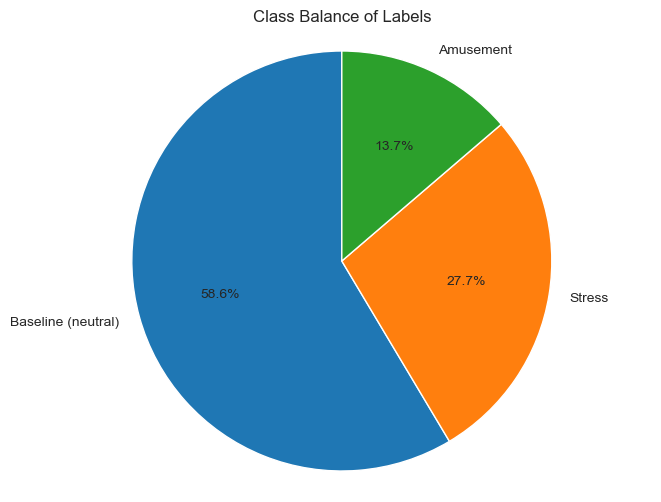

In [80]:
# Check class balance of the labels with pie chart
import matplotlib.pyplot as plt

# Define label mapping
label_mapping = {1: 'Baseline (neutral)', 2: 'Stress', 3: 'Amusement'}

label_counts = df['label'].value_counts()
label_names = [label_mapping[label] for label in label_counts.index]

plt.figure(figsize=(8, 6))
plt.pie(label_counts.values, labels=label_names, autopct='%1.1f%%', startangle=90)
plt.title('Class Balance of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Since the baseline(neutral) class is nearly more than half of the samples, while Ssress and amusement were underrepresented, class imbalance was addressed using two strategies: (i) class weighting during model training to emphasise minority classes, and
(ii) oversampling technique SMOTE to balance the training set.


### 3.8 Splitting Data between Training and Test Sets

The pre-processed data was split into training and testing sets not a traditional way. As there wass only 15 subjects total, the training set was kept only 12 people and inside the the CV fold, the testing set was selected for 3 people:  subject 12, subject 14 and subject 15.

During the training, LOSO cross validation was used to ensure that the models could generalise across different individuals rather than memorising subject specific patterns. In physiological emotion recognition, each subject’s baseline levels (e.g., heart rate, skin conductance, respiration) vary greatly, so training and testing on the same individual can lead to data leakage and overly optimistic results. By leaving one subject out for testing while training on all others, the model is evaluated on completely unseen physiological data, mimicking real world scenarios where a model must predict the emotional state of a new user.

In [90]:
# Split the data into features and target variable
selected_subjects = [12, 14, 15]
df_test = df[df['subject'].isin(selected_subjects)]
df_train = df[~df['subject'].isin(selected_subjects)]

X = df.drop('label', axis=1)
y = df[['label', 'subject']]

X_train =  df_train.drop(['label', 'subject'], axis=1)
X_test  =  df_test.drop(['label', 'subject'], axis=1)

y_train =  df_train['label']
y_test  =  df_test['label']

print("Training set shape:", len(X_train))
print("Testing set shape:", len(X_test))

Training set shape: 104326
Testing set shape: 16470


In [82]:
X_train.head()

,temp_mean,temp_std,temp_min,temp_max,temp_range,temp_median,temp_q1,temp_q3,temp_iqr,temp_skewness,...,acc_mag_mean_freq,acc_mag_median_freq,acc_mag_peak_freq,acc_mag_spectral_entropy,acc_mag_low_band_power,acc_mag_mid_band_power,acc_mag_high_band_power,acc_corr_xy,acc_corr_xz,acc_corr_yz
0,33.835229,0.037969,33.776612,33.881205,0.104593,33.842660,33.794604,33.871773,0.077170,-0.206613,...,4.348138,4.0,1.50,0.688538,0.000027,0.000037,0.000002,0.099231,0.202629,-0.024232
1,33.835577,0.037988,33.776612,33.881205,0.104593,33.843980,33.794604,33.872015,0.077411,-0.222614,...,4.364200,4.0,6.50,0.690950,0.000025,0.000035,0.000002,0.130154,0.159803,-0.033747
2,33.835926,0.037999,33.776612,33.881205,0.104593,33.845249,33.794604,33.872302,0.077698,-0.238790,...,4.382161,4.0,2.75,0.691424,0.000022,0.000031,0.000002,0.162133,0.146925,-0.066508
3,33.836274,0.038000,33.776612,33.881205,0.104593,33.846543,33.795876,33.872572,0.076695,-0.255161,...,4.415849,4.0,2.75,0.693215,0.000018,0.000026,0.000002,0.187497,0.208441,-0.100107
4,33.836623,0.037994,33.776612,33.881205,0.104593,33.847864,33.797348,33.872857,0.075509,-0.271688,...,4.524466,4.0,2.75,0.691823,0.000014,0.000022,0.000001,0.168645,0.221941,-0.079389


### 3.9) Data Standardisation
A standardisation pipeline was implemented to ensure consistent preprocessing across subjects. The ``StandardScaler`` from scikit-learn was fitted on the training data and then applied to seperately to all the test data to prevent data leakage. Each feature was standardised to have zero mean and unit variance, ensuring fair contribution from all sensor data (ACC, ECG, EDA, RESP, TEMP, EMG).

In [91]:
# Initialise the StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

X_train_scaled.head()

,temp_mean,temp_std,temp_min,temp_max,temp_range,temp_median,temp_q1,temp_q3,temp_iqr,temp_skewness,...,acc_mag_mean_freq,acc_mag_median_freq,acc_mag_peak_freq,acc_mag_spectral_entropy,acc_mag_low_band_power,acc_mag_mid_band_power,acc_mag_high_band_power,acc_corr_xy,acc_corr_xz,acc_corr_yz
0,0.108711,-0.044831,0.10495,0.09349,-0.060123,0.112398,0.100262,0.111930,0.080638,-0.198110,...,-0.961160,-1.07036,-1.968571,0.682816,-0.009737,-0.011829,-0.010152,0.221750,-0.689146,-0.114756
1,0.108954,-0.044744,0.10495,0.09349,-0.060123,0.113318,0.100262,0.112099,0.082017,-0.219877,...,-0.943848,-1.07036,0.646258,0.736351,-0.009755,-0.011862,-0.010138,0.313822,-0.810754,-0.140070
2,0.109197,-0.044695,0.10495,0.09349,-0.060123,0.114203,0.100262,0.112301,0.083657,-0.241882,...,-0.924488,-1.07036,-1.314864,0.746868,-0.009783,-0.011924,-0.010205,0.409039,-0.847319,-0.227225
3,0.109440,-0.044687,0.10495,0.09349,-0.060123,0.115104,0.101141,0.112491,0.077928,-0.264151,...,-0.888178,-1.07036,-1.314864,0.786638,-0.009818,-0.011994,-0.010327,0.484562,-0.672643,-0.316611
4,0.109684,-0.044718,0.10495,0.09349,-0.060123,0.116024,0.102157,0.112691,0.071146,-0.286634,...,-0.771106,-1.07036,-1.314864,0.755739,-0.009853,-0.012056,-0.010463,0.428429,-0.634308,-0.261495


In [92]:
X_test_scaled.head()

,temp_mean,temp_std,temp_min,temp_max,temp_range,temp_median,temp_q1,temp_q3,temp_iqr,temp_skewness,...,acc_mag_mean_freq,acc_mag_median_freq,acc_mag_peak_freq,acc_mag_spectral_entropy,acc_mag_low_band_power,acc_mag_mid_band_power,acc_mag_high_band_power,acc_corr_xy,acc_corr_xz,acc_corr_yz
24464,-0.560497,0.054061,-0.351737,-0.118251,0.337096,-0.567450,-0.574216,-0.551713,0.264822,1.061556,...,0.457407,0.775440,0.515517,0.612112,-0.009874,-0.011305,-0.009725,-1.267311,0.918034,-1.147345
24465,-0.560127,0.050058,-0.297346,-0.538894,-0.020128,-0.567040,-0.574184,-0.551012,0.270266,0.524482,...,0.410236,0.775440,0.515517,0.727428,-0.009862,-0.011248,-0.009820,-1.709064,1.139896,-1.571770
24466,-0.559631,0.051430,-0.297346,-0.537848,-0.019401,-0.566187,-0.574146,-0.550139,0.277057,0.512093,...,0.346427,0.775440,0.515517,0.822172,-0.009854,-0.011303,-0.009984,-2.395011,1.347283,-2.232604
24467,-0.559129,0.052803,-0.297346,-0.536756,-0.018641,-0.565036,-0.574119,-0.549247,0.284078,0.499906,...,0.241911,0.570351,0.515517,0.843437,-0.009847,-0.011446,-0.010137,-2.671654,1.458369,-2.424906
24468,-0.558621,0.054173,-0.297346,-0.535763,-0.017951,-0.563891,-0.574101,-0.548504,0.289981,0.488069,...,0.084579,0.570351,0.515517,0.736878,-0.009839,-0.011623,-0.010195,-2.771100,1.421189,-2.423205


### 3.10 Class Balancing Strategy

Previously, it was shown that the target variable in the dataset and found that it is imbalanced, with approximately 59% of samples belonging to the baseline (neutral) class, while the stress and amusement classes were underrepresented. To address this class imbalance, two strategies were chosen:

- class weighting,
- SMOTE oversampling.

To address class imbalance, SMOTE oversampling and class weighting were applied only to the training set within each cross-validation fold. This ensured that the validation and test data remained untouched, preventing data leakage and allowing an unbiased evaluation of model performance. Random oversampling was not used as this duplicates minority class samples to balance the dataset, whereas SMOTE generates new synthetic samples by interpolating between existing minority class instances. Especially, when using the FNN, this reduces the risk of overfitting and improves the learning of the class boundaries.


In [85]:
from imblearn.over_sampling import SMOTE

# Check original class distribution
print("Original class distribution:")
print(Counter(y_train))
print("\nOriginal class percentages:")
for label, count in Counter(y_train).items():
    print(f"{label}: {count/len(y_train)*100:.1f}%")

def apply_smote_per_subject(X_train, y_train, subjects, random_state=39):
    """ Apply SMOTE resampling per subject to maintain individual differences """

    X_smote_list = []
    y_smote_list = []
    subject_smote_list = []

    for subject_id in subjects.unique():
        # Get data for current subject
        subject_mask = subjects == subject_id
        X_subject = X_train[subject_mask]
        y_subject = y_train[subject_mask]

        print(f"Subject {subject_id}: Original samples = {len(X_subject)}")
        print(f"  Class distribution: {dict(Counter(y_subject))}")

        # Check if subject has multiple classes (needed for SMOTE)
        unique_classes = np.unique(y_subject)
        if len(unique_classes) > 1:
            # Apply SMOTE to this subject's data
            smote = SMOTE(random_state=39)
            X_subject_smote, y_subject_smote = smote.fit_resample(X_subject, y_subject)

            # Convert back to pandas DataFrame and Series
            X_subject_smote_df = pd.DataFrame(X_subject_smote, columns=X_subject.columns)
            y_subject_smote_series = pd.Series(y_subject_smote, name=y_subject.name)
            subject_ids_smote = pd.Series([subject_id] * len(X_subject_smote), name='subject')

            X_smote_list.append(X_subject_smote)
            y_smote_list.append(y_subject_smote)
            subject_smote_list.append(subject_ids_smote)

    # Combine all subjects' data
    X_combined = pd.concat(X_smote_list, ignore_index=True)
    y_combined = pd.concat(y_smote_list, ignore_index=True)
    subjects_combined = pd.concat(subject_smote_list)

    return X_combined, y_combined, subjects_combined

# Extract subject information from training data
train_subjects = df_train['subject']

# Apply per-subject SMOTE
X_train_smote, y_train_smote, subjects_smote = apply_smote_per_subject(
    X_train_scaled, y_train, train_subjects
)


Original class distribution:
Counter({1.0: 61283, 2.0: 28739, 3.0: 14304})

Original class percentages:
1.0: 58.7%
3.0: 13.7%
2.0: 27.5%
Subject 10: Original samples = 8288
  Class distribution: {1.0: 4740, 3.0: 1288, 2.0: 2260}
Subject 11: Original samples = 8092
  Class distribution: {1.0: 4740, 2.0: 2520, 3.0: 832}
Subject 13: Original samples = 8084
  Class distribution: {1.0: 4740, 3.0: 1328, 2.0: 2016}
Subject 16: Original samples = 8064
  Class distribution: {1.0: 4740, 2.0: 2492, 3.0: 832}
Subject 17: Original samples = 8284
  Class distribution: {1.0: 4744, 3.0: 1288, 2.0: 2252}
Subject 2: Original samples = 7884
  Class distribution: {1.0: 4596, 2.0: 2260, 3.0: 1028}
Subject 3: Original samples = 7800
  Class distribution: {1.0: 4580, 2.0: 2360, 3.0: 860}
Subject 4: Original samples = 7840
  Class distribution: {1.0: 4652, 3.0: 1288, 2.0: 1900}
Subject 5: Original samples = 8048
  Class distribution: {1.0: 4812, 3.0: 1296, 2.0: 1940}
Subject 6: Original samples = 7988
  Class

The class distribution before and after SMOTE is shown by the pie-chart

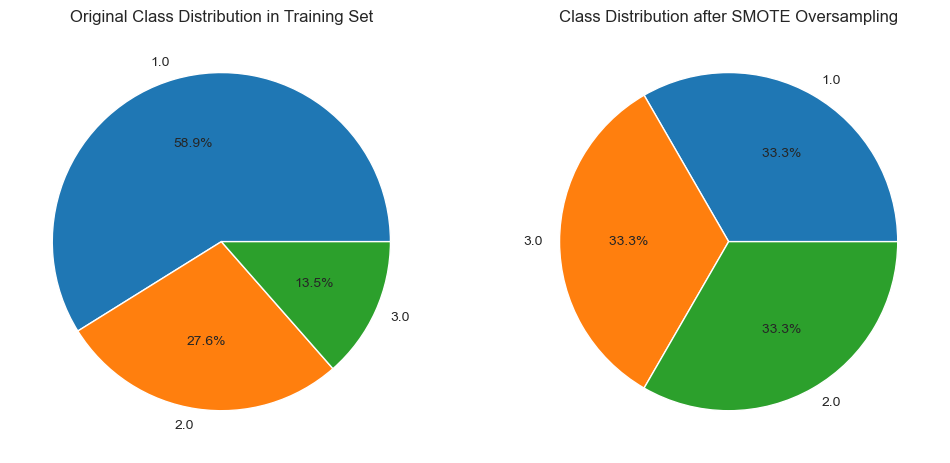

In [85]:
# Original class distribution pie chart
label_counts_original = y_train.value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(label_counts_original, labels=label_counts_original.index, autopct='%1.1f%%')
plt.title('Original Class Distribution in Training Set')

# SMOTE class distribution pie chart
label_counts_smote = y_train_smote.value_counts()
plt.subplot(1, 2, 2)
plt.pie(label_counts_smote, labels=label_counts_smote.index, autopct='% 1.1f%%')
plt.title('Class Distribution after SMOTE Oversampling')
plt.show()

## 4 Support Vector Machine (SVM) Classifier

In the first model, a SVM classifier was chosen to be investigated.

## 4.1 Motivation for using SVM Classifier Model

A SVM classifier was used at this model scales with a extremely large datasets with higher dimensional features, especially those that are extracted from time-series data using feature extraction windows. In this case study, using feautre windows with a fixed overlap or offset results in over 100k samples with 192 features, therefore this method can scale more effectively when compared to alternatives such as Gausian Mixed Models and Gaussian Processes that tend to be only solvable for smaller problems.

## 4.2 Structure of the FNN Network and Initial Hyperparameter Set

In the SVM model, a kernel based approach was used to enhance the ability to discriminate between the multi-class labelled data compared to the simple linear discrimation of class boundaries. A radial basis function (RBF) kernel was used as this enable the model to learn more complex non-linear classification boundaries amongst higher dimensional features in the dataset. The default regularisation penalty term of `C=10` was used, as this provides a reasonable starting point to verify the SVM model has satisfactory classifier performance using different balancing strategies, before further hyperparameter tuning was performed.

### 4.2.1 Model Evaluation and Metrics Functions

The model performance was assessed using macro-averaged precision, recall, and F1-score, along with accuracy and balanced accuracy. These metrics were selected to provide a fair evaluation across all emotional classes, despite the dataset's imbalance. In addition, confusion matrices, ROC-AUC, and precision–recall curves were plotted to further analyse classification behavior.

Furthermore, per class metrics (accuracy, f1,recall, precision) have been used to look how the model classify each classes. Similarly ROC-AUC curves has been shown for each emotion classess.


In [174]:
def calculate_metrics(y_true, y_pred, zero_division=0):
    """Calculate  classification metrics"""

    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'balanced_accuracy': balanced_accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='macro', zero_division=zero_division),
        'recall': recall_score(y_true, y_pred, average='macro', zero_division=zero_division),
        'f1': f1_score(y_true, y_pred, average='macro', zero_division=zero_division)
    }

def print_metrics(metrics_dict, model_name):
    """Print  formatted metrics"""
    print(f"\n{model_name} Metrics:")
    print("-" * 30)
    print(f"Accuracy : {metrics_dict['accuracy']:.4f}")
    print(f"Balanced Accuracy: {metrics_dict['balanced_accuracy']:.4f}")
    print(f"Precision: {metrics_dict['precision']:.4f}")
    print(f"Recall   : {metrics_dict['recall']:.4f}")
    print(f"F1-Score : {metrics_dict['f1']:.4f}")
    print("-" * 30)

def plot_confusion_matrix(y_true, y_pred, title, class_names=None, figsize=(8, 6)):
    """ Plot confusion matrix with both counts and percentages"""
    cm = confusion_matrix(y_true, y_pred)

    # If class names not provided, use label numbers
    if class_names is None:
        class_names = [f'Class {i}' for i in sorted(np.unique(y_true))]

    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create annotations with both count and percentage
    annotations = []
    for i in range(cm.shape[0]):
        row = []
        for j in range(cm.shape[1]):
            count = cm[i, j]
            percent = cm_percent[i, j]
            row.append(f'{count}\n({percent:.1f}%)')
        annotations.append(row)

    # Create figure and plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=annotations, fmt='', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Number of Samples'})

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_barchart_model_metrics(results_dict, title="Model Performance Comparison", figsize=(12, 6)):
    """  Plot comparison of model performance metrics across different approaches.  """

    metrics = ['f1', 'precision', 'recall', 'accuracy', 'balanced_accuracy']

    # Extract model names and scores
    model_names = list(results_dict.keys())
    num_models = len(model_names)

    # Prepare data for plotting
    model_scores = []
    for model_name in model_names:
        scores = [results_dict[model_name][m] for m in metrics]
        model_scores.append(scores)

    # Set up the bar chart
    x = np.arange(len(metrics))
    width = 0.8 / num_models  # Adjust width based on number of models

    # Create the bar chart
    plt.figure(figsize=figsize)
    bars = []

    for i, (model_name, scores) in enumerate(zip(model_names, model_scores)):
        offset = (i - num_models/2 + 0.5) * width
        bar = plt.bar(x + offset, scores, width, label=model_name, alpha=0.8)
        bars.append(bar)

    # Customize the chart
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title(title)
    plt.xticks(x, metrics, rotation=45, ha='right')
    plt.ylim(0, 1.05)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)

    # Add value labels on bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)

    for bar_set in bars:
        add_value_labels(bar_set)

    plt.tight_layout()
    plt.show()

from sklearn.preprocessing import label_binarize
from itertools import cycle

def plot_multiclass_roc_comparison(y_true, y_pred_svm_prob, y_pred_fnn_prob, class_names, figsize=(15, 5)):
    """ Plot ROC curves for multi-class classification comparing SVM and FNN models.
    """
    # Convert labels to binary format for ROC analysis (0-based)
    y_true_binary = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = len(class_names)

    # Create subplots for each class
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    colors = ['red', 'blue']

    svm_auc_scores = []
    fnn_auc_scores = []

    for i, class_name in enumerate(class_names):
        # ROC curve for SVM
        fpr_svm, tpr_svm, _ = roc_curve(y_true_binary[:, i], y_pred_svm_prob[:, i])
        roc_auc_svm = auc(fpr_svm, tpr_svm)
        svm_auc_scores.append(roc_auc_svm)

        # ROC curve for FNN
        fpr_fnn, tpr_fnn, _ = roc_curve(y_true_binary[:, i], y_pred_fnn_prob[:, i])
        roc_auc_fnn = auc(fpr_fnn, tpr_fnn)
        fnn_auc_scores.append(roc_auc_fnn)

        # Plot ROC curves
        axes[i].plot(fpr_svm, tpr_svm, color='red', lw=2,
                    label=f'SVM (AUC = {roc_auc_svm:.3f})')
        axes[i].plot(fpr_fnn, tpr_fnn, color='blue', lw=2,
                    label=f'FNN (AUC = {roc_auc_fnn:.3f})')
        axes[i].plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.8, label='Random Classifier')

        axes[i].set_xlim([0.0, 1.0])
        axes[i].set_ylim([0.0, 1.05])
        axes[i].set_xlabel('False Positive Rate')
        axes[i].set_ylabel('True Positive Rate')
        axes[i].set_title(f'ROC Curve - {class_name}')
        axes[i].legend(loc="lower right")
        axes[i].grid(alpha=0.3)

    plt.suptitle('ROC Curves: SVM vs FNN Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return svm_auc_scores, fnn_auc_scores

def plot_precision_recall_curves(y_true, y_pred_svm_prob, y_pred_fnn_prob, class_names, figsize=(15, 5)):
    """  Plot Precision-Recall curves for multi-class comparison between SVM and FNN. """

    # Convert labels to binary format
    y_true_binary = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = len(class_names)

    # Create subplots for each class
    fig, axes = plt.subplots(1, 3, figsize=figsize)

    svm_ap_scores = []
    fnn_ap_scores = []

    for i, class_name in enumerate(class_names):
        # PR curve for SVM
        precision_svm, recall_svm, _ = precision_recall_curve(y_true_binary[:, i], y_pred_svm_prob[:, i])
        ap_svm = average_precision_score(y_true_binary[:, i], y_pred_svm_prob[:, i])
        svm_ap_scores.append(ap_svm)

        # PR curve for FNN
        precision_fnn, recall_fnn, _ = precision_recall_curve(y_true_binary[:, i], y_pred_fnn_prob[:, i])
        ap_fnn = average_precision_score(y_true_binary[:, i], y_pred_fnn_prob[:, i])
        fnn_ap_scores.append(ap_fnn)

        # Plot PR curves
        axes[i].plot(recall_svm, precision_svm, color='red', lw=2, label=f'SVM (AP = {ap_svm:.3f})')
        axes[i].plot(recall_fnn, precision_fnn, color='blue', lw=2,label=f'FNN (AP = {ap_fnn:.3f})')

        # Baseline (random classifier)
        baseline = np.sum(y_true_binary[:, i]) / len(y_true_binary[:, i])
        axes[i].axhline(y=baseline, color='k', linestyle='--', alpha=0.8, label=f'Random (AP = {baseline:.3f})')

        axes[i].set_xlim([0.0, 1.0])
        axes[i].set_ylim([0.0, 1.05])
        axes[i].set_xlabel('Recall')
        axes[i].set_ylabel('Precision')
        axes[i].set_title(f'PR Curve - {class_name}')
        axes[i].legend(loc="lower left")
        axes[i].grid(alpha=0.3)

    plt.suptitle('Precision-Recall Curves: SVM vs FNN Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    return svm_ap_scores, fnn_ap_scores

def create_auc_summary_table(svm_auc, fnn_auc, class_names):
    """Create an AUC comparison table"""

    auc_df = pd.DataFrame({
        'Emotional_State': class_names,
        'SVM_AUC': svm_auc,
        'FNN_AUC': fnn_auc,
    })

    # Add macro averages
    macro_row = pd.DataFrame({
        'Emotional_State': ['Macro Average'],
        'SVM_AUC': [np.mean(svm_auc)],
        'FNN_AUC': [np.mean(fnn_auc)]
    })

    auc_comparison = pd.concat([auc_df, macro_row], ignore_index=True)

    print("ROC-AUC Performance Comparison")
    print("=" * 50)
    print(auc_comparison.round(4))

    return auc_comparison

from scipy import interpolate

def plot_macro_average_roc_comparison(y_true, y_pred_svm_prob, y_pred_fnn_prob, class_names, figsize=(10, 8)):
    """ Plot macro-average ROC curves for multi-class comparison between SVM and FNN. """
    # Convert labels to binary format (0-based)
    y_true_binary = label_binarize(y_true, classes=[0, 1, 2])
    n_classes = len(class_names)

    # Compute ROC for each class first
    fpr_svm = {}
    tpr_svm = {}
    roc_auc_svm = {}
    fpr_fnn = {}
    tpr_fnn = {}
    roc_auc_fnn = {}

    for i in range(n_classes):
        fpr_svm[i], tpr_svm[i], _ = roc_curve(y_true_binary[:, i], y_pred_svm_prob[:, i])
        roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

        fpr_fnn[i], tpr_fnn[i], _ = roc_curve(y_true_binary[:, i], y_pred_fnn_prob[:, i])
        roc_auc_fnn[i] = auc(fpr_fnn[i], tpr_fnn[i])

    # Interpolate all ROC curves at common FPR points
    mean_fpr = np.linspace(0, 1, 100)

    # SVM macro-average
    interp_tpr_svm = []
    for i in range(n_classes):
        interp_tpr_svm.append(np.interp(mean_fpr, fpr_svm[i], tpr_svm[i]))
    mean_tpr_svm = np.mean(interp_tpr_svm, axis=0)
    mean_tpr_svm[0] = 0.0
    roc_auc_svm_macro = auc(mean_fpr, mean_tpr_svm)

    # FNN macro-average
    interp_tpr_fnn = []
    for i in range(n_classes):
        interp_tpr_fnn.append(np.interp(mean_fpr, fpr_fnn[i], tpr_fnn[i]))
    mean_tpr_fnn = np.mean(interp_tpr_fnn, axis=0)
    mean_tpr_fnn[0] = 0.0
    roc_auc_fnn_macro = auc(mean_fpr, mean_tpr_fnn)

    # Plot macro-average ROC
    plt.figure(figsize=figsize)
    plt.plot(mean_fpr, mean_tpr_svm, 'red', lw=3,
            label=f'SVM Macro-avg (AUC = {roc_auc_svm_macro:.3f})')
    plt.plot(mean_fpr, mean_tpr_fnn, 'blue', lw=3,
            label=f'FNN Macro-avg (AUC = {roc_auc_fnn_macro:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.8, label='Random Classifier')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Macro-Average ROC Curve: SVM vs FNN', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

    return {
        'macro_auc': {'svm': roc_auc_svm_macro, 'fnn': roc_auc_fnn_macro},
        'per_class_auc': {'svm': [roc_auc_svm[i] for i in range(n_classes)],
                          'fnn': [roc_auc_fnn[i] for i in range(n_classes)]}
    }

### 4.2.2 Support Vector Machine (SVM) LOSO Cross-Validation Pipeline and Training

The SVM model is trained using a LOSO cross-validation pipeline for training and evaluating the model performance. Different preprocessed datasets are used for the pipeline to investigate the effect of.

- **No balancing** on the target variable (label)
- **Class Weighting** on the target variable (label)
- **Balancing** on the target variable (label) via SMOTE

In [87]:
def svm_loso_cv_pipeline(model, X, y, subjects):
    """ SVM cross-validation pipeline with Leave-One-Subject-Out (LOSO) cross-validation."""

    # Initialize LOSO cross-validation
    logo = LeaveOneGroupOut()

    # Storage for the fold results
    fold_metrics = []

    print(f"Starting SVM LOSO Cross-Validation with {len(np.unique(subjects))} subjects")

    # LOSO cross-validation loop
    for fold, (train_idx, val_idx) in enumerate(logo.split(X, y, subjects)):

        test_subject = subjects.iloc[val_idx[0]] if hasattr(subjects, 'iloc') else subjects[val_idx[0]]
        print(f"Fold {fold + 1}: Testing on Subject {test_subject}")

        # Split data for this fold
        if hasattr(X, 'iloc'): # pandas dataframe
            X_train_fold = X.iloc[train_idx]
            X_val_fold = X.iloc[val_idx]
        else:
            X_train_fold = X[train_idx]
            X_val_fold = X[val_idx]

        if hasattr(y, 'iloc'): # pandas dataframe
            y_train_fold = y.iloc[train_idx]
            y_val_fold = y.iloc[val_idx]
        else:
            y_train_fold = y[train_idx]
            y_val_fold = y[val_idx]

        # Train model for this LOSO fold
        model.fit(X_train_fold, y_train_fold)

        # Model Predictions
        y_pred = model.predict(X_val_fold)

        # Calculate metrics for this fold
        fold_metric = calculate_metrics(y_val_fold, y_pred, zero_division=0)
        fold_metrics.append(fold_metric)

        print(f"  Subject {test_subject} Accuracy: {fold_metric['accuracy']:.4f}")

    # Average metrics across all folds
    avg_metrics = {}
    for metric in fold_metrics[0].keys():
        avg_metrics[metric] = np.mean([fold[metric] for fold in fold_metrics])

    print(f"\nSVM LOSO CV Results (Average across {len(fold_metrics)} subjects):")
    print("=" * 60)
    for metric, value in avg_metrics.items():
        print(f"  {metric.replace('_', ' ').title():<20}: {value:.4f}")
    print("=" * 60)

    return avg_metrics

Perform the  LOSO Cross-Validation for training the SVM but without any class balancing

In [89]:
# Create a basic SVM model pipeline with LOSO Cross-Validation
from sklearn.svm import SVC

# Define a basic SVM model with default parameters
svm_model = SVC(random_state=39,
                C=10, kernel='rbf',
                gamma='auto',
                cache_size=1000,
                shrinking=False,
                #class_weight='balanced', # if using non-balanced samples
                probability=False,
                max_iter=-1, verbose=True)

# Extract subject information from training data
train_subjects = df_train['subject'] # Subject IDs for training samples

# Create SVM pipeline without balancing using LOSO CV
svm_pipeline_no_balancing = svm_loso_cv_pipeline(svm_model, X_train_scaled, y_train, train_subjects)

print_metrics(svm_pipeline_no_balancing, "SVM LOSO Cross-Validation: Without Balancing")

Starting SVM LOSO Cross-Validation with 13 subjects
Fold 1: Testing on Subject 2
[LibSVM].....*
optimization finished, #iter = 5023
obj = -327.151794, rho = 0.161372
nSV = 1162, nBSV = 0
............*
optimization finished, #iter = 12343
obj = -1154.547126, rho = -0.483129
nSV = 1475, nBSV = 23
...*
optimization finished, #iter = 3974
obj = -276.964767, rho = -0.579593
nSV = 864, nBSV = 0
Total nSV = 2920
  Subject 2 Accuracy: 0.6172
Fold 2: Testing on Subject 3
[LibSVM]....*
optimization finished, #iter = 4880
obj = -312.334835, rho = -0.484305
nSV = 1093, nBSV = 0
...........*
optimization finished, #iter = 11466
obj = -1024.182919, rho = -0.587055
nSV = 1465, nBSV = 19
...*
optimization finished, #iter = 3428
obj = -261.865694, rho = -0.196958
nSV = 722, nBSV = 0
Total nSV = 2767
  Subject 3 Accuracy: 0.3249
Fold 3: Testing on Subject 4
[LibSVM].....*
optimization finished, #iter = 5247
obj = -329.769857, rho = 0.047514
nSV = 1309, nBSV = 0
............*
optimization finished, #iter

Now, LOSO Cross-Validation is used to train the SVM when using balanced SMOTE Dataset

In [90]:
svm_pipeline_smote = svm_loso_cv_pipeline(svm_model, X_train_smote, y_train_smote, subjects_smote)

print_metrics(svm_pipeline_smote, "SVM LOSO Cross-Validation: Balanced using SMOTE")

Starting SVM LOSO Cross-Validation with 13 subjects
Fold 1: Testing on Subject 2
[LibSVM].....*
optimization finished, #iter = 5135
obj = -329.450976, rho = 0.201690
nSV = 1178, nBSV = 0
............*
optimization finished, #iter = 12822
obj = -1155.630564, rho = -0.489547
nSV = 1491, nBSV = 21
....*
optimization finished, #iter = 4007
obj = -277.605278, rho = -0.605952
nSV = 876, nBSV = 0
Total nSV = 2950
  Subject 2 Accuracy: 0.4896
Fold 2: Testing on Subject 3
[LibSVM].....*
optimization finished, #iter = 5203
obj = -312.334816, rho = -0.484259
nSV = 1099, nBSV = 0
............*
optimization finished, #iter = 12197
obj = -1024.640348, rho = -0.590158
nSV = 1462, nBSV = 19
...*
optimization finished, #iter = 3562
obj = -261.887417, rho = -0.196086
nSV = 722, nBSV = 0
Total nSV = 2774
  Subject 3 Accuracy: 0.2440
Fold 3: Testing on Subject 4
[LibSVM].....*
optimization finished, #iter = 5362
obj = -332.723094, rho = 0.088279
nSV = 1319, nBSV = 0
............*
optimization finished, #i

Finally, LOSO Cross-Validation is used to train the SVM on the dataset but  using the class-weighted option:

In [91]:
#Create SVM pipeline with class weighting using LOSO CV
svm_pipeline_class_weighted = svm_loso_cv_pipeline(
    SVC(random_state=39,
        C=10, kernel='rbf',
        gamma='auto',
        cache_size=1000,
        class_weight='balanced', # using class weighting
        probability=False,
        max_iter=-1),
    X_train_scaled, y_train, train_subjects
)

print_metrics(svm_pipeline_class_weighted, "SVM LOSO CV - Class Weighting")

Starting SVM LOSO Cross-Validation with 13 subjects
Fold 1: Testing on Subject 2
  Subject 2 Accuracy: 0.6186
Fold 2: Testing on Subject 3
  Subject 3 Accuracy: 0.3277
Fold 3: Testing on Subject 4
  Subject 4 Accuracy: 0.5980
Fold 4: Testing on Subject 5
  Subject 5 Accuracy: 0.5773
Fold 5: Testing on Subject 6
  Subject 6 Accuracy: 0.9255
Fold 6: Testing on Subject 7
  Subject 7 Accuracy: 0.4394
Fold 7: Testing on Subject 8
  Subject 8 Accuracy: 0.3580
Fold 8: Testing on Subject 9
  Subject 9 Accuracy: 0.7155
Fold 9: Testing on Subject 10
  Subject 10 Accuracy: 0.2897
Fold 10: Testing on Subject 11
  Subject 11 Accuracy: 0.6104
Fold 11: Testing on Subject 13
  Subject 13 Accuracy: 0.7439
Fold 12: Testing on Subject 16
  Subject 16 Accuracy: 0.8533
Fold 13: Testing on Subject 17
  Subject 17 Accuracy: 0.8496

SVM LOSO CV Results (Average across 13 subjects):
  Accuracy            : 0.6082
  Balanced Accuracy   : 0.5778
  Precision           : 0.6167
  Recall              : 0.5778
  F1 

The obtained metrics of the LOSO CV across different balancing strategies are shown below:

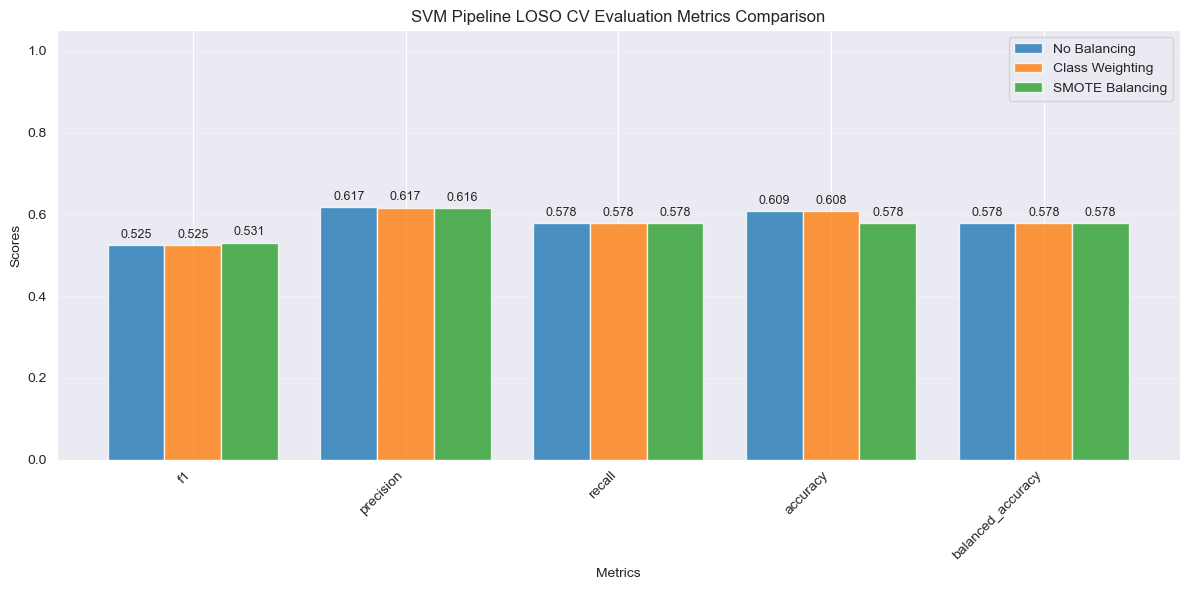

In [92]:
# Plot Bar Chart to compare all approaches
svm_results = {
    'No Balancing': svm_pipeline_no_balancing,
    'Class Weighting': svm_pipeline_class_weighted,
    'SMOTE Balancing': svm_pipeline_smote
}

plot_barchart_model_metrics(svm_results, "SVM Pipeline LOSO CV Evaluation Metrics Comparison")

On the above bar charts, it shows that applying SMOTE balancing slightly improved the F1-score (from 0.525 to 0.531) but reduced overall accuracy (from 0.609 to 0.578). This indicates that SMOTE helped the model better detect minority emotional states, such as amusement. However, this came at the cost of more misclassifications in the dominant classes, slightly reducing total accuracy.. Overall using the SMOTE balancing has a minor improvement in models emotion detection and therefore is not used further in the final trained SVM model.

### 4.3 Optimising Hyper Parameters for the SVM Model

Hyperparmeter tuning was peformed to improve the SVM model performance. During the hyperparameter tuning, the existing LOSO cross-validation pipeline was used to validate the performance of the trained model for the specific hyperparameter combination chosen.

In this case, the 'rbf' radial basis function kernel was kept the same, whilst the following two hyperparameters were varied:

- **C** - Regularisation Strength Parameter (10, 1.0, 0.1)
- **Ɣ** - Gamma - The span of the RBF function ('auto', 'scale')

These parameters were chosen specifically to balance the predictive performance whilst minimising the potentiual for overfitting the model to the training dataset.

In [94]:
def svm_tuning(X_train, y_train, train_subjects, C_values, gamma_values, use_loso=False):
    best_accuracy = 0

    best_params = None
    best_model = None
    results = []

    print("Testing SVM hyperparameters...")
    print("=" * 50)

    start_time = time.time()

    for C in C_values:
        for gamma in gamma_values:
            print(f"Testing C={C}, gamma={gamma}")

            model = SVC(C=C, gamma=gamma,
                        kernel='rbf',
                        cache_size=1000,
                        shrinking=False,  # Add shrinking=False for speed
                        class_weight='balanced',
                        probability=False,
                        max_iter=-1,  # Increase max_iter
                        verbose=False,   # Turn off verbose for cleaner output
                        random_state=39)

            metric = svm_loso_cv_pipeline(model, X_train, y_train, train_subjects)

            # Store results
            results.append({'C': C, 'gamma': gamma, 'metrics': metric})

            print(f"  Accuracy: {metric['accuracy']:.4f}")

            # Track best model
            if metric['accuracy'] > best_accuracy:
                best_accuracy = metric['accuracy']
                best_params = {'C': C, 'gamma': gamma, 'metrics': metric}
                best_model = model

    elapsed_time = time.time() - start_time

    print("=" * 50)
    print(f"Hyperparameter tuning completed in {elapsed_time:.2f} seconds")
    print(f"Best hyperparameters: C={best_params['C']}, gamma={best_params['gamma']}")
    print(f"Best accuracy: {best_accuracy:.4f}")

    return best_model, best_params, best_accuracy, results


### 4.3.1 Evaluation of Hyperparameter Tuning

The results for the hyperparameter tuning are shown below

In [95]:
best_svm, best_params, best_accuracy, all_results = svm_tuning(
    X_train_scaled, y_train, train_subjects,
    C_values=[10, 1, 0.1],
    gamma_values=['auto', 'scale']  # auto = 1/ n_features =1/192 = 0.005
)# Display all results in a table format
print("\nDetailed Results:")
print("-" * 40)
print(f"{'C':<6} {'Gamma':<6} {'Accuracy':<10}")
print("-" * 40)
for result in all_results:
    print(f"{result['C']:<6} {result['gamma']:<6} {result['metrics']['accuracy']:<10.4f}")


Testing SVM hyperparameters...
Testing C=10, gamma=auto
Starting SVM LOSO Cross-Validation with 13 subjects
Fold 1: Testing on Subject 2
  Subject 2 Accuracy: 0.6185
Fold 2: Testing on Subject 3
  Subject 3 Accuracy: 0.3277
Fold 3: Testing on Subject 4
  Subject 4 Accuracy: 0.5980
Fold 4: Testing on Subject 5
  Subject 5 Accuracy: 0.5773
Fold 5: Testing on Subject 6
  Subject 6 Accuracy: 0.9255
Fold 6: Testing on Subject 7
  Subject 7 Accuracy: 0.4394
Fold 7: Testing on Subject 8
  Subject 8 Accuracy: 0.3582
Fold 8: Testing on Subject 9
  Subject 9 Accuracy: 0.7154
Fold 9: Testing on Subject 10
  Subject 10 Accuracy: 0.2897
Fold 10: Testing on Subject 11
  Subject 11 Accuracy: 0.6106
Fold 11: Testing on Subject 13
  Subject 13 Accuracy: 0.7438
Fold 12: Testing on Subject 16
  Subject 16 Accuracy: 0.8533
Fold 13: Testing on Subject 17
  Subject 17 Accuracy: 0.8496

SVM LOSO CV Results (Average across 13 subjects):
  Accuracy            : 0.6082
  Balanced Accuracy   : 0.5778
  Precision


### 4.3.2 Summary of Hyperparameter Tuning

Overall, the optimised SVM with `C=1`, `gamma='auto'` was chosen as this obtained the highest accuracy, and having relatively low runtime compared to other parameter choices.

### 4.4 Performance Metrics of Final Trained SVM Model

To gain deeper insight into model behaviour, the classification performance was also examined per emotion class (i.e., baseline, stress, and amusement).

### 4.4.1 Evaluation of SVM Model

This final analysis across the entire training dataset provides the final performance of the SVM classifier.

In [111]:
from sklearn.svm import SVC
best_svm = SVC(C=1, gamma='auto',kernel='rbf',
               cache_size=1000,
               shrinking=False,
               class_weight='balanced',
               probability=False,
               max_iter=-1,
               verbose=False,
               random_state=39)

best_svm.fit(X_train_scaled, y_train)

,C,1
,kernel,'rbf'
,degree,3
,gamma,'auto'
,coef0,0.0
,shrinking,False
,probability,False
,tol,0.001
,cache_size,1000
,class_weight,'balanced'
,verbose,False


The performance of the trained model is presented below:


Best SVM Test Set Performance:

Optimised SVM - Test Set Metrics:
------------------------------
Accuracy : 0.8016
Balanced Accuracy: 0.7817
Precision: 0.7631
Recall   : 0.7817
F1-Score : 0.7565
------------------------------


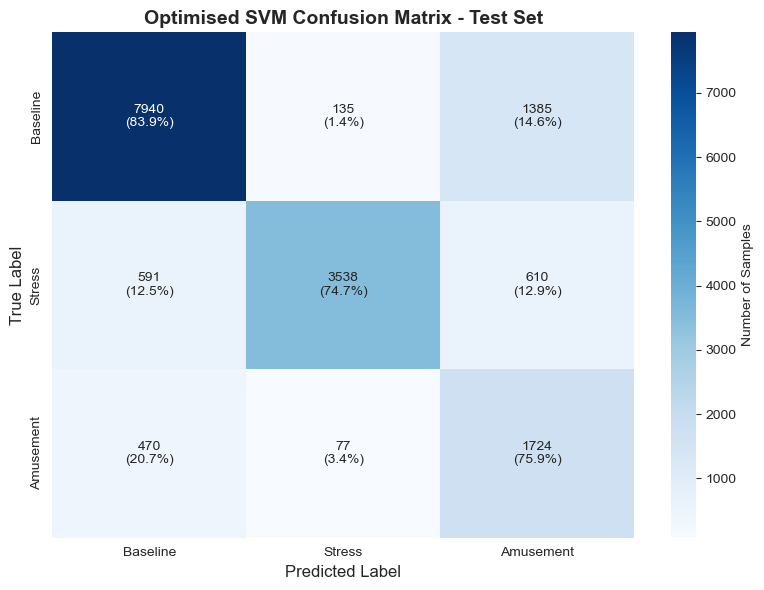

In [112]:
# Calculate final metrics with best model
y_pred_best = best_svm.predict(X_test_scaled)
final_metrics = calculate_metrics(y_test, y_pred_best, zero_division=0)

print("\nBest SVM Test Set Performance:")
print_metrics(final_metrics, "Optimised SVM - Test Set")

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_best,
                     "Optimised SVM Confusion Matrix - Test Set",
                     class_names=['Baseline', 'Stress', 'Amusement'])

On the above optimised SVM confusion matrix for the three emotional classes:

- **Baseline** (1),
- **Stress** (2)
- **Amusement** (3).

The diagonal values (7940, 3538, 1724) represent correctly classified samples, while off-diagonal entries show misclassifications. The model achieved its highest performance for the baseline condition, correctly classifying approximately 84% accuracy for this class. Only 135 samples (1.4%) were misclassified as stress, and 1365 (14.6%) misclassified as amusement.

For the stress class,  74.7 % of samples were correctly identified , while 591 (12.5%) were confused with baseline and 610 (13%) with amusement. This suggests a moderate overlap between stress and non-stress physiological responses.

The Amusement class achieved 76% accuracy. However, 470 samples (20.7%) were misclassified as Baseline and 77 (3.4%) as Stress. This indicating that amusement and baseline  may share similar physiological characteristics (for example low EDA and stable heart rate). Also it may be positive emotions are harder to distinguish from baseline.

### 4.3.2 Evaluate SVM with per-class Metrics

The final SVM model was evaluated using per-class metrics to measure its performance with reference to the overall class imbalance in the training dataset.

In [141]:
from sklearn.metrics import classification_report

def per_class_analysis(y_true, y_pred, class_names=['Baseline', 'Stress', 'Amusement']):
    """ Analyse per-class performance metrics for the optimized SVM model. """

    # Get detailed classification report
    report = classification_report(y_true, y_pred,
                                 target_names=class_names,
                                 output_dict=True,
                                 zero_division=0)

    # Create per-class metrics dataframe
    per_class_df = pd.DataFrame({
        'Class': class_names,
        'Precision': [report[class_name]['precision'] for class_name in class_names],

        'Recall': [report[class_name]['recall'] for class_name in class_names],
        'F1-Score': [report[class_name]['f1-score'] for class_name in class_names],
        'Support': [int(report[class_name]['support']) for class_name in class_names]
    })

    return per_class_df, report

In [142]:
# Analyse per-class performance for optimised SVM
per_class_metrics, detailed_report = per_class_analysis(y_test, y_pred_best)

# Display results table
print("Per-Class Performance Analysis - Optimised SVM")
print("=" * 60)
print(per_class_metrics.round(4))

# Calculate per-class accuracy from confusion matrix
print(cm)
cm = confusion_matrix(y_test, y_pred_best)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Add accuracy to the dataframe
per_class_metrics['Accuracy'] = class_accuracy

print(f"\nClass-wise Accuracy:")
print("-" * 30)
for i, class_name in enumerate(['Baseline', 'Stress', 'Amusement']):
    print(f"{class_name:<12}: {class_accuracy[i]:.4f}")

Per-Class Performance Analysis - Optimised SVM
       Class  Precision  Recall  F1-Score  Support
0   Baseline     0.8821  0.8393    0.8602     9460
1     Stress     0.9435  0.7466    0.8335     4739
2  Amusement     0.4636  0.7591    0.5756     2271
[[7940  135 1385]
 [ 591 3538  610]
 [ 470   77 1724]]

Class-wise Accuracy:
------------------------------
Baseline    : 0.8393
Stress      : 0.7466
Amusement   : 0.7591


As baseline has more samples (9460) compared to stress (4739) and amusement (2271), the model achieved the highest accuracy (84%) for baseline. As this is an imbalanced dataset, the model may be biased towards predicting the majority class more accurately. Also F1 scores show  the model balanced precision and recall for each class. The F1 score for baseline (0.86) is higher than stress (0.83) and amusement (0.57), indicating better overall performance on the majority class. However, the SVM model struggles to distinguish less represantative classes, especially amusement.

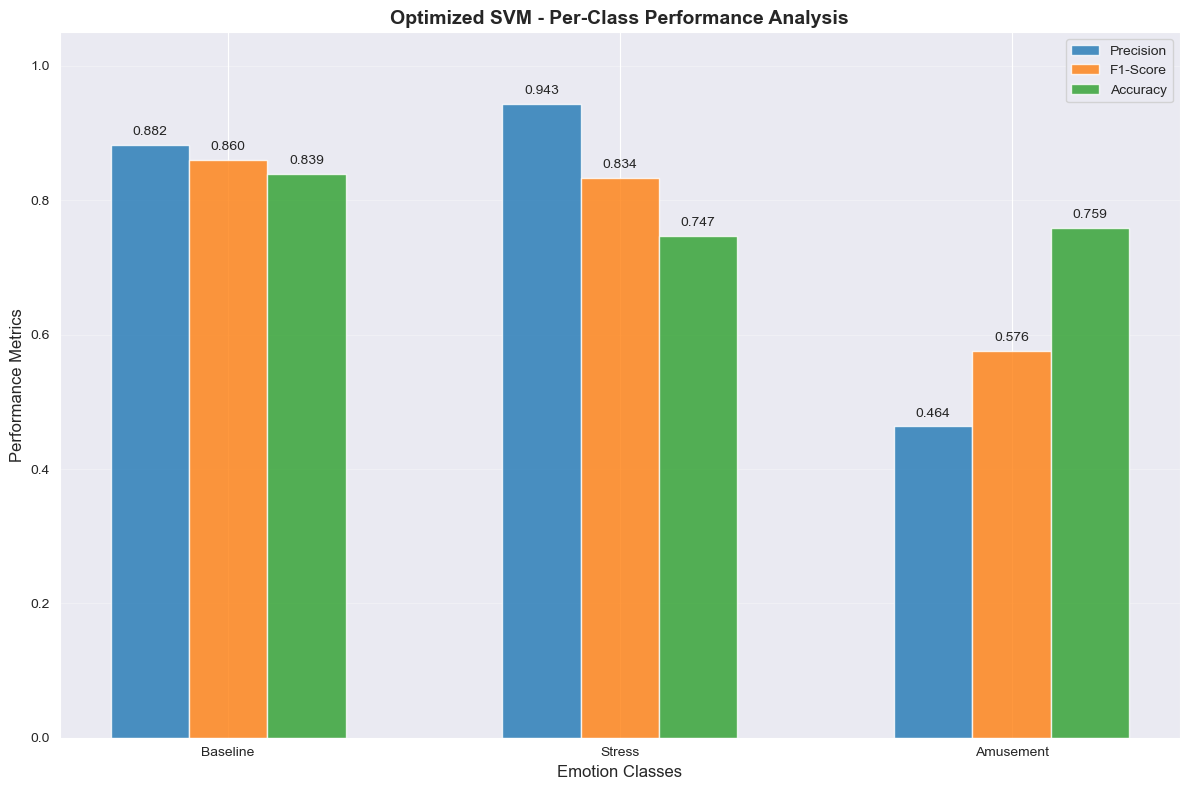

In [144]:
def plot_bar_per_class_metrics(per_class_df, title="Per-Class Performance Analysis"):
    """ Plot per-class performance metrics as grouped bar chart """
    metrics = ['Precision', 'F1-Score', 'Accuracy']
    x = np.arange(len(per_class_df['Class']))
    width = 0.2

    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot bars for each metric
    for i, metric in enumerate(metrics):
        offset = (i - len(metrics)/2 + 0.5) * width
        bars = ax.bar(x + offset, per_class_df[metric], width,
                     label=metric, alpha=0.8)

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{height:.3f}', ha='center', va='bottom', fontsize=10)

    ax.set_xlabel('Emotion Classes', fontsize=12)
    ax.set_ylabel('Performance Metrics', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(per_class_df['Class'])
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, 1.05)

    plt.tight_layout()
    plt.show()

# Plot the per-class metrics
plot_bar_per_class_metrics(per_class_metrics, "Optimized SVM - Per-Class Performance Analysis")

On the above bar charts shows that on the baselione class the SVM model achieves high scores across all metrics (precision = 0.88, F1 = 0.86, accuracy = 0.84) as expected due to  being the dominant class. So the model is very reliable at identifying baseline states, with few false positives or false negatives.

For the stress class, the model performs best here in terms of precision (0.94), but the F1-score and accuracy are slightly lower.
This suggests that while the model is highly precise (few false alarms), it may miss some true stress samples, leading to a slight drop in recall.

Finally for the amusement class, the lowest performance is observed in here. The model’s accuracy for amusement appears high, mainly because it performs well on the much larger baseline class. However, its low precision shows that when it does try to predict amusement, it is often unreliable, possibly because specific patterns for amusement are difficult to classify due to overlapping physiological signals or being a minority class.

 Overall, the tuned SVM model demonstrated strong performance in distinguishing between emotional states in the WESAD dataset. It achieved high precision and F1-scores for baseline and stress classes, showing that it can effectively capture clear and consistent physiological patterns in these states. However, Aausement remains the hardest state to classify accurately. This class likely needs more data, better feature separation, maybe a different kernel and class weight adjustment.

## 5. Model 2: Feedforward Neural Network

## 5.1 Motivation for using FNN Classifier Model

A feed-forward neural network (FNN) was selected as the neural network classifier. Since the project uses statistical and frequency-domain features, an MLP is well suited to learn between features while remaining computationally efficient and interpretable. More advanced sequenctial models (1D-CNN or LSTM neural network) could be considered for follow up analysis because they can capture dynamics in time-series data. However, they require additional preprocessed structures and are more complicated to implement. Neural network models provide act as online-learning ML technique and could be further trained to improve the overall classifier performance. Also this is the most flexible technique that can be adapt its structure to improve its performance.

## 5.2 Structure of the FNN Network and Initial Hyperparameter Set

In this case study, simple FNN structure is created with a small number ($< 3$), fully connected hidden layers, which uses a 'relu' (rectified linear-unit) as the activation function. These activtion functions are commonly used in neural networks to prevent the vanishing gradient phenonmena and improve computional performance during training due to its simplified derivation.

Batch normalisation is used across each layer to normlise the variance across each batch processed to improve stability, whilst dropout was added as regularisation technique to deactivate neurons to prevent overfitting and improve generalisation of learn features. Finally, a softmax output is used along with the `sparse_categorical_crossentropy` to provide the multi-class prediction.

In [93]:
import tensorflow as tf

tf.config.threading.set_inter_op_parallelism_threads(8)

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

# Set random seeds for reproducibility
tf.random.set_seed(39)
np.random.seed(39)

def create_fnn_model(input_dim, num_classes, hidden_layers=[128, 64, 32], dropout_rate=0.3):
    """ Create a feedforward neural network model """
    model = Sequential()

    # Input layer
    model.add(Input(shape=(input_dim,)))

    # First hidden layer
    model.add(Dense(hidden_layers[0], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Hidden layers
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Number of features
num_features = X_train_scaled.shape[1]
print(f"Number of features: {num_features}")

# Display an example model summary
model = create_fnn_model(num_features, 3, hidden_layers=[128, 64, 32], dropout_rate=0.3)
model.summary()

Number of features: 192


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,035 (140.76 KB)

 Trainable params: 35,587 (139.01 KB)

 Non-trainable params: 448 (1.75 KB)

  #### Create the FNN LOSO Cross-Validation Pipeline

The pipeline is used for performing training of the neural network classifier with fine tuning of the hyperparameters incorporating the LOSO CV techniques. The pipeline can adjust the number and size of the hidden layers, alongside the batch size, in terms of hyperparameter optimisation.

In [94]:
def fnn_cv_pipeline(X, y, subjects, class_weights=None, hidden_layers=None, batch_size=32, epochs=100):
    """
    FNN cross-validation pipeline with Leave-One-Subject-Out (LOSO) cross-validation.
    """
    # Initialise LOSO cross-validation
    logo = LeaveOneGroupOut()

    # Convert labels to 0-based for neural network
    y_encoded = y - 1
    num_classes = len(np.unique(y_encoded))

    # Storage for fold results
    fold_metrics = []
    fold_histories = []

    print(f"Starting LOSO Cross-Validation with {len(np.unique(subjects))} subjects")

    # LOSO cross-validation loop
    for fold, (train_idx, val_idx) in enumerate(logo.split(X, y_encoded, subjects)):
        test_subject = subjects.iloc[val_idx[0]] if hasattr(subjects, 'iloc') else subjects[val_idx[0]]
        print(f"\nFold {fold + 1}: Testing on Subject {test_subject}")

        # Split data for this fold
        if hasattr(X, 'iloc'):
            X_train_fold = X.iloc[train_idx]
            X_val_fold = X.iloc[val_idx]
        else:
            X_train_fold = X[train_idx]
            X_val_fold = X[val_idx]

        if hasattr(y_encoded, 'iloc'):
            y_train_fold = y_encoded.iloc[train_idx]
            y_val_fold = y_encoded.iloc[val_idx]
        else:
            y_train_fold = y_encoded[train_idx]
            y_val_fold = y_encoded[val_idx]

        # Create and train model for this fold
        model = create_fnn_model(X_train_fold.shape[1], num_classes, hidden_layers=hidden_layers)

        # Callbacks to stop the training if the loss becomes low
        callbacks = [
            EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=0),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-7, verbose=0)
        ]

        # Train model
        history = model.fit(
            X_train_fold, y_train_fold,
            validation_data=(X_val_fold, y_val_fold),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=callbacks,
            class_weight=class_weights,
            verbose=0
        )

        # Predictions
        y_pred_prob = model.predict(X_val_fold, verbose=0)
        y_pred = np.argmax(y_pred_prob, axis=1)

        # Calculate  metrics for this fold
        fold_metric = calculate_metrics(y_val_fold, y_pred, zero_division=0)
        fold_metrics.append(fold_metric)
        fold_histories.append(history)

        # Print comprehensive fold results
        print(f"  Subject {test_subject} Results:")
        print(f"    F1: {fold_metric['f1']:.4f}")
        print(f"    Precision: {fold_metric['precision']:.4f}")
        print(f"    Recall: {fold_metric['recall']:.4f}")
        print(f"    Accuracy: {fold_metric['accuracy']:.4f}")
        print(f"    Balanced Accuracy: {fold_metric['balanced_accuracy']:.4f}")

        # Clean up memory
        del model
        tf.keras.backend.clear_session()

    # Average metrics across all folds
    avg_metrics = {}
    for metric in fold_metrics[0].keys():
        avg_metrics[metric] = np.mean([fold[metric] for fold in fold_metrics])

    print(f"\nLOSO CV Results (Average across {len(fold_metrics)} subjects):")
    print("=" * 60)
    for metric, value in avg_metrics.items():
        print(f"  {metric.replace('_', ' ').title():<20}: {value:.4f}")
    print("=" * 60)

    return avg_metrics, fold_metrics, fold_histories

#### Train and Evaluate FNN with Different Balancing Strategies

**Training FNN Model using LOSO CV Pipeline with Unbalanced Data**

In [33]:
# Extract subject information from training data
train_subjects = df_train['subject']  # Subject IDs for training samples

# Test the FNN with LOSO cross-validation - No balancing
print("Testing FNN with LOSO Cross-Validation - No Balancing...")
fnn_loso_no_balance, fold_results_no_balance, fold_histories = fnn_cv_pipeline(
    X_train_scaled, y_train, train_subjects, epochs=20, hidden_layers=[128,64, 32]
)
print_metrics(fnn_loso_no_balance, "FNN LOSO CV - No Balancing")

Testing FNN with LOSO Cross-Validation - No Balancing...
Starting LOSO Cross-Validation with 13 subjects

Fold 1: Testing on Subject 2
  Subject 2 Results:
    F1: 0.2716
    Precision: 0.3400
    Recall: 0.3244
    Accuracy: 0.5684
    Balanced Accuracy: 0.3244

Fold 2: Testing on Subject 3
  Subject 3 Results:
    F1: 0.4375
    Precision: 0.4958
    Recall: 0.4290
    Accuracy: 0.6309
    Balanced Accuracy: 0.4290

Fold 3: Testing on Subject 4
  Subject 4 Results:
    F1: 0.2740
    Precision: 0.5708
    Recall: 0.3448
    Accuracy: 0.6008
    Balanced Accuracy: 0.3448

Fold 4: Testing on Subject 5
  Subject 5 Results:
    F1: 0.6018
    Precision: 0.7223
    Recall: 0.7390
    Accuracy: 0.5586
    Balanced Accuracy: 0.7390

Fold 5: Testing on Subject 6
  Subject 6 Results:
    F1: 0.8178
    Precision: 0.8744
    Recall: 0.7929
    Accuracy: 0.9204
    Balanced Accuracy: 0.7929

Fold 6: Testing on Subject 7
  Subject 7 Results:
    F1: 0.5376
    Precision: 0.6220
    Recall: 0.725

**Training FNN Model using LOSO CV Pipeline with Class Weighting**

In [37]:
def calculate_class_weights(y):
    """Calculate class weights for imbalanced dataset."""
    classes = np.unique(y)
    class_weights = compute_class_weight('balanced', classes=classes, y=y)
    return dict(zip(classes, class_weights))

# Test with class weighting
print("\nTesting FNN with LOSO Cross-Validation - Class Weighted...")

class_weights_dict = calculate_class_weights(y_train - 1)  # Convert to 0-based for neural network

fnn_loso_weighted, fold_results_weighted, fold_histories = fnn_cv_pipeline(
    X_train_scaled, y_train, train_subjects, class_weights=class_weights_dict, epochs=20, hidden_layers=[128,64, 32]
)

print_metrics(fnn_loso_weighted, "FNN LOSO CV - Class Weighted")


Testing FNN with LOSO Cross-Validation - Class Weighted...
Starting LOSO Cross-Validation with 13 subjects

Fold 1: Testing on Subject 2
  Subject 2 Results:
    F1: 0.5176
    Precision: 0.5534
    Recall: 0.5367
    Accuracy: 0.6660
    Balanced Accuracy: 0.5367

Fold 2: Testing on Subject 3
  Subject 3 Results:
    F1: 0.4485
    Precision: 0.5256
    Recall: 0.4302
    Accuracy: 0.6250
    Balanced Accuracy: 0.4302

Fold 3: Testing on Subject 4
  Subject 4 Results:
    F1: 0.3150
    Precision: 0.5813
    Recall: 0.3630
    Accuracy: 0.6114
    Balanced Accuracy: 0.3630

Fold 4: Testing on Subject 5
  Subject 5 Results:
    F1: 0.5925
    Precision: 0.7229
    Recall: 0.7410
    Accuracy: 0.5480
    Balanced Accuracy: 0.7410

Fold 5: Testing on Subject 6
  Subject 6 Results:
    F1: 0.8880
    Precision: 0.9022
    Recall: 0.8755
    Accuracy: 0.9358
    Balanced Accuracy: 0.8755

Fold 6: Testing on Subject 7
  Subject 7 Results:
    F1: 0.4427
    Precision: 0.6279
    Recall: 0.

**Training FNN Model using LOSO CV Pipeline with SMOTE Balanced Data**

In [38]:
print("\nTesting FNN with LOSO Cross-Validation - SMOTE...")

fnn_loso_smote, fold_results_smote, fold_histories = fnn_cv_pipeline(
    X_train_smote, y_train_smote, subjects_smote, epochs=20, hidden_layers=[128,64, 32]
)
print_metrics(fnn_loso_smote, "FNN LOSO CV - SMOTE")



Testing FNN with LOSO Cross-Validation - SMOTE...
Starting LOSO Cross-Validation with 13 subjects

Fold 1: Testing on Subject 2
  Subject 2 Results:
    F1: 0.5051
    Precision: 0.6071
    Recall: 0.5286
    Accuracy: 0.5286
    Balanced Accuracy: 0.5286

Fold 2: Testing on Subject 3
  Subject 3 Results:
    F1: 0.3659
    Precision: 0.4052
    Recall: 0.4322
    Accuracy: 0.4322
    Balanced Accuracy: 0.4322

Fold 3: Testing on Subject 4
  Subject 4 Results:
    F1: 0.2853
    Precision: 0.5341
    Recall: 0.3914
    Accuracy: 0.3914
    Balanced Accuracy: 0.3914

Fold 4: Testing on Subject 5
  Subject 5 Results:
    F1: 0.6456
    Precision: 0.8272
    Recall: 0.7080
    Accuracy: 0.7080
    Balanced Accuracy: 0.7080

Fold 5: Testing on Subject 6
  Subject 6 Results:
    F1: 0.6775
    Precision: 0.8340
    Recall: 0.7253
    Accuracy: 0.7253
    Balanced Accuracy: 0.7253

Fold 6: Testing on Subject 7
  Subject 7 Results:
    F1: 0.5469
    Precision: 0.7963
    Recall: 0.6694
    

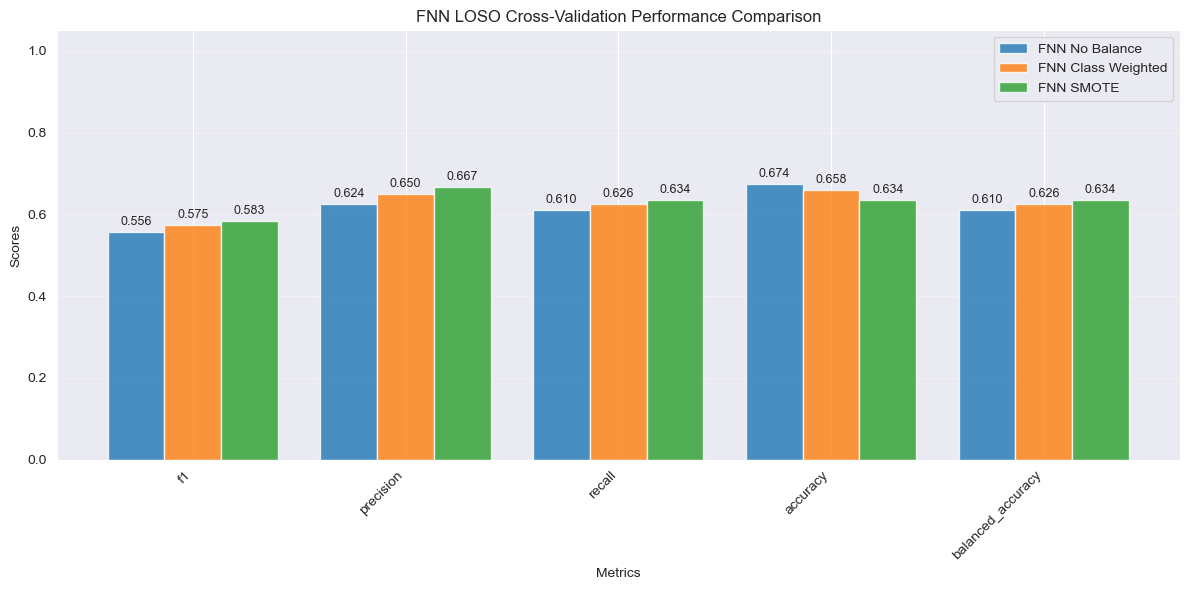

In [40]:
# Compare all approaches
fnn_loso_comparison = {
    'FNN No Balance': fnn_loso_no_balance,
    'FNN Class Weighted': fnn_loso_weighted,
    'FNN SMOTE': fnn_loso_smote
}

plot_barchart_model_metrics(fnn_loso_comparison, title="FNN LOSO Cross-Validation Performance Comparison")

On the above bar chart no balanced  model shows poorer results except the accuracy. It maybe because the WESAD dataset is imbalanced, with the Baseline class containing many more samples than Stress or Amusement. Since accuracy counts all correct predictions equally, the model performs well simply by correctly predicting the majority Baseline class most of the time. However, this comes at the cost of poorer recognition of the minority classes, meaning the high accuracy does not fully reflect balanced model performance across all emotional states.

Furthermore when comparing the balanced models, both SMOTE and Class Weighted approaches improved the FNN’s ability to recognize minority emotional states compared to the unbalanced model. SMOTE achieved slightly higher  precision and recall, showing better sensitivity to underrepresented classes.

## 5.3 Hyperparameter tuning of the FNN Model

Hyperparamter tuning of FNN model was done to consider the performance of the trained model, whilst preventing overfitting and minimising the effect of class imblance present amongst the datset. The following hyperparamters were chosen to be varied:

- Hidden Layer Number and Size
- Batch Size


In [41]:
import time

def fnn_tuning(X_train, y_train, train_subjects, hidden_layer_set, batch_size_set, epochs=80):

    best_accuracy = 0
    best_params = None
    best_model = None
    results = []

    print("Testing FNN hyperparameters...")
    print("=" * 50)

    start_time = time.time()

    for hidden_layers in hidden_layer_set:
        for batch_size in batch_size_set:
            print(f"  Hidden Layers: {hidden_layers}, Batch Size: {batch_size}")

            fnn_loso_iter, fold_results_iter, fold_histories = fnn_cv_pipeline(
                X_train, y_train, train_subjects,
                epochs=2, hidden_layers=hidden_layers, batch_size=batch_size
            )

            # Store results
            results.append({'hidden_layers': hidden_layers, 'batch_size': batch_size, 'metrics': fnn_loso_iter})

            accuracy = fnn_loso_iter['accuracy']
            print(f"  Accuracy: {accuracy:.4f}")

            # Track best model
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = results[-1]

    elapsed_time = time.time() - start_time

    print("=" * 50)
    print(f"Hyperparameter tuning completed in {elapsed_time:.2f} seconds")
    print(f"Best hyperparameters: {best_params}")
    print(f"Best accuracy: {best_accuracy:.4f}")

    return best_params, best_accuracy, results

Ideally, other parameters the structure of the hidden layers can impact the predictive performance of the classifier, especially with increased size and number of connections but also increase the chances of over-fitting. By use of the existing LOSO cross-validation pipeline, this can capture any hyperparameters that may result in overfitting within the existing training dataset.

In [42]:
best_params, best_accuracy, results = fnn_tuning(X_train, y_train, train_subjects,
                                                 hidden_layer_set = [[128, 64, 32],
                                                                     [64, 32],
                                                                     [256, 128, 64]],
                                                 batch_size_set = [32, 64, 128],
                                                 epochs=20)


Testing FNN hyperparameters...
  Hidden Layers: [128, 64, 32], Batch Size: 32
Starting LOSO Cross-Validation with 13 subjects

Fold 1: Testing on Subject 2
  Subject 2 Results:
    F1: 0.2870
    Precision: 0.4225
    Recall: 0.3376
    Accuracy: 0.5816
    Balanced Accuracy: 0.3376

Fold 2: Testing on Subject 3
  Subject 3 Results:
    F1: 0.5024
    Precision: 0.4949
    Recall: 0.5213
    Accuracy: 0.7397
    Balanced Accuracy: 0.5213

Fold 3: Testing on Subject 4
  Subject 4 Results:
    F1: 0.2593
    Precision: 0.5026
    Recall: 0.3386
    Accuracy: 0.5958
    Balanced Accuracy: 0.3386

Fold 4: Testing on Subject 5
  Subject 5 Results:
    F1: 0.8043
    Precision: 0.8985
    Recall: 0.7751
    Accuracy: 0.8873
    Balanced Accuracy: 0.7751

Fold 5: Testing on Subject 6
  Subject 6 Results:
    F1: 0.8706
    Precision: 0.8497
    Recall: 0.9050
    Accuracy: 0.9183
    Balanced Accuracy: 0.9050

Fold 6: Testing on Subject 7
  Subject 7 Results:
    F1: 0.6204
    Precision: 0.6

### 5.3.2 Summary of Hyperparamter Tuning of the FNN Model

The best  model was  with hidden layer structure of  `[256, 128, 64]` and batch size of `32`. This achieved an accuracy of 0.6497 during LOSO cross-validation.

## 5.4 Performance of the Final FNN Model

Using the tuned FNN model, the final FNN model was trained and assessed on the final test dataset. Firstly, the models were trianed using both the class-weighted and SMOTE balanced approach to identify if a balanced dataset impacted the predictive performance of the FNN classified. During the training, history plot is shown revelaing the  losses and accuracy during the FNN training phase.

In [97]:
# Plot training history
def plot_training_history(history, title="FNN Training History"):
    """Plot training and validation loss/accuracy curves."""

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_yscale('log')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.suptitle(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

The final FNN model using the tuned hyperparameters was then trained using the entire training dataset.

In [98]:
# Final Paramters
hidden_layers_final = [256,128,64]
batch_size_final = 32
epochs_final = 100

X_train_final = X_train_scaled
y_train_final = y_train-1.0

# Create and train model
num_classes = len(np.unique(y_train_final))
input_dim = X_train_final.shape[1]
final_model = create_fnn_model(input_dim, num_classes, hidden_layers=hidden_layers_final, dropout_rate=0.3)

# Set up callbacks for finishing if training converges
callbacks = [
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-6)
]

# Train the FNN model
history = final_model.fit(
    X_train_final, y_train_final,
    validation_split=0.2,
    epochs=epochs_final,
    batch_size=batch_size_final,
    callbacks=callbacks,
    verbose=1
)

# Evaluate on test set
y_pred_prob = final_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nBest NN Test Set Performance:")
final_test_metrics = calculate_metrics(y_test-1, y_pred, zero_division=0)
print_metrics(final_test_metrics, "Optimised FNN- Test Set")

Epoch 1/100
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9677 - loss: 0.0899 - val_accuracy: 0.6263 - val_loss: 1.8026 - learning_rate: 0.0010
Epoch 2/100
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9935 - loss: 0.0205 - val_accuracy: 0.6087 - val_loss: 2.2170 - learning_rate: 0.0010
Epoch 3/100
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.5893 - val_loss: 2.4283 - learning_rate: 0.0010
Epoch 4/100
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9971 - loss: 0.0101 - val_accuracy: 0.6669 - val_loss: 2.0317 - learning_rate: 0.0010
Epoch 5/100
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9975 - loss: 0.0077 - val_accuracy: 0.6518 - val_loss: 2.1748 - learning_rate: 0.0010
Epoch 6/100
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9980 - loss: 0.0062 - val_accuracy: 0.6092 - val_loss: 2.7783 - learning_rate: 0.0010
Epoch 7/100
2609/2609 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9

Also the final model was trained on the balanced dataset obtained using the SMOTE technique:

In [101]:
#t est the best model with balanced smote data
y_train_smote_final = y_train_smote - 1.0
final_model_smote = create_fnn_model(input_dim, num_classes, hidden_layers=hidden_layers_final, dropout_rate=0.3)

# Train model
history_smote = final_model_smote.fit(
    X_train_smote, y_train_smote_final,
    validation_split=0.2,
    epochs=epochs_final,
    batch_size=batch_size_final,
    callbacks=callbacks,
    verbose=0
)

# Evaluate on test set
y_pred_prob_smote = final_model_smote.predict(X_test_scaled)
y_pred_smote = np.argmax(y_pred_prob_smote, axis=1)

print("\nBest NN Test Set Performance with SMOTE:")
final_test_metrics_smote = calculate_metrics(y_test-1, y_pred_smote, zero_division=0)
print_metrics(final_test_metrics_smote, "Optimised FNN with SMOTE - Test Set")

515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step

Best NN Test Set Performance with SMOTE:

Optimised FNN with SMOTE - Test Set Metrics:
------------------------------
Accuracy : 0.8081
Balanced Accuracy: 0.7338
Precision: 0.7936
Recall   : 0.7338
F1-Score : 0.7484
------------------------------


### 5.4.1 Training History of the Final FNN Models

The training history plot below shows the model convergence for both the final class-weighted and SMOTE balanced model.

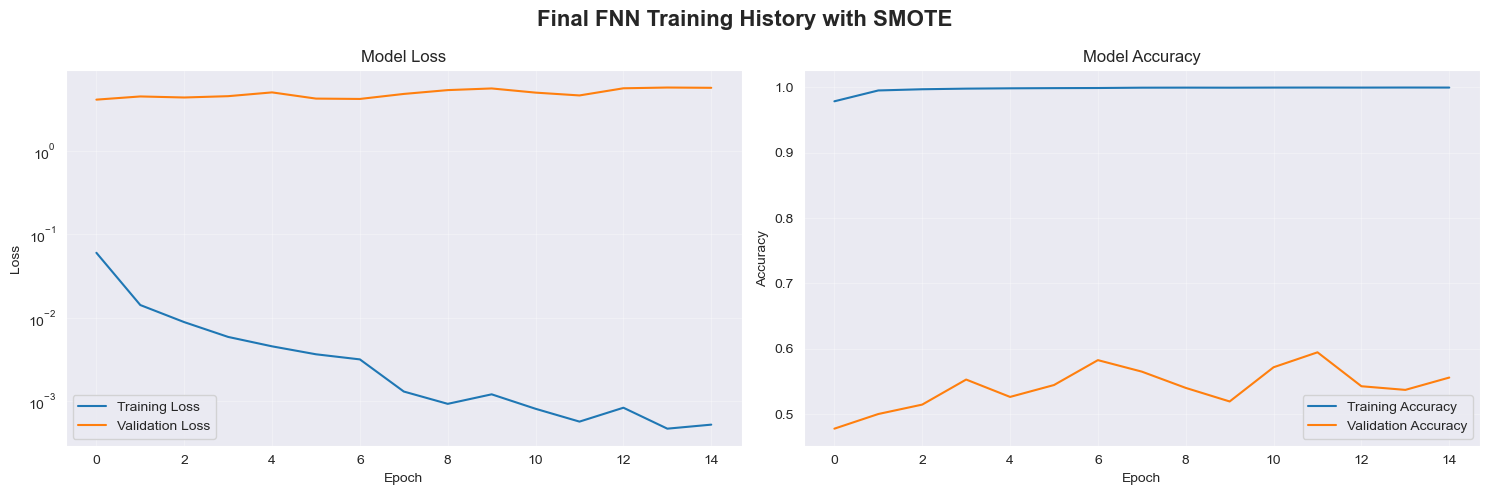

In [102]:
plot_training_history(history_smote, "Final FNN Training History with SMOTE")

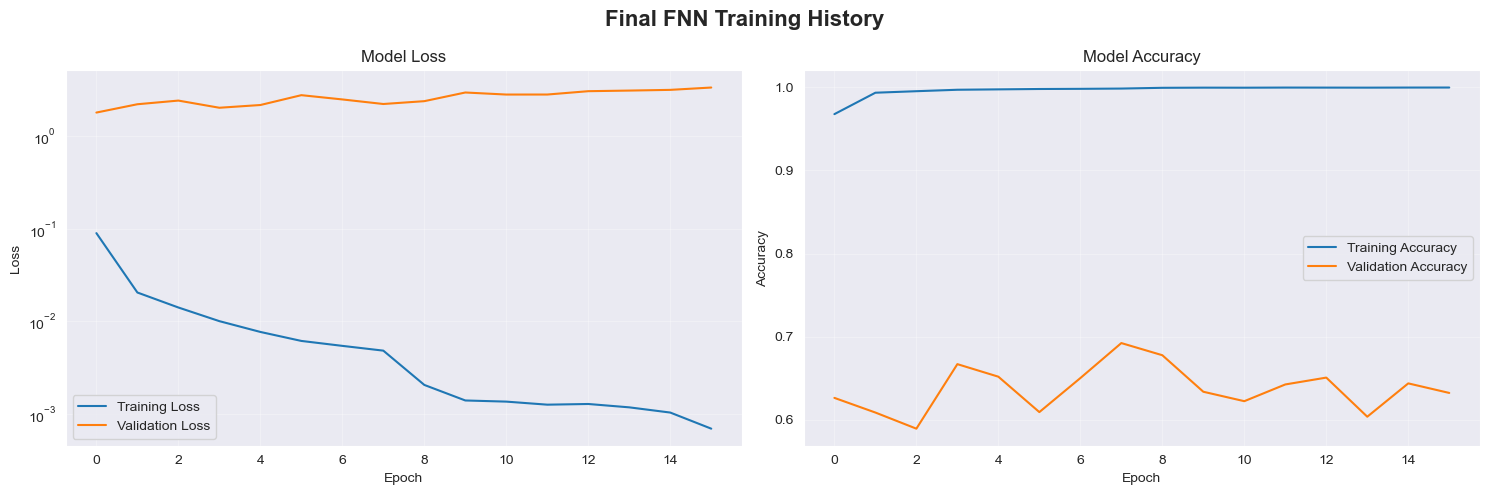

In [100]:
plot_training_history(history, "Final FNN Training History")

It was seen that the overall classifier performance using the class-weighted option was better in terms of accuracy and precision compared to the SMOTE balanced model. However, this was at the expense of a reduced *balanced-accuracy* score. Therefore, it was decided to use the *class-weighted* method going forward for the final model comparison, mainly to reduce the time training and testing the model for this case study.

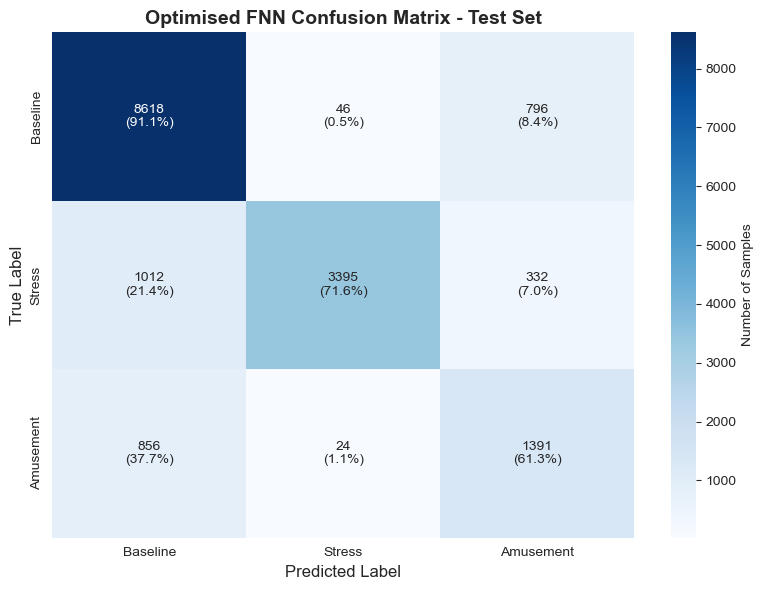

In [103]:
#Plot confusion matrix  for the best FNN model
plot_confusion_matrix(y_test-1, y_pred,  # Note: y_test-1 to match 0-based predictions
                     "Optimised FNN Confusion Matrix - Test Set",
                     class_names=['Baseline', 'Stress', 'Amusement'])

On the above confusion matrix shows that for the Baseline class predicted correctly in 91.1% of cases (8618 samples) and mainly misclassified  as Amusement (8.4%), indicating some overlap between relaxed and positive states.

For the stress class, FNN correctly identified in 71.6% of cases and misclassified as baseline (21.4%), showing the model sometimes confuses neutral and stress states.

Finally for the amusement class the model correctly identified 61.3% of cases, but a large number of cases were misclassified as baseline (37.7%), suggesting difficulty in distinguishing amusement from baseline. Possibly, for some people when relaxed and happy, they show similar patterns such as stable heart rate, lower EDA. Alternatively, as the amusement class was minority clas, when the model trained it learned more dominant class (baseline ) and could not generalise to features associated within the amusement state.

### 5.4.3 Per-Class Performance Metrics for Class-Weighted FNN Model
An analysis of the per-class performance for final tuned FNN was completed.

In [146]:
per_class_metrics_fnn, detailed_report_fnn = per_class_analysis(y_test-1, y_pred)

# Display results table
print("Per-Class Performance Analysis - Optimised FNN")
print("=" * 60)
print(per_class_metrics_fnn.round(4))

# Calculate accuracy of each class from confusion matrix
cm_fnn = confusion_matrix(y_test-1, y_pred)
class_accuracy_fnn = cm_fnn.diagonal() / cm_fnn.sum(axis=1)

# Add accuracy to the dataframe
per_class_metrics_fnn['Accuracy'] = class_accuracy_fnn

print(f"\nClass-wise Accuracy:")
print("-" * 30)
for i, class_name in enumerate(['Baseline', 'Stress', 'Amusement']):
    print(f"{class_name:<12}: {class_accuracy_fnn[i]:.4f}")


Per-Class Performance Analysis - Optimised FNN
       Class  Precision  Recall  F1-Score  Support
0   Baseline     0.8219  0.9110    0.8641     9460
1     Stress     0.9798  0.7164    0.8276     4739
2  Amusement     0.5522  0.6125    0.5808     2271

Class-wise Accuracy:
------------------------------
Baseline    : 0.9110
Stress      : 0.7164
Amusement   : 0.6125


The metrics for each class predictd by the FNN model are shown below

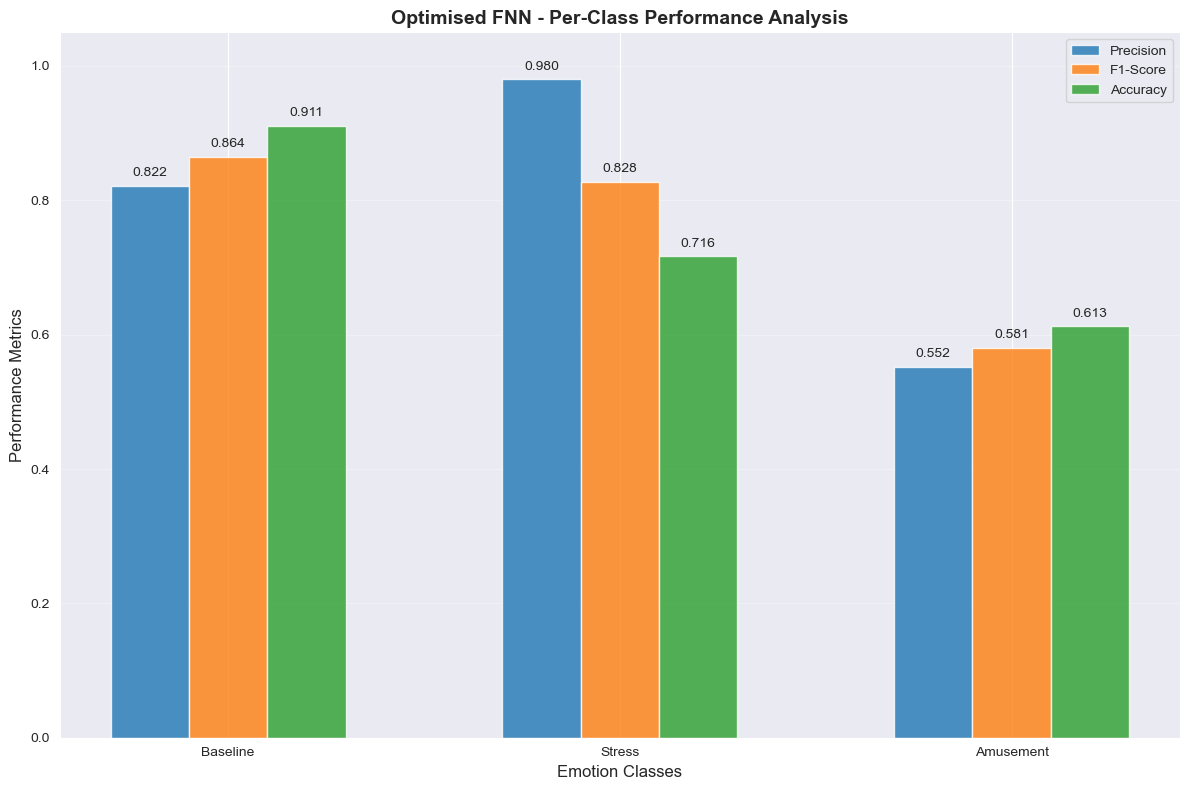

In [147]:
plot_bar_per_class_metrics(per_class_metrics_fnn, "Optimised FNN - Per-Class Performance Analysis")




On the above bar chart, the model performs very well in baseline class, achieving high precision (82%), F1-score (86%), and accuracy (91%).
This shows that baseline states are detected most reliably, likely because this class dominates the dataset and has more consistent physiological patterns.

For the stress class, the model achieved exceptionally high precision (98%), indicating it almost never misclassifies other states as stress. It is perhaps physiological stress signals (like heart rate, skin conductance) are often clearer and stronger than baseline and amusement signals, so the model can identify them confidently. Similar observations were reported by Schmidt et al. when performing binary classification between baseline and stress states only [1]. However, although precision is high, the accuracy is relatively low (72%). This shows that even if the model is very accurate when it classifies as stress, it can still have low overall accuracy if it misses many real stress cases (predicting them as baseline or amusement).

For the amusement class, the FNN model struggles to classify features within the dataset, with modestly lower precision (55%), F1-score (58%), and accuracy (61%). This indicates that amusement is the hardest emotion to classify, likely due to fewer samples and overlapping physiological signals with the baseline condition.

Overall, hyperparameter tuning significantly improved the model’s performance and stability. The optimised FNN achieved higher precision, recall, and balanced accuracy compared to the untuned version, showing that the tuning process helped the model learn more meaningful patterns from the physiological data.

The tuned FFN improved its prediction performance, particularly for the stress class, while maintaining reasonable capability to classify baseline and amusement states. Although some trade-offs remained, such as high precision but lower accuracy for stress, the tuning process led to a more reliable and generalisable model for emotion recognition in the WESAD dataset.

## 6. Comparison of Metrics Performance for Testing

The final section compares the classifier performance between the two models developed on this case study using a variety of techniques. Mainly this includes the per-class performance for classiying the  emotional states (stress and amusement) from the baseline, followed by various plots of the ROC and Precision-Recall Curves.


## 6.1 Comparison with appropriate metrics for testing

A comparison between SVM and FNN performance was compared by looking at the metrics for each class predicted by both models.

In [152]:
def compare_per_class_performance(svm_metrics, fnn_metrics, svm_test_metrics, fnn_test_metrics):
    """Compare per-class performance between SVM and FNN models"""

    # Create comparison dataframe
    comparison_df = pd.DataFrame({
        'Class': ['Baseline', 'Stress', 'Amusement'],
        'SVM_Precision': svm_metrics['Precision'],
        'FNN_Precision': fnn_metrics['Precision'],
        'SVM_Recall': svm_metrics['Recall'],
        'FNN_Recall': fnn_metrics['Recall'],
        'SVM_F1': svm_metrics['F1-Score'],
        'FNN_F1': fnn_metrics['F1-Score'],
        'SVM_Accuracy': svm_metrics['Accuracy'],
        'FNN_Accuracy': fnn_metrics['Accuracy']
    })

    # Include the macro averages
    macro_row = pd.DataFrame({
        'Class': ['Macro Average'],
        'SVM_Precision': [svm_test_metrics['precision']],
        'FNN_Precision': [fnn_test_metrics['precision']],
        'SVM_Recall': [svm_test_metrics['recall']],
        'FNN_Recall': [fnn_test_metrics['recall']],
        'SVM_F1': [svm_test_metrics['f1']],
        'FNN_F1': [fnn_test_metrics['f1']],
        'SVM_Accuracy': [svm_test_metrics['accuracy']],
        'FNN_Accuracy': [fnn_test_metrics['accuracy']]
    })

    comparison_df = pd.concat([comparison_df, macro_row], ignore_index=True)

    print("SVM vs FNN Per-Class Performance Comparison")
    print("=" * 80)
    print(comparison_df.round(4))

    return comparison_df

def plot_svm_fnn_comparison(svm_metrics, fnn_metrics):
    """Plot side-by-side comparison of SVM and FNN per-class performance."""

    metrics = ['Precision', 'F1-Score', 'Accuracy']
    classes = ['Baseline', 'Stress', 'Amusement']
    x = np.arange(len(classes))
    width = 0.35

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes = axes.ravel()

    for i, metric in enumerate(metrics):
        svm_values = svm_metrics[metric].values
        fnn_values = fnn_metrics[metric].values

        bars1 = axes[i].bar(x - width/2, svm_values, width, label='SVM', alpha=0.8)
        bars2 = axes[i].bar(x + width/2, fnn_values, width, label='FNN', alpha=0.8)

        # Add value labels
        for bar in bars1:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=9)

        for bar in bars2:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom', fontsize=9)

        axes[i].set_xlabel('Emotion Classes')
        axes[i].set_ylabel(metric)
        axes[i].set_title(f'{metric} Comparison')
        axes[i].set_xticks(x)
        axes[i].set_xticklabels(classes)
        axes[i].legend()
        axes[i].grid(axis='y', alpha=0.3)
        axes[i].set_ylim(0, 1.05)

    plt.suptitle('SVM vs FNN Per-Class Performance Comparison', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def plot_macro_average_comparison(svm_metrics, fnn_metrics, title="SVM vs FNN - Macro Average Performance"):
    """ Plot macro average comparison between SVM and FNN models.  """
    # Define metrics to compare
    metrics = ['precision', 'recall', 'f1', 'accuracy', 'balanced_accuracy']

    # Extract values for both models
    svm_values = [svm_metrics[metric] for metric in metrics]
    fnn_values = [fnn_metrics[metric] for metric in metrics]

    # Create the comparison plot
    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 5))

    # Create bars
    bars1 = ax.bar(x - width/2, svm_values, width, label='SVM',
                   color='red', alpha=0.7, edgecolor='darkred')
    bars2 = ax.bar(x + width/2, fnn_values, width, label='FNN',
                   color='blue', alpha=0.7, edgecolor='darkblue')

    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    ax.set_xlabel('Performance Metrics', fontsize=12)
    ax.set_ylabel('Scores', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels([m.replace('_', ' ').title() for m in metrics], rotation=45, ha='right')
    ax.legend(fontsize=12)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, 1.05)

    plt.tight_layout()
    plt.show()
    return svm_values, fnn_values

A comparison between the various metrics  models are shown below:

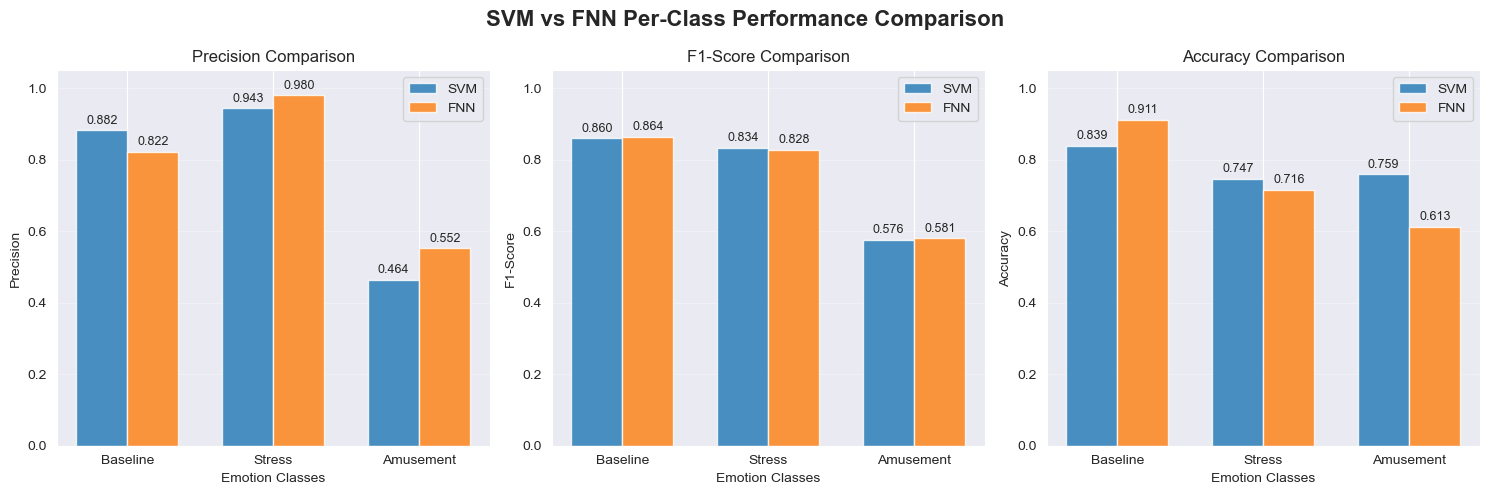

In [153]:
plot_svm_fnn_comparison(per_class_metrics, per_class_metrics_fnn)

On the above graph, both SVM and FNN models perform strongly on the baseline and stress classes across all metrics. For both models, the precision and F1-scores are high, indicating they both consistently identify baseline states with minimal false positives.

Also, the accuracy scores indicate that the baseline samples are the easiest to classify according to the stress class, likely because resting physiological signals such as low heart rate, more stable EDA, and steady respiration that are distinct and consistent across subjects. Potentially, as the baseline class has more samples it is more dominant, it is less challenging for the models to predict.

From above bar charts, both SVM and FNN models demonstrate strong performance on the baseline and stress classes across all metrics, while both struggle more with amusement detection.

Both models perform consistently well on the baseline class, with high precision, F1-score, and accuracy (above 0.8 for all metrics), which is similar to those reported by the original author of the *WESAD* dataset [1]. The FNN slightly outperforms the SVM in accuracy (0.911 vs 0.839), showing its ability to generalise better across subjects. This strong performance can be attributed to the clear and stable physiological patterns observed during resting states, such as low heart rate variability and steady respiration. Since baseline data is also the most represented in the dataset, it is easier for both models to learn and predict correctly.

The stress class shows very high precision, especially for the FNN (0.98) and SVM (0.943), meaning both models almost never confuse other emotional states as stress. This aligns with the fact that stress responses produce strong, distinct physiological changes (like elevated heart rate and EDA peaks). However, accuracy for stress is relatively lower (around 0.7), suggesting that while the models are confident when they detect stress, they may still miss some true stress instances possibly due to inter-subject variability or overlapping mild stress responses.

Both models struggle the most with amusement, showing reduced precision and F1-scores. SVM, in particular, has very low precision (0.464) but higher accuracy (0.759). This pattern suggests that while SVM correctly labels amusement samples overall, many of its  predictions are false positives. FNN performs slightly better in precision (0.552), indicating it can identify amusement more cleanly, though it still less reliably than other classes. This difficulty likely arises because amusement signals (like mild increases in heart rate or irregular EDA patterns) are subtler and more inconsistent across individuals.

Overall, FNN performs slightly better across most metrics, particularly for the stress class, due to its capacity to model non-linear physiological relationships. The SVM, however, maintains competitive accuracy and performs reliably for simpler, more separable states such as the baseline.

## 6.2 Examining over-fitting

Both models achieved relatively low and similar F1-scores for the amusement class, indicating difficulty in maintaining a balance between precision and recall. This suggests that the models not only misclassified amusement samples frequently (low precision) but also failed to correctly identify many of them (low recall). The overlap of physiological patterns and limited data for amusement contribute to this balanced yet low performance.
The amusement class consistently showed lower precision across both SVM (0.464) and FNN (0.552) models, indicating that many samples predicted as amusement actually belonged to other states and there could be  some of the  reasons such as  the body’s physiological signals (heart rate, EDA, respiration) during amusement can be similar to baseline or stress, because both involve increased stimulation.

Also, as amusement is a minority class in the dataset, the model cannot identify unique patterns hidden within this class. Possibly, issues happens from the reduced diversity in the number of subjects and practically how individuals express amusement differently. For example, some people may laugh loudly, others stay calm and this especially causes high variance and low consistency for a small number of participants.

## 6.3 Model selection

For evaluating the choice of models, various macro metrics, alongisde the ROC and PRC were obtained capturing the multi-class classification performance.
Also, the macro-average metrics are plotted for comparison between both models.

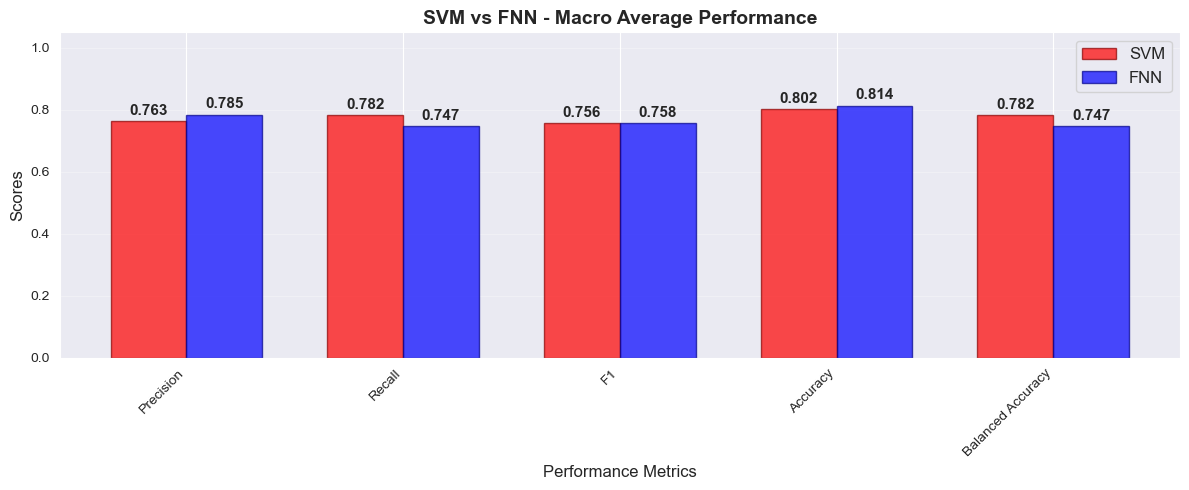

In [154]:
svm_vals, fnn_vals = plot_macro_average_comparison(final_metrics, final_test_metrics)

The macro-average evaluation provides an overall assessment of model performance across all emotion classes by assigning equal weight to each class, irrespective of class size. Both models exhibit comparable performance, with macro-average scores ranging between 0.74 and 0.81, reflecting good generalisation capability across classes.

In terms of precision and recall, the SVM and FNN models show similar results, indicating that both are equally effective at correctly identifying emotional states and minimizing false negatives. The F1-scores are also nearly identical (approximately 0.75), confirming a balanced trade-off between precision and recall for both models.

Regarding accuracy, the FNN slightly outperforms the SVM (0.814 vs. 0.802), suggesting marginally better overall classification consistency. However, the balanced accuracy is higher for the SVM (0.782 vs. 0.747), implying that it handles class imbalance more effectively.

In summary, both models demonstrate strong and reliable performance. The SVM shows greater robustness across uneven class distributions, while the FNN achieves marginally higher overall accuracy, likely benefiting from its capacity to capture more complex, nonlinear feature relationships to differentiate class boundaries.


### 6.3.1 Multi-class ROC-AUC Analysis for SVM and FNN Models

The macro-averaged AUC provides an overall model comparison, helping determine which classifier better handles the multi-class emotion recognition task across all affective states. Additionally, the Macro-Averaged AUC was used as it accounts for class imbalance. This AUC provides an indicator of the model's ability to discriminate between emotiational states, but relies on a probabilistic model.


For determing the ROC curve, the probability estimates from the SVM model are required. Therefore, a new SVM model using the existing parameters are trained with probability estimates enabled.

In [157]:
best_params = {'C': 1, 'gamma': 'auto'}

svm_prob_model = SVC(C=best_params['C'], gamma=best_params['gamma'],
                    kernel='rbf', probability=True, random_state=39,
                    class_weight='balanced')

svm_prob_model.fit(X_train_scaled, y_train)
y_pred_svm_prob = svm_prob_model.predict_proba(X_test_scaled)

The comparison of the ROC curves are shown below for both model across the different class states:

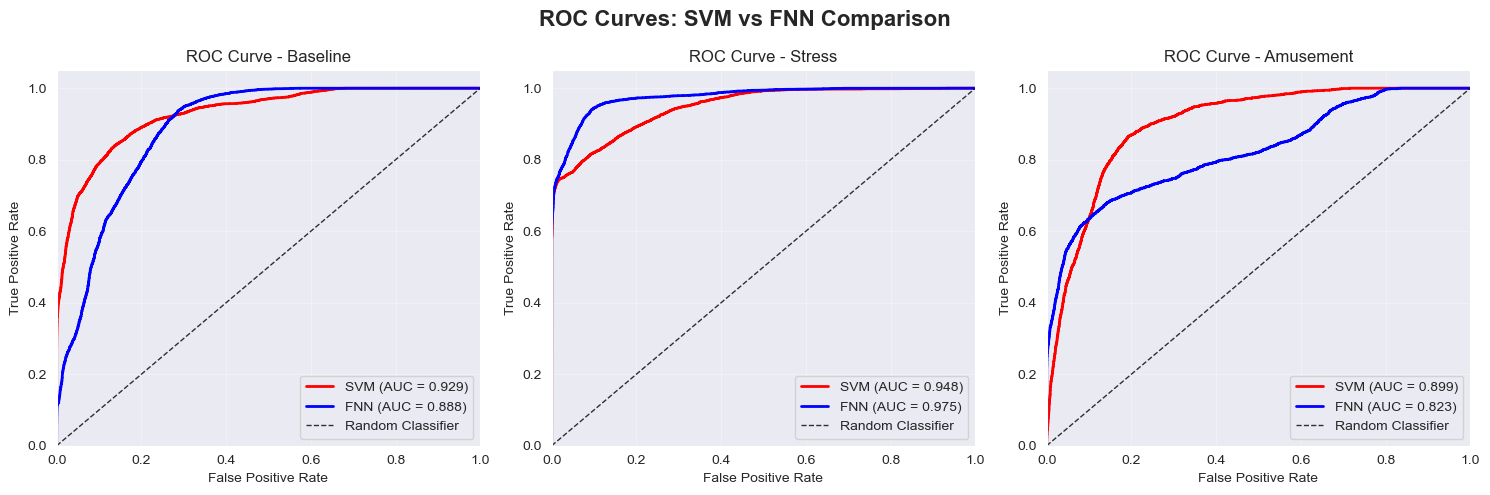

In [175]:
svm_auc, fnn_auc = plot_multiclass_roc_comparison(
    y_test-1, y_pred_svm_prob, y_pred_prob,  # y_test-1 for 0-based indexing
    class_names=['Baseline', 'Stress', 'Amusement']
)

On the above graphs ROC analysis has been shown for each clasess between the two models. While both achieved strong separability across emotional states, the SVM consistently produced balanced and reliable performance, especially for baseline and amusement. Its stability suggests it generalises better across subjects and physiological variability.

The FNN, on the other hand, showed higher sensitivity for the Stress class, indicating that its nonlinear architecture can capture complex signal changes linked to stress responses such as rapid heart rate or high EDA fluctuations. The FNN performs very well on the majority classes (baseline and stress) but struggles with the minority class (amusement). This happens because it pays more attention to the stronger, more frequent patterns in the data, which makes it less sensitive to the smaller, more subtle ones.

Overall, the SVM can be considered the better performing  model for robust and consistent emotion classification across all affective states, while the FNN demonstrates potential advantages when focusing specifically on stress detection.

In [172]:
auc_summary = create_auc_summary_table(svm_auc, fnn_auc, ['Baseline', 'Stress', 'Amusement'])

ROC-AUC Performance Comparison
  Emotional_State  SVM_AUC  FNN_AUC
0        Baseline   0.9292   0.8882
1          Stress   0.9477   0.9747
2       Amusement   0.8986   0.8233
3   Macro Average   0.9252   0.8954




Macro-Averaged AUC provides the best single metric to choose between SVM and FNN for multi-class classification, ensuring that performance on minority classes (stress and amusement) is equally weighted in the final decision. The macro-averaged ROC curve for both models is shown below:

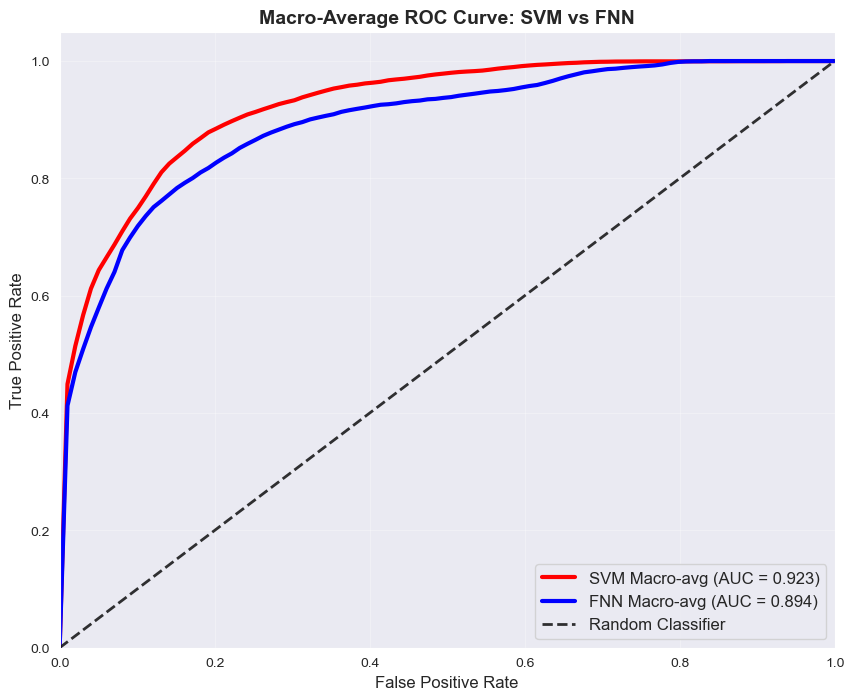

In [173]:
macro_auc_results = plot_macro_average_roc_comparison(
    y_test-1, y_pred_svm_prob, y_pred_prob,
    class_names=['Baseline', 'Stress', 'Amusement']
)

As explained previously for the per class  AUC results, the SVM can be considered the best overall model for robust and consistent emotion classification across all affective states.



### 6.3.2 Precision-Recall Curve Analysis for SVM and FNN Models

In the WESAD dataset, the proporition of baseline samples is significantly higher compared to amusement or stress states. Due to the severe class imbalance, amongst a relatively small dataset (15 participants), the normal ROC curves can make a model look better than it really is, since they count the large number of correct baseline predictions. Precision–Recall (PR) curves avoid this problem by focusing only on the class we want to detect. For example, stress or amusement. PR curves measure how many of those positive cases the model finds (recall) and how accurate those predictions are (precision). This gives a more critical assessment of the models capability to predict more important classes, than just the baseline with higher sample count.

The PR curves below compares the average precision (AP) values of SVM and FNN models across three emotional states:

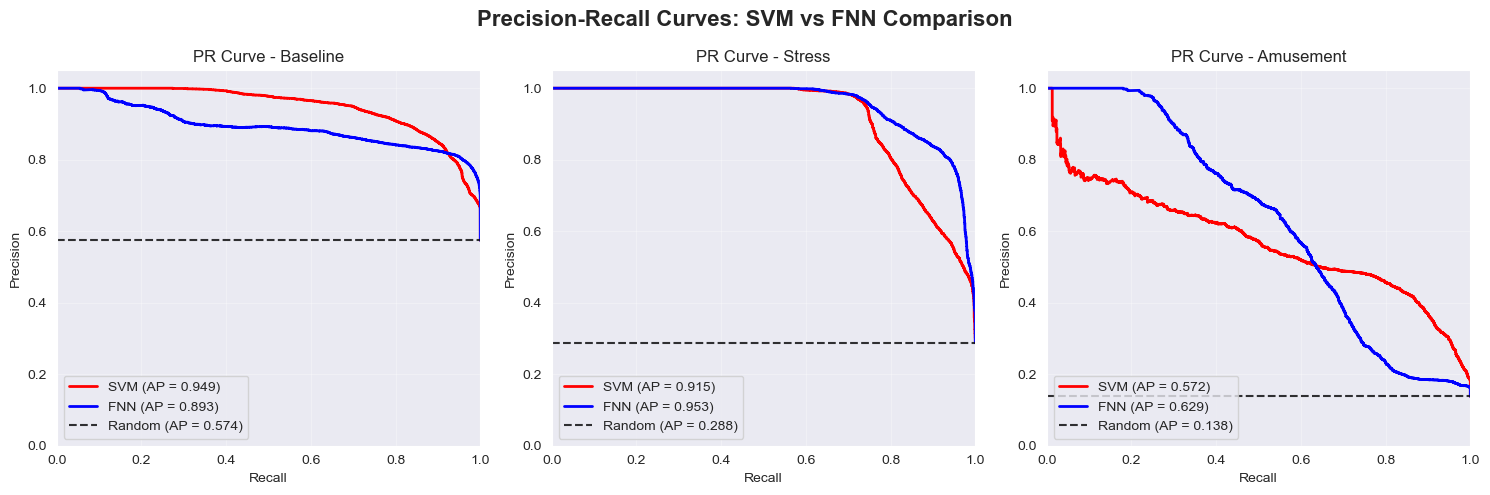

In [169]:
# Plot Precision-Recall comparison
svm_ap, fnn_ap = plot_precision_recall_curves(
    y_test-1, y_pred_svm_prob, y_pred_prob,
    class_names=['Baseline', 'Stress', 'Amusement']
)

On the baseline PR curve both models perform very well, with SVM (AP = 0.949) slightly higher than FNN (AP = 0.893). This means both models can accurately recognise the baseline state with high confidence and very few false positives. So the baseline detection is strong and reliable for both models.

For the stress PR curve, The FNN (AP = 0.953) outperforms the SVM (AP = 0.915). This shows that the FNN model can better capture complex patterns in the dataset. Therefore, the FNN is better at identifying stress states.

However, the amusement PR Curve shows that boths models performance drops with FNN (AP = 0.629) slightly better than SVM (AP = 0.572). The lower values suggest that amusement signals overlap more with other emotional states, making them harder to classify correctly. Once again, the amusement detection is the most challenging task for both models.

## 7. Final recommendation of best model

## 7.1 Discussion of Results

The previous results indicate that while both models are effective overall, FNN offers better adaptability for detecting complex emotional states. So FNN was chosen as the recommended final model because it demonstrated the best performance for stress detection, which is the most critical aspect for real world applications. The precision–recall curves showed that the FNN achieved a very high precision (0.98) and a larger area under the curve for the stress class, meaning it can detect stress accurately while avoiding false alarms.

Since physiological stress patterns  such as increased heart rate, elevated skin conductance, and irregular breathing  are often non-linear and vary between individuals, the FNN’s ability to learn complex relationships makes it better suited for this type of data. In contrast, SVM relies on simpler separation boundaries and struggles to capture these variations.

In real life use cases like wearable stress monitoring, mental health tracking, or workplace well being systems, accurately identifying stress is more valuable than distinguishing amusement or baseline states. Therefore, the FNN’s strong stress recognition capability, combined with balanced performance across other classes, makes it the most appropriate model for this dataset.


In [165]:
def create_ap_summary_table(svm_ap, fnn_ap, class_names):
    """Create comprehensive Average Precision comparison."""

    ap_df = pd.DataFrame({
        'Emotional_State': class_names,
        'SVM_AP': svm_ap,
        'FNN_AP': fnn_ap,
    })

    # Add macro averages
    macro_row = pd.DataFrame({
        'Emotional_State': ['Macro Average'],
        'SVM_AP': [np.mean(svm_ap)],
        'FNN_AP': [np.mean(fnn_ap)],
    })

    ap_comparison = pd.concat([ap_df, macro_row], ignore_index=True)

    print("Average Precision (AP) Performance Comparison")
    print("=" * 55)
    print(ap_comparison.round(4))

    return ap_comparison

# Create AP summary
ap_summary = create_ap_summary_table(svm_ap, fnn_ap, ['Baseline', 'Stress', 'Amusement'])

Average Precision (AP) Performance Comparison
  Emotional_State  SVM_AP  FNN_AP
0        Baseline  0.9487  0.8929
1          Stress  0.9150  0.9530
2       Amusement  0.5716  0.6292
3   Macro Average  0.8118  0.8250



### 7.2 Discussion of Results - Context of the problem

Despite the difficulties in predicting the amusement state, the practicality for these classifier models is the detection of stress, which is known to have long term impact on the health of individuals, such as increasing high blood pressure or affecting existing heart conditons. These models have potential capability to be adapted for personalised models tailored for each person. Therefore, the previous issues related to generalisation may not necessarily be a significant problem if used for this purpose. This could have more a prominent use case for detecting unusual behavior from the typical baseline state.

Nevertheless, predicting amusement state could be still useful under some applications, such as capturing the person's genuine response to a situation, for example watching a film, tasting food, engagement with an advertisement. So improving the diversity and richness in the data captured for this dataset should be improved. As mentioned previously, the response to funny videos will vary widely between people.

Finally, using the FNN model allows online-learning, therefore as data is captured from wider set of individuals orthe same person, the model can be further trained and improve its performance but also incorporate other datasets that may link to the cause of the mood to provide further insight into the physiological response.



## 8. Conclusions

## 8.1 What has been successfully accomplished and what has not been successful?

From the WESAD dataset physiological data from chest-worn sensors (ECG, EDA, EMG, RESP, TEMP, ACC) were successfully filtered, resampled and segmented into feature windows that were synchronised together to ensure signal alignment for analysis across two ML models.

In the feature extraction, statistics from the frequency-domain were extracted to capture relevant physiological responses that potentially may correlate with the emotional state of each subject. Preprocessing was completed seperatele for the 15 subjects in the *WESAD* study, an merged together for analysis.

In the case study, two ML Models were chosen. Support Vector Machine (SVM) and Feedforward Neural Network (FNN) models were developed and evaluated using Leave-One-Subject-Out (LOSO) cross-validation, ensuring robust subject independent testing and to minimise the risk of overfitting. Further hyperparameter tuning was performed across the ML models before the the performance of each clasifier was determined.

Both models achieved strong classification results (AUC > 0.88). Rather than focusing to the accuracy alone, the F1 macro score and balanced accuracy across both models was of greater interest. Both the SVM and FNN model obtained a F1 score of 0.75 and a balanced accuracy for SVM model is 0.78 and 0.75 for FNN model. All together, these metrics demonstrated that physiological signals can provide a moderately successful abiltiy to distinguish between baseline, stress, and amusement states recorded for the subjects in the dataset. However, there is further room for improvement in the classifier performance, especially for  robust prediction of the amusement statge.

 For further deep understanding, per class metrics calculated for both models and it showed how each model performs emotional states. Especially ROC curves and PR curves showed that the AUC for SVM is 0.92, showed that SVM is detect emotional states better than FNN model.

Nevertheless, both models struglled to identify the amusement class due to data imbalance and overlapping physiological patterns with stress leading to lower F1-scores and AUC values. Additionally, the limited number of subjects (15) in this study, and differences in window lengths between modalities  ( 5 s for ACC vs. 60 s for ECG/EDA)  could also have introduced minor misalignment during feature fusion and reducing the models ability to generalise.

## 8.2 Reflection on the Analysis Case Study

As my dataset was heavily imbalanced, during the training with LOSO CV, two balancing strategies were used: SMOTE and class weighting. After seeing the LOSO CV results I decided to train my final model with class weighting for both models. Given further time, exploring the reasons why SMOTE balancing was unsuccessful would be of interest.

Generally, an area that I wish to develop further is the segmentation of time-series data into windows. Having further time, it would be important to further understand the effect of choices on absolute and relative window overlapping/offsetting combinations (e.g. 10-50%) on the classifier predictions, and also tuning the window size per sensor.

Also, the hyperparameter tuning was not extensive due to the time to perform the LOSO CV across the large dataset. For example, for one parameter, during one fold of LOSO, this was unable to succesfully complete even after 3-4 hours.  Having more time available, I would have performed a more comprehensive hyperparameter tunings using a nested cross validation.  Other combinations that could be explored, include different kernel functions (polynomial, sigmoid) and perform feature reduction techniques to select prominent features that the models learning will be most sensitive to.

Another area that could be further developed is the structure and features of the FNN, which is relatively simple compared to more sophisticated deep neural network techniques now available. These potentially include convolution and recurrent neural networks using LSTM neurons or transormer models that are reportedly well suited for forecasting and classifying time-series data

### 8.3 Future Work

The classifier task was limited to three classes (baseline, amusement, stress) and it would be better to incoporate other 'meditation' state, to further chaaracterise the ML models for predicting these emotional states with a limited number of samples.  Furthermore, we can combine those sensors together and look at the results chest and wrist sensors. Additionally, comparing the inclusion or sensor data from the wrist band sensor with chest sensors, would be useful to investigate if classifiers can use lower cost, more accessible wearable technology available.

Another aspect not yet considered is developing individual personalised models for each subject participant. These could predict the affective state of a specific person. Therefore, the issues related to generalisation may not necessarily be a significant problem if used for this purpose.

On my dataset I used 12 people for training and random 3 people seperately for testing (20%). The split was performed manually and the test subjects  were chosen at random. However it is not known how sensitive the model's prediction performance will be to small number of participants on this study.

In the  dataset there was only 15 people, which is arguably not enough for training either testing to give you more representative results, especially for generalisation when using the FNN model. It would be better if the dataset included more participants, therefore future work should expand the quantity of data by measurement amongst more participants.

Another significant problem is the lack of diversity and information about the public dataset due to anonymisation. For example, it is not known which participants are female or male, nor their age, so cannot be sure if these physiological signals generalsie across a wider popoulation.

Altogether the limited diversity and number of participant available within the dataset makes this a challenging case study to develop a robust ML model. However, the techniques demonstrate its potential for use to detect the emotional state of a person by wearable technology.

## References


[1]	P. Schmidt, A. Reiss, R. Duerichen, C. Marberger, and K. Van Laerhoven, ‘Introducing WESAD, a Multimodal Dataset for Wearable Stress and Affect Detection’, in Proceedings of the 20th ACM International Conference on Multimodal Interaction, Boulder CO USA: ACM, Oct. 2018, pp. 400–408. doi: 10.1145/3242969.3242985.

[2]	F. Azuaje, G. Clifford, and P. McSharry, Advanced Methods and Tools for ECG Data Analysis. Artech.

[3]	‘EMG Signal Processing: Key Techniques and Practical Recommendations’, EMG Signal Processing: Key Techniques and Practical Recommendations. Accessed: Oct. 30, 2025. [Online]. Available: http://noraxon.com/article/emg-signal-processing-key-techniques-and-practical-recommendations

[4]	E. Antolinos and J. Grajal, ‘Comprehensive Comparison of Continuous-Wave and Linear-Frequency-Modulated Continuous-Wave Radars for Short-Range Vital Sign Monitoring’, IEEE Trans. Biomed. Circuits Syst., vol. 17, no. 2, pp. 229–245, Apr. 2023, doi: 10.1109/TBCAS.2023.3257647.

[5] Ming-Zher Poh, T. Loddenkemper, N. C. Swenson, S. Goyal, J. R. Madsen, and R. W. Picard, ‘Continuous monitoring of electrodermal activity during epileptic seizures using a wearable sensor’, in 2010 Annual International Conference of the IEEE Engineering in Medicine and Biology, Buenos Aires: IEEE, Aug. 2010, pp. 4415–4418. doi: 10.1109/IEMBS.2010.5625988.

[6] M. Gjoreski, H. Gjoreski, M. Luštrek, and M. Gams, ‘Continuous stress detection using a wrist device: in laboratory and real life’, in Proceedings of the 2016 ACM International Joint Conference on Pervasive and Ubiquitous Computing: Adjunct, Heidelberg Germany: ACM, Sep. 2016, pp. 1185–1193. doi: 10.1145/2968219.2968306.

[7]	S. Koelstra et al., ‘DEAP: A Database for Emotion Analysis;Using Physiological Signals’, IEEE Trans. Affective Comput., vol. 3, no. 1, pp. 18–31, Jan. 2012, doi: 10.1109/T-AFFC.2011.15.

[8]	R. W. Picard, E. Vyzas, and J. Healey, ‘Toward machine emotional intelligence: analysis of affective physiological state’, IEEE Trans. Pattern Anal. Machine Intell., vol. 23, no. 10, pp. 1175–1191, Oct. 2001, doi: 10.1109/34.954607.

[9] B. A. Darwish, S. U. Rehman, I. Sadek, N. M. Salem, G. Kareem, and L. N. Mahmoud, ‘From lab to real-life: A three-stage validation of wearable technology for stress monitoring’, MethodsX, vol. 14, p. 103205, Jun. 2025, doi: 10.1016/j.mex.2025.103205.

[10] L. Bao and S. S. Intille, ‘Activity Recognition from User-Annotated Acceleration Data’, in Pervasive Computing, vol. 3001, A. Ferscha and F. Mattern, Eds., in Lecture Notes in Computer Science, vol. 3001. , Berlin, Heidelberg: Springer Berlin Heidelberg, 2004, pp. 1–17. doi: 10.1007/978-3-540-24646-6_1

[11] F. Shaffer and J. P. Ginsberg, ‘An Overview of Heart Rate Variability Metrics and Norms’, Front. Public Health, vol. 5, p. 258, Sep. 2017, doi: 10.3389/fpubh.2017.00258.

[12] U. Rajendra Acharya, K. Paul Joseph, N. Kannathal, C. M. Lim, and J. S. Suri, ‘Heart rate variability: a review’, Med Bio Eng Comput, vol. 44, no. 12, pp. 1031–1051, Dec. 2006, doi: 10.1007/s11517-006-0119-0.

[13] K. Najarian and R. Splinter, Biomedical Signal and Image Processing, 2nd ed. Boca Raton: CRC Press, 2016. doi: 10.1201/b11978.






